In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d emmarex/plantdisease


 99% 649M/658M [00:04<00:00, 72.9MB/s]
100% 658M/658M [00:04<00:00, 140MB/s] 


In [ ]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/plantdisease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/base-paper-weight-model-plant-village

100% 2.92G/2.92G [01:19<00:00, 57.8MB/s]
100% 2.92G/2.92G [01:19<00:00, 39.7MB/s]


In [ ]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/base-paper-weight-model-plant-village.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Performance Of the Model

In [ ]:
 predicted_Output = ['Pepper__bell___Bacterial_spot',
'Pepper__bell___healthy',
'Potato___Early_blight',
'Potato___Late_blight',
'Potato___healthy',
'Tomato_Bacterial_spot',
'Tomato_Early_blight',
'Tomato_Late_blight',
'Tomato_Leaf_Mold',
'Tomato_Septoria_leaf_spot',
'Tomato_Spider_mites_Two_spotted_spider_mite',
'Tomato__Target_Spot',
'Tomato__Tomato_YellowLeaf__Curl_Virus',
'Tomato__Tomato_mosaic_virus',
'Tomato_healthy'
]

In [ ]:
def curve():
   plt.figure(figsize=(14, 7))
   plt.subplot(1, 2, 1)
   plt.plot(history.history['loss'], label='Training Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   plt.legend(loc='upper right')
   plt.title('Training & Validation Loss')


   plt.subplot(1, 2, 2)
   plt.plot(history.history['accuracy'], label='Training Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   plt.legend(loc='lower right')
   plt.title('Training & Validation Accuracy')

   plt.show()
def accuracy_curve():
  h = history
#plot the accuracy value

  plt.plot(h.history['accuracy'],label='train accuracy')
  plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
  plt.legend()
  plt.show()

def loss_curve():
  #plot the loss value
    h = history
    plt.plot(h.history['loss'],label = 'train loss')
    plt.plot(h.history['val_loss'],label = 'validation loss')
    plt.legend()
    plt.show()

def performance_measure():

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
def confusion_matrices():
    # Assuming you have already trained your classification model and obtained predictions.
  # Replace 'model' and 'test_data' with your actual model and test data.

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred_labels)

  # Display the confusion matrix as a heatmap
  plt.figure(figsize=(14, 10))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', square=True, xticklabels=predicted_Output, yticklabels=predicted_Output)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()
def classification_report_custom():
  # Assuming 'true_labels' is an array of true class labels, and 'predicted_labels' is an array of predicted class labels
  y_pred = model.predict(x_test)

    # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Generate the classification report
  report = classification_report(y_test, y_pred_labels,target_names = predicted_Output)

  # Print the classification report
  print(report)

def output_checking():
  curve()
  # accuracy_curve()
  # loss_curve()
  performance_measure()
  confusion_matrices()
  classification_report_custom()


def Roc_curve():
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.multiclass import OneVsRestClassifier
  from sklearn.model_selection import train_test_split
  from keras.utils import to_categorical

# Assuming y_test is your true labels and predictions is your predicted labels
  y_pred = model.predict(x_test)
  predictions = np.array(list(map(lambda x: np.round(x), y_pred)))
# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  n_classes = len(np.unique(y_test))
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions_bin[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves
  plt.figure(figsize=(10, 8))

  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label=f' {predicted_Output[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic for each class')
  plt.legend(loc="lower right")
  plt.show()


  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.model_selection import train_test_split
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_auc_score


# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute micro-average ROC curve and ROC area
  fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), predictions_bin.ravel())
  roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_micro, tpr_micro, label=f' (AUC = {roc_auc_micro:.2f})', color='Green')

# Plot the diagonal line (random classifier)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Micro-average Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

# Print micro-average AUC score
  print("AUC = ", roc_auc_score(y_test_bin.ravel(), predictions_bin.ravel()))




### Import Necessary Library

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report

### Data Fetch and encoding

In [ ]:
import cv2

def adjust_brightness_contrast(image, alpha=1.0, beta=0):

    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def enhance_contrast(image, min_intensity=0, max_intensity=255):

    return cv2.normalize(image, None, min_intensity, max_intensity, cv2.NORM_MINMAX)

def enhance_sharpness(image, alpha=2.5, beta=-1.5, kernel_size=(5, 5)):

    blurred = cv2.GaussianBlur(image, kernel_size, 0)
    return cv2.addWeighted(image, alpha, blurred, beta, 0)

def processed_image(image):
  adjusted_image = adjust_brightness_contrast(image, alpha=1.4, beta=30)
  stretched_image = enhance_contrast(adjusted_image)
  sharpness_image = enhance_sharpness(stretched_image)
  return sharpness_image

In [ ]:


dataset_path = '/content/PlantVillage'  # Replace with your actual dataset path

data = []
labels = []

# Loop through the directories corresponding to each class
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    # Loop through the image files in each class directory
    for image_filename in os.listdir(class_path):
        image_path = os.path.join(class_path, image_filename)
        image = cv2.imread(image_path)
        if image is not None:
          resized_image = cv2.resize(image,(150,150))
          # Read the image using OpenCV

          processed = processed_image(resized_image)
          # Append the image data to the 'data' list
          data.append(processed)

          # Append the class label to the 'labels' list
          labels.append(class_name)
        else:
          print(f"Skipping file: {image_path}")

# Convert 'data' and 'labels' lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)


Skipping file: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c


In [ ]:
len(data)

20638

In [ ]:
len(labels)

20638

Text(0.5, 1.0, 'Tomato_Bacterial_spot')

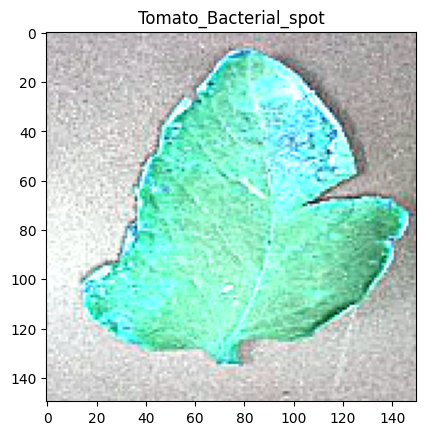

In [ ]:
plt.imshow(data[0])
plt.title(labels[0])

In [ ]:

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
x = (data)
y = (labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label",type(y))
x,y = shuffle(x,y,random_state = 101)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =1)


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label <class 'numpy.ndarray'>


In [ ]:
len(x_train)

16510

### Import DAta

In [ ]:
import pickle

# Save x_train, y_train, x_test, y_test using pickle
with open('x_train.pkl', 'wb') as f:
    pickle.dump(x_train, f)

with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('x_test.pkl', 'wb') as f:
    pickle.dump(x_test, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)


In [ ]:
import pickle

with open('x_train.pkl', 'rb') as f:
    x_train = pickle.load(f)

with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('x_test.pkl', 'rb') as f:
    x_test = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)


In [ ]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

### CNN

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',  padding='same', strides=(1, 1), input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(96, (3, 3), padding='same', strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(512, (3, 3), padding='same', strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3),  padding='same', strides=(1, 1),activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Flatten())

# Add a Dense layer with L2 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(15, activation='softmax'))

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/cnn/11-5-2023/cnn_model_with(high_preprocess)100epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=100,
    callbacks=[callbacks_instance]
)

Epoch 1/100
258/258 [==============================] - ETA: 0s - loss: 6.2184 - accuracy: 0.3361
Epoch 1: val_loss improved from inf to 3.59815, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/cnn/11-5-2023/cnn_model_with(high_preprocess)100epoch.h5
258/258 [==============================] - 39s 111ms/step - loss: 6.2184 - accuracy: 0.3361 - val_loss: 3.5981 - val_accuracy: 0.5494 - lr: 0.0010
Epoch 2/100
258/258 [==============================] - ETA: 0s - loss: 2.4929 - accuracy: 0.6617
Epoch 2: val_loss improved from 3.59815 to 1.59664, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/cnn/11-5-2023/cnn_model_with(high_preprocess)100epoch.h5
258/258 [==============================] - 24s 92ms/step - loss: 2.4929 - accuracy: 0.6617 - val_loss: 1.5966 - val_accuracy: 0.7786 - lr: 0.0010
Epoch 3/100
258/258 [==============================] - ETA: 0s - loss: 1.3949 - accuracy: 0.7681
Epoch 3: val_loss improved from 1.59664 to 1.08230, saving m

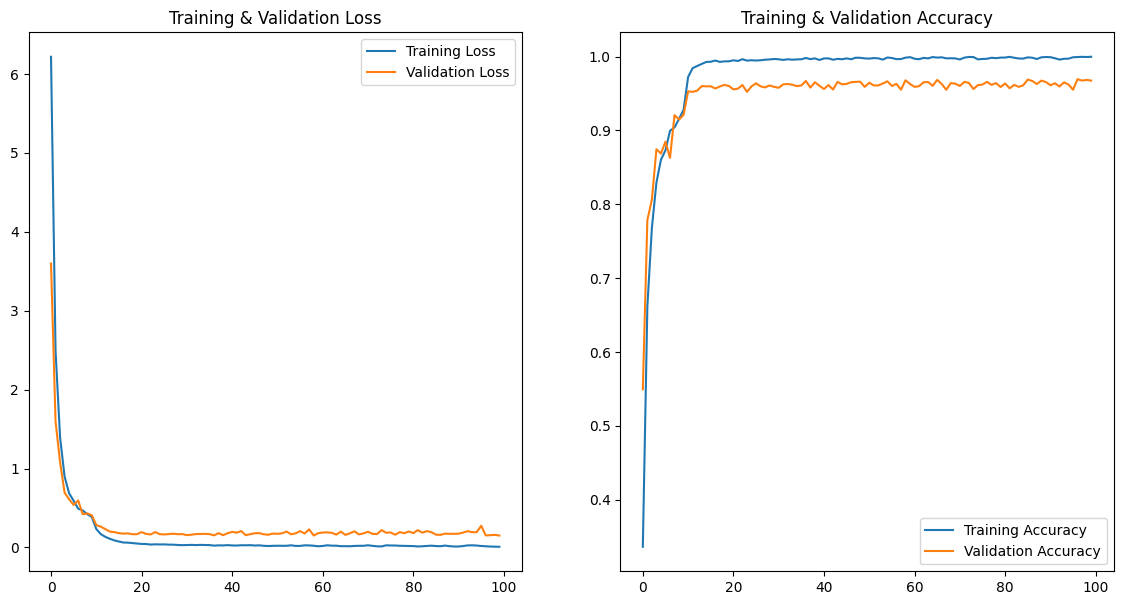

In [ ]:
curve()

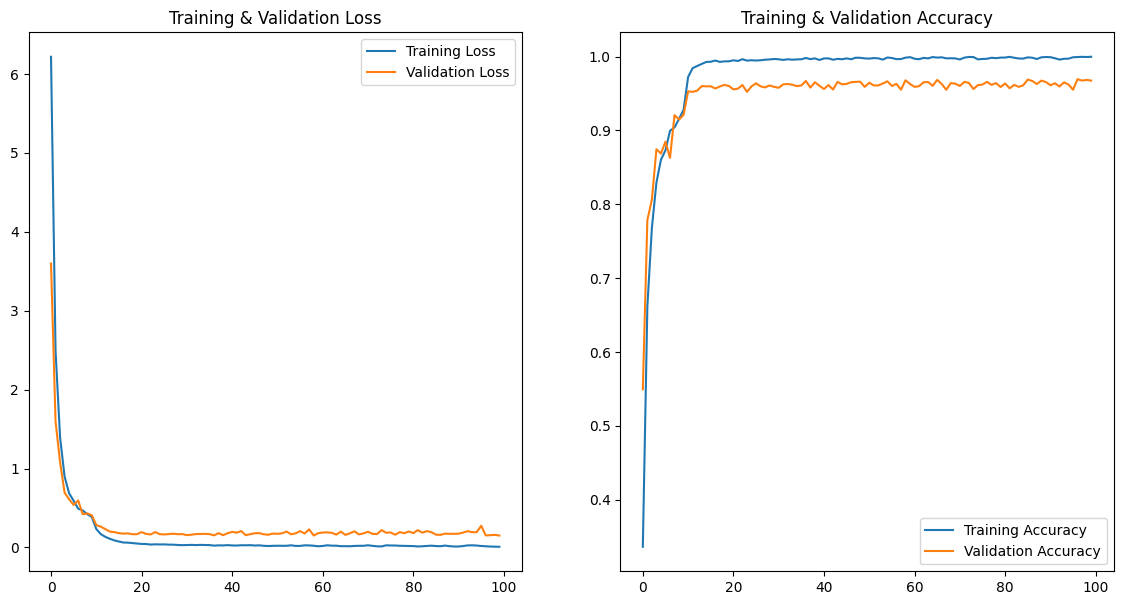

129/129 [==============================] - 2s 11ms/step
Accuracy: 0.9675387596899225
Precision: 0.9651267070569243
Recall: 0.9607892116961632
F1 Score: 0.9627502139964289
129/129 [==============================] - 1s 10ms/step


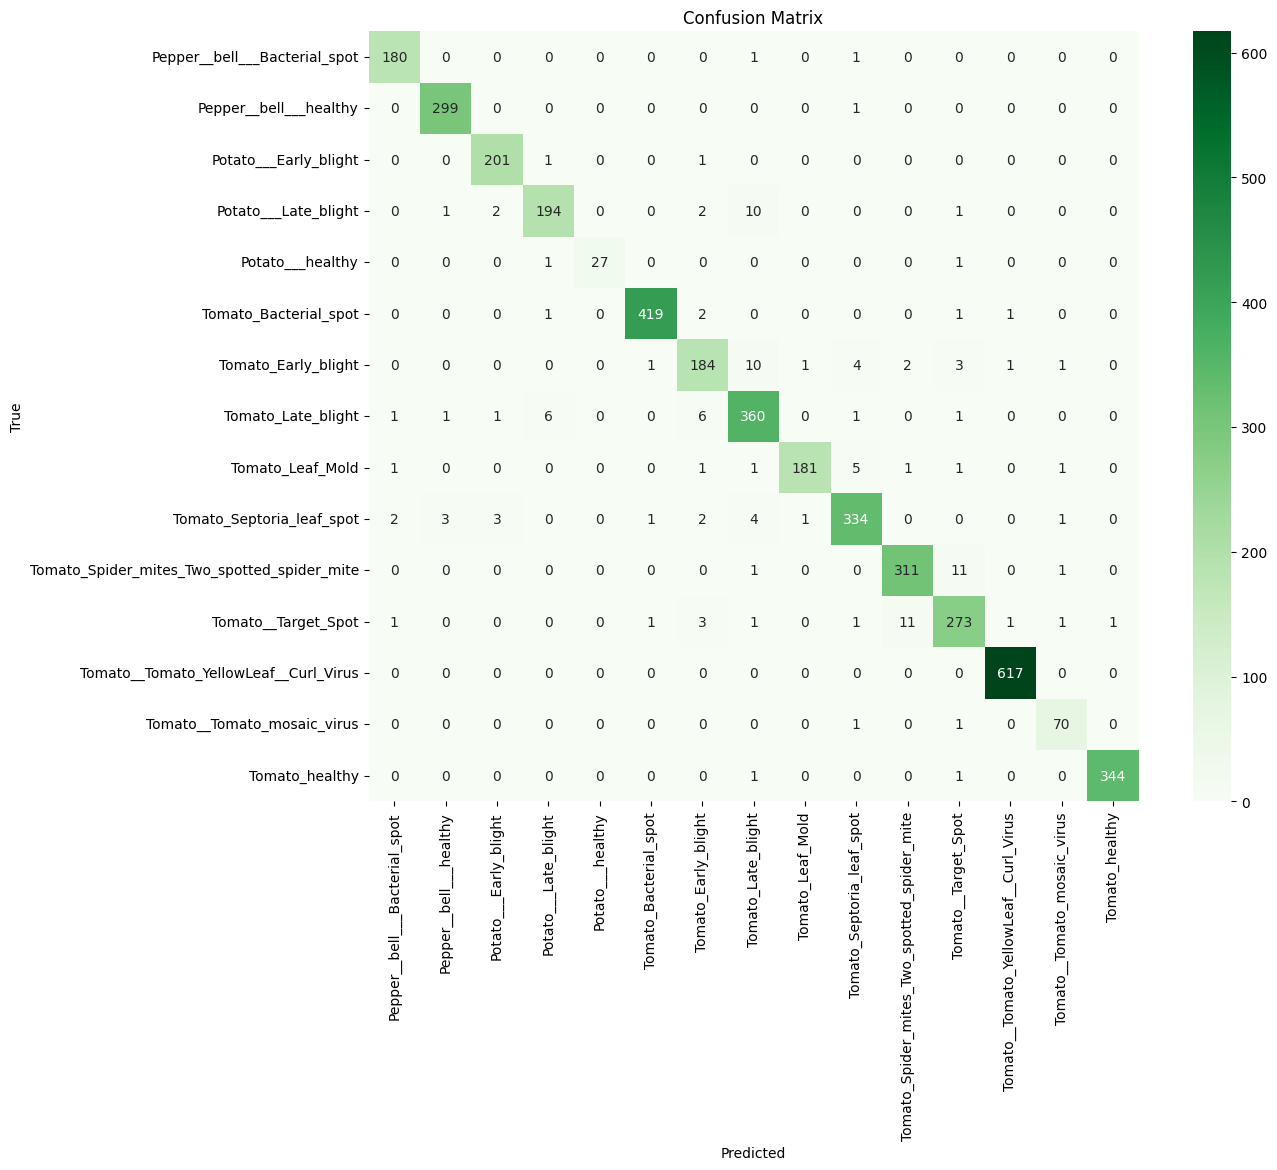

129/129 [==============================] - 1s 11ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.97      0.99      0.98       182
                     Pepper__bell___healthy       0.98      1.00      0.99       300
                      Potato___Early_blight       0.97      0.99      0.98       203
                       Potato___Late_blight       0.96      0.92      0.94       210
                           Potato___healthy       1.00      0.93      0.96        29
                      Tomato_Bacterial_spot       0.99      0.99      0.99       424
                        Tomato_Early_blight       0.92      0.89      0.90       207
                         Tomato_Late_blight       0.93      0.95      0.94       377
                           Tomato_Leaf_Mold       0.99      0.94      0.97       192
                  Tomato_Septoria_leaf_spot       0.96      0.95      0.96       351
Tomato_S

In [ ]:
output_checking()

129/129 [==============================] - 1s 11ms/step


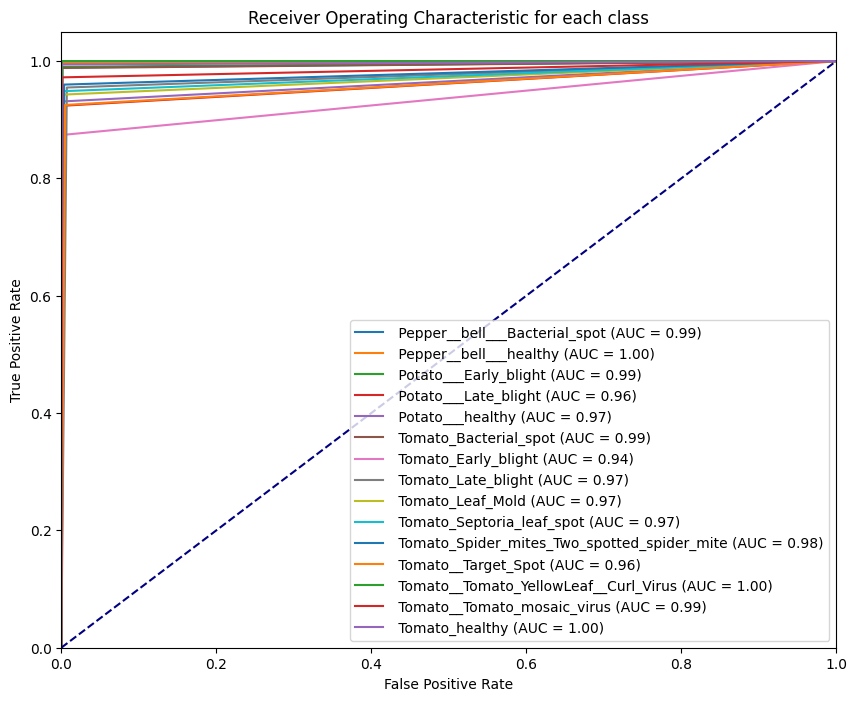

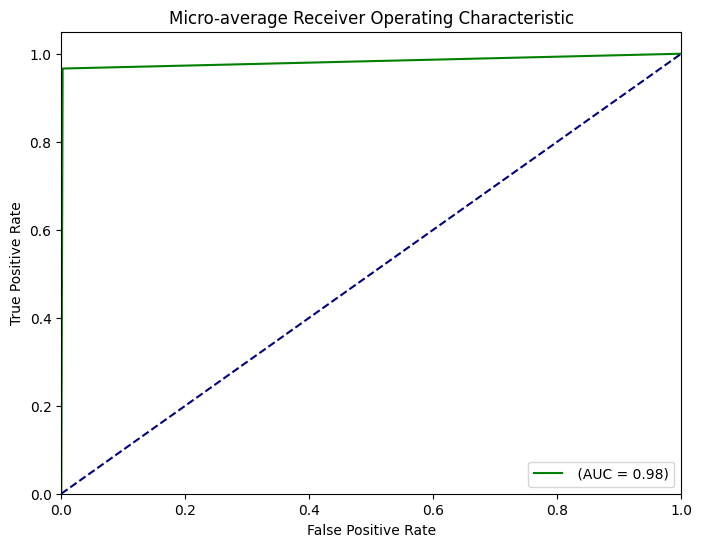

AUC =  0.9820476882613511


In [ ]:
Roc_curve()

In [ ]:
model.save('cnn_97acc_base_paper.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - 1s 11ms/step
Accuracy: 0.9675387596899225
Precision: 0.9651267070569243
Recall: 0.9607892116961632
F1 Score: 0.9627502139964289
129/129 [==============================] - 1s 10ms/step


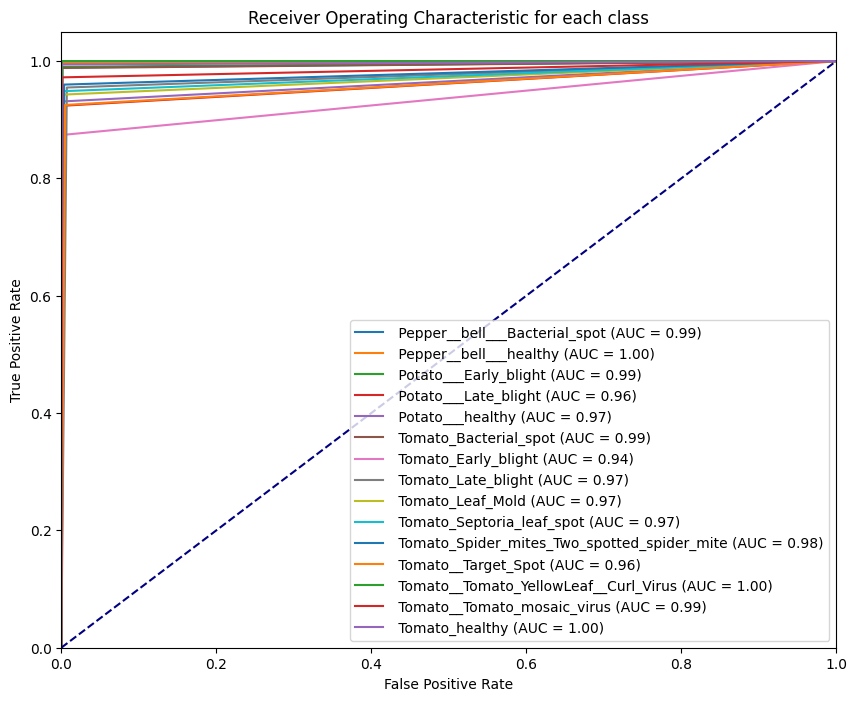

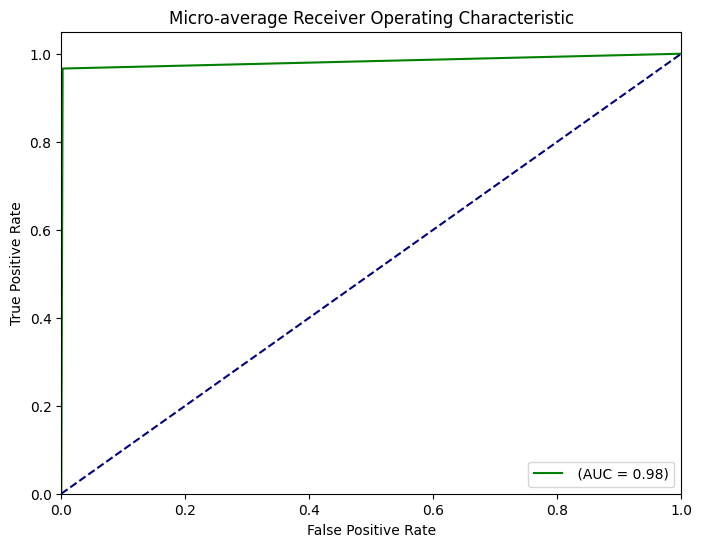

AUC =  0.9820476882613511


In [ ]:
model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/cnn/11-5-2023/cnn_model_with(high_preprocess)100epoch.h5')
performance_measure()
Roc_curve()

### inceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model with pre-trained weights (include_top=False to exclude the final classification layers)
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# # Freeze the pre-trained layers so they won't be updated during training
# for layer in inception_model.layers:
#     layer.trainable = False

# Add custom classification layers on top of the InceptionV3 model
flatten_layer = Flatten()(inception_model.output)
# dense_layer1 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten_layer)
dropout_layer = Dropout(0.2)(flatten_layer)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both InceptionV3 and the custom layers
model = Model(inputs=inception_model.input, outputs=output_layer)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_6[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/Inceptionv3/11-5-2023/inceptionv3_model_with(high_preprocess)100epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 0.7611 - accuracy: 0.7839
Epoch 1: val_loss improved from inf to 240947.31250, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Inceptionv3/11-5-2023/inceptionv3_model_with(high_preprocess)100epoch.h5
258/258 [==============================] - 115s 271ms/step - loss: 0.7611 - accuracy: 0.7839 - val_loss: 240947.3125 - val_accuracy: 0.1495 - lr: 0.0010
Epoch 2/50
258/258 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.9126
Epoch 2: val_loss improved from 240947.31250 to 0.45010, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Inceptionv3/11-5-2023/inceptionv3_model_with(high_preprocess)100epoch.h5
258/258 [==============================] - 56s 216ms/step - loss: 0.2818 - accuracy: 0.9126 - val_loss: 0.4501 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 3/50
258/258 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.9540
Epoch 3: val_l

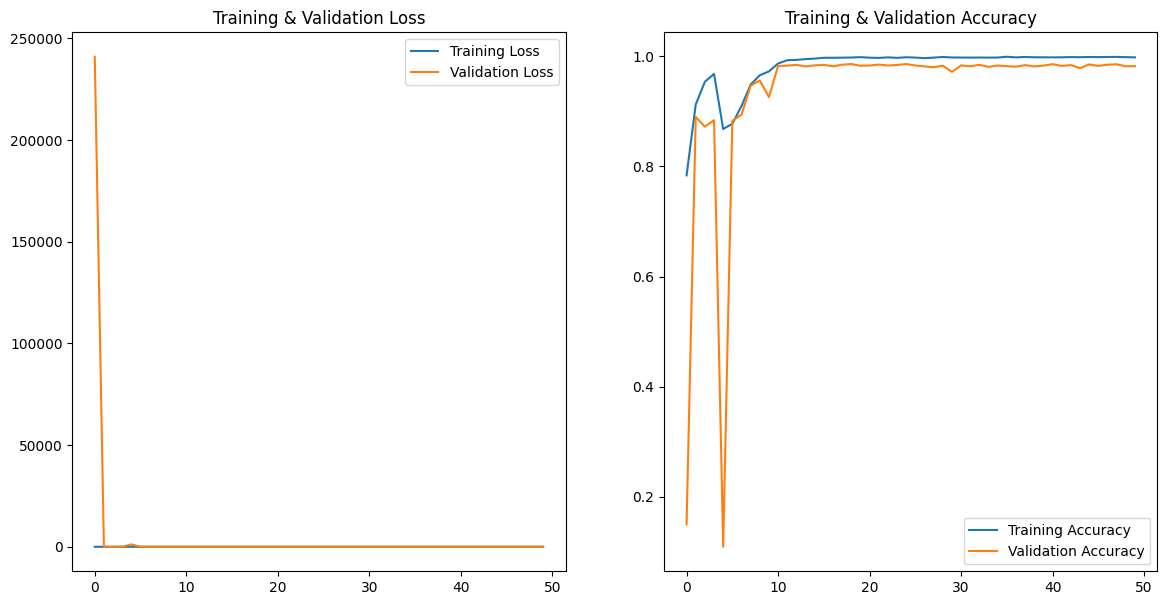

In [ ]:
curve()

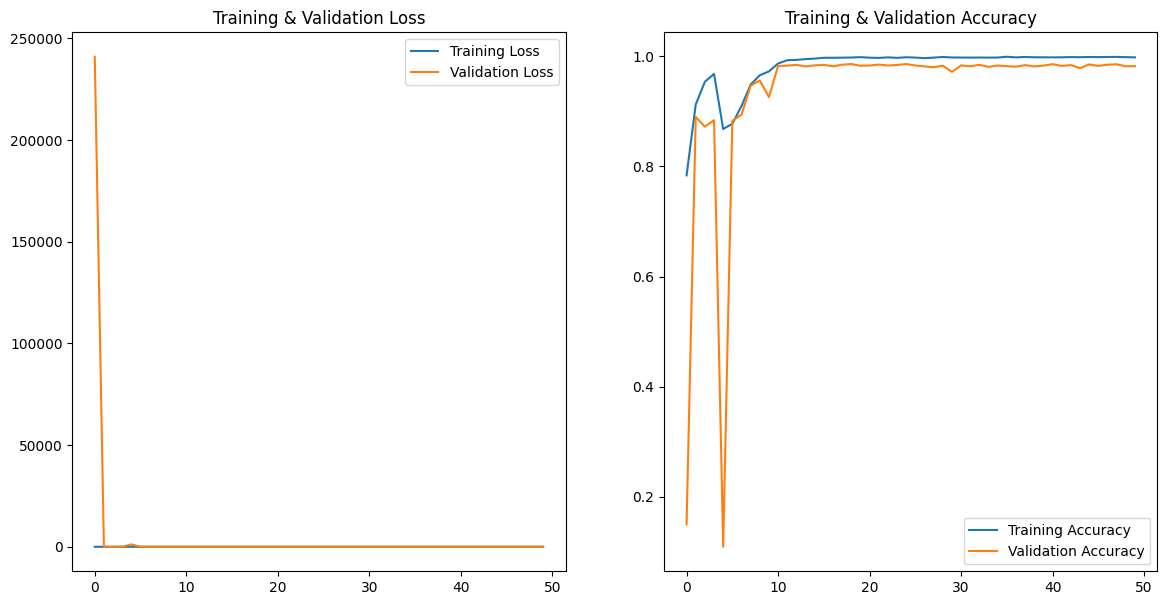

129/129 [==============================] - 5s 27ms/step
Accuracy: 0.9823158914728682
Precision: 0.9738066274140512
Recall: 0.9828677838499381
F1 Score: 0.9780657266140085
129/129 [==============================] - 3s 27ms/step


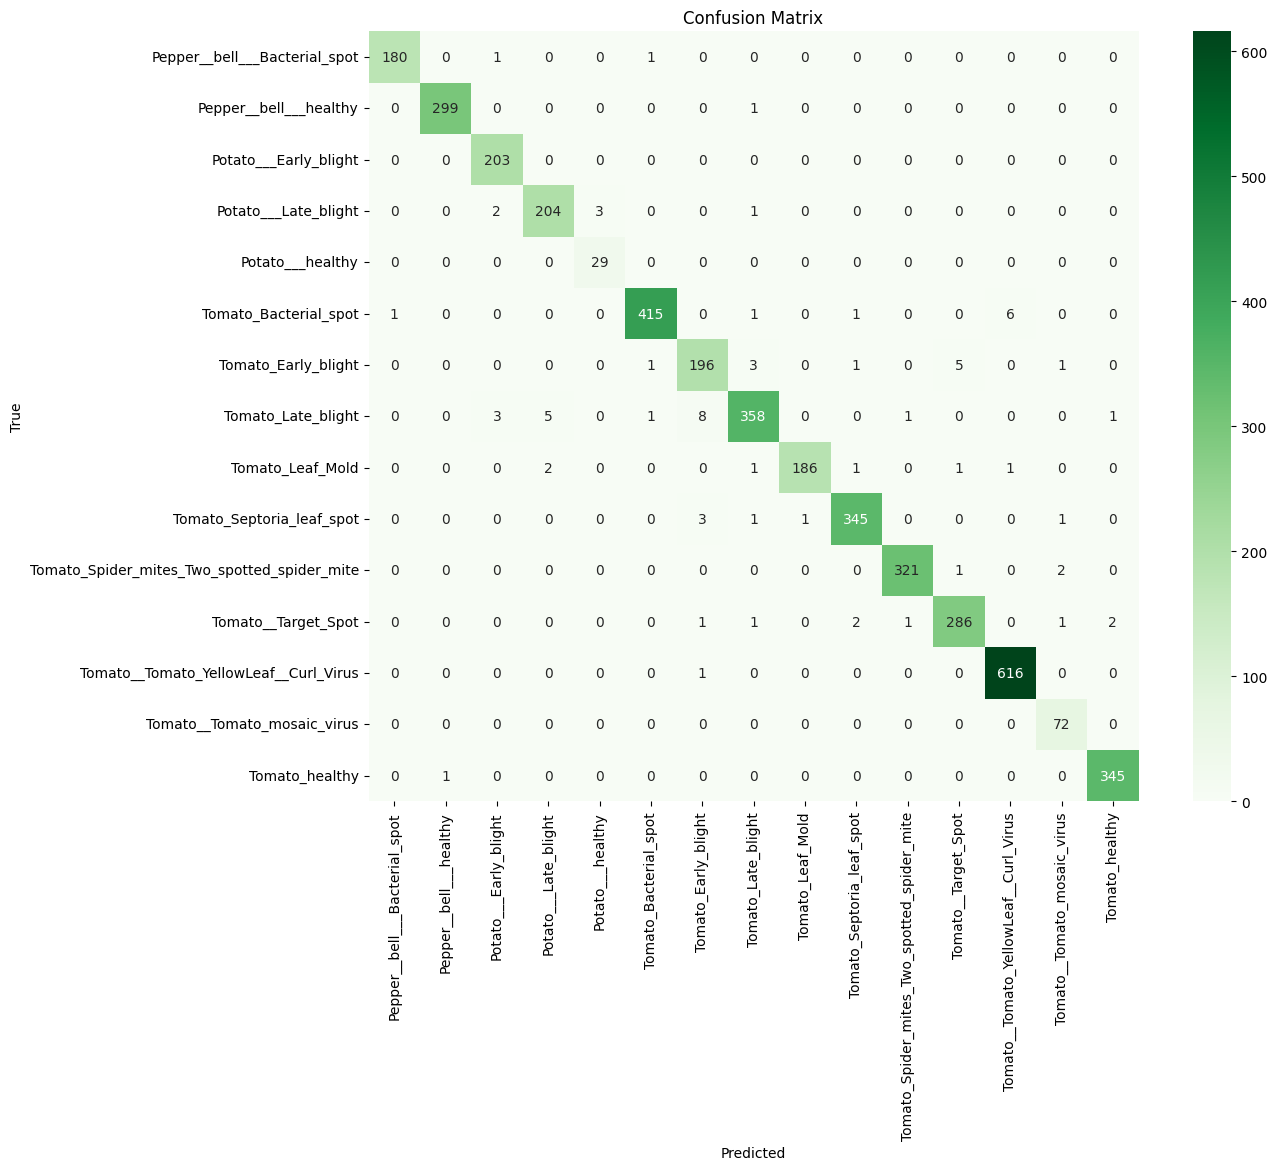

129/129 [==============================] - 4s 28ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.99      0.99       182
                     Pepper__bell___healthy       1.00      1.00      1.00       300
                      Potato___Early_blight       0.97      1.00      0.99       203
                       Potato___Late_blight       0.97      0.97      0.97       210
                           Potato___healthy       0.91      1.00      0.95        29
                      Tomato_Bacterial_spot       0.99      0.98      0.99       424
                        Tomato_Early_blight       0.94      0.95      0.94       207
                         Tomato_Late_blight       0.98      0.95      0.96       377
                           Tomato_Leaf_Mold       0.99      0.97      0.98       192
                  Tomato_Septoria_leaf_spot       0.99      0.98      0.98       351
Tomato_S

In [ ]:
output_checking()

129/129 [==============================] - 4s 28ms/step


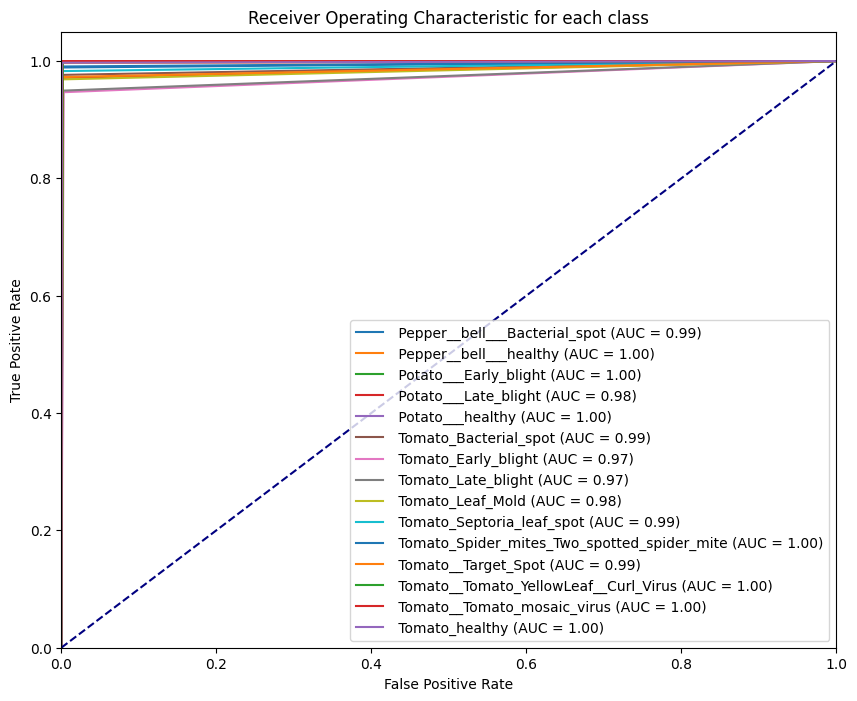

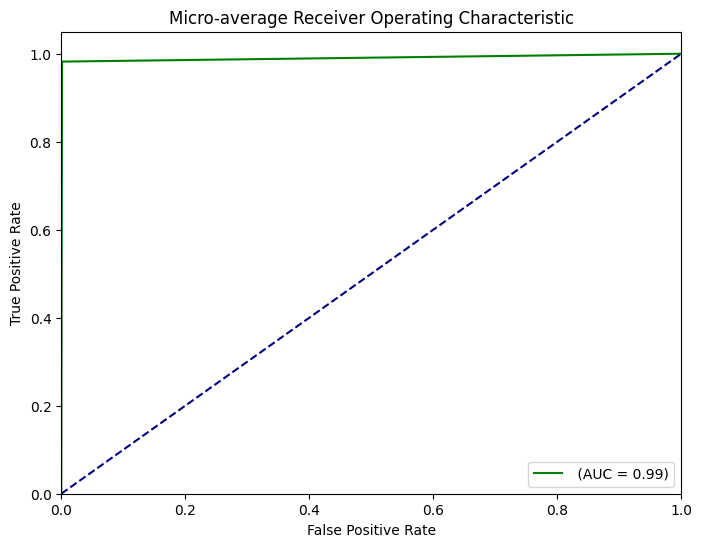

AUC =  0.990422549833887


In [ ]:

Roc_curve()

### Xception

In [ ]:
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the Xception model with pre-trained weights (include_top=False to exclude the final classification layers)
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the Xception model
flatten_layer = Flatten()(xception_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both Xception and the custom layers
model = Model(inputs=xception_model.input, outputs=output_layer)

# Display the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/xception/5_11_23/xception_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 2.5026 - accuracy: 0.7780
Epoch 1: val_loss improved from inf to 0.49600, saving model to /content/drive/MyDrive/xception/5_11_23/xception_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 175s 532ms/step - loss: 2.5026 - accuracy: 0.7780 - val_loss: 0.4960 - val_accuracy: 0.8995 - lr: 0.0010
Epoch 2/50
258/258 [==============================] - ETA: 0s - loss: 0.3757 - accuracy: 0.9516
Epoch 2: val_loss improved from 0.49600 to 0.34034, saving model to /content/drive/MyDrive/xception/5_11_23/xception_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 137s 530ms/step - loss: 0.3757 - accuracy: 0.9516 - val_loss: 0.3403 - val_accuracy: 0.9276 - lr: 0.0010
Epoch 3/50
258/258 [==============================] - ETA: 0s - loss: 0.2089 - accuracy: 0.9686
Epoch 3: val_loss improved from 0.34034 to 0.21717, saving model to /content/drive/MyDrive/xception/5_11_23/xc

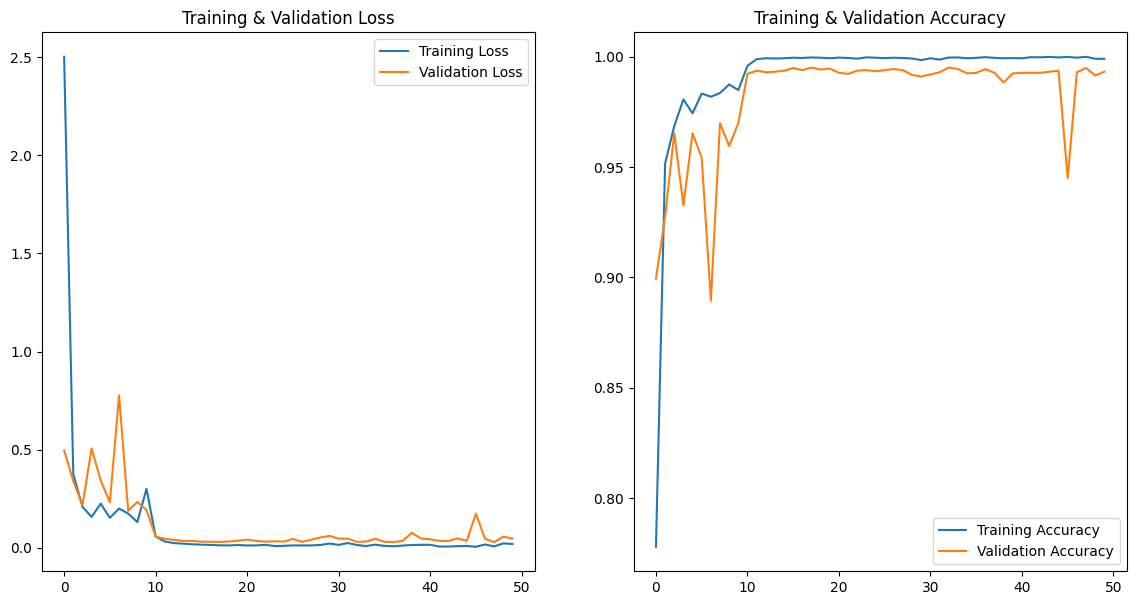

In [ ]:
curve()

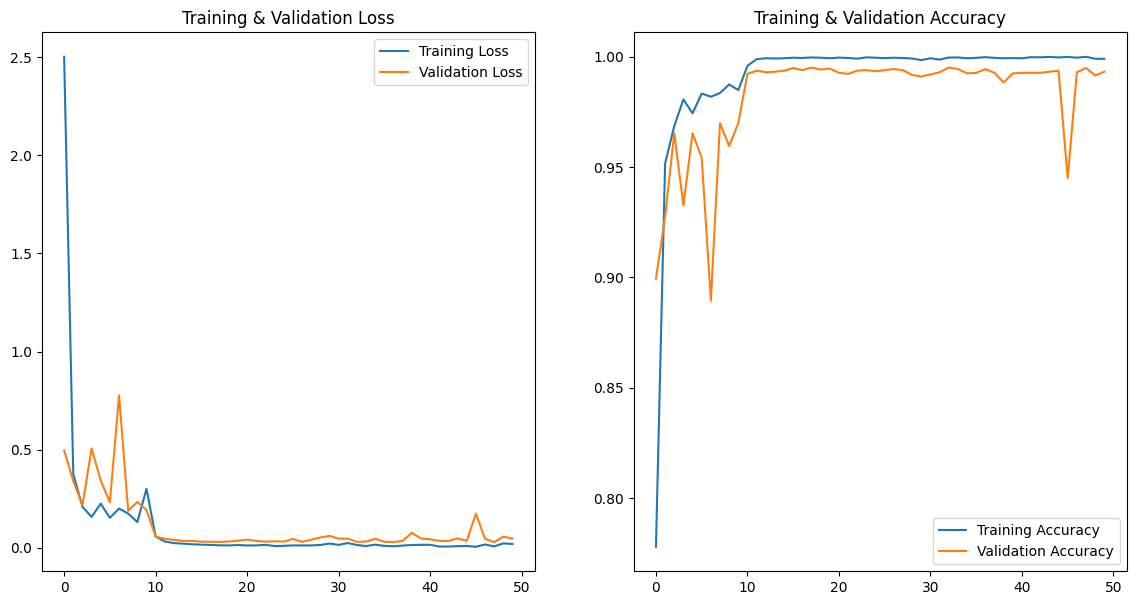

129/129 [==============================] - 9s 59ms/step
Accuracy: 0.9932170542635659
Precision: 0.9929993879524083
Recall: 0.9920043998589184
F1 Score: 0.992458559318609
129/129 [==============================] - 8s 60ms/step


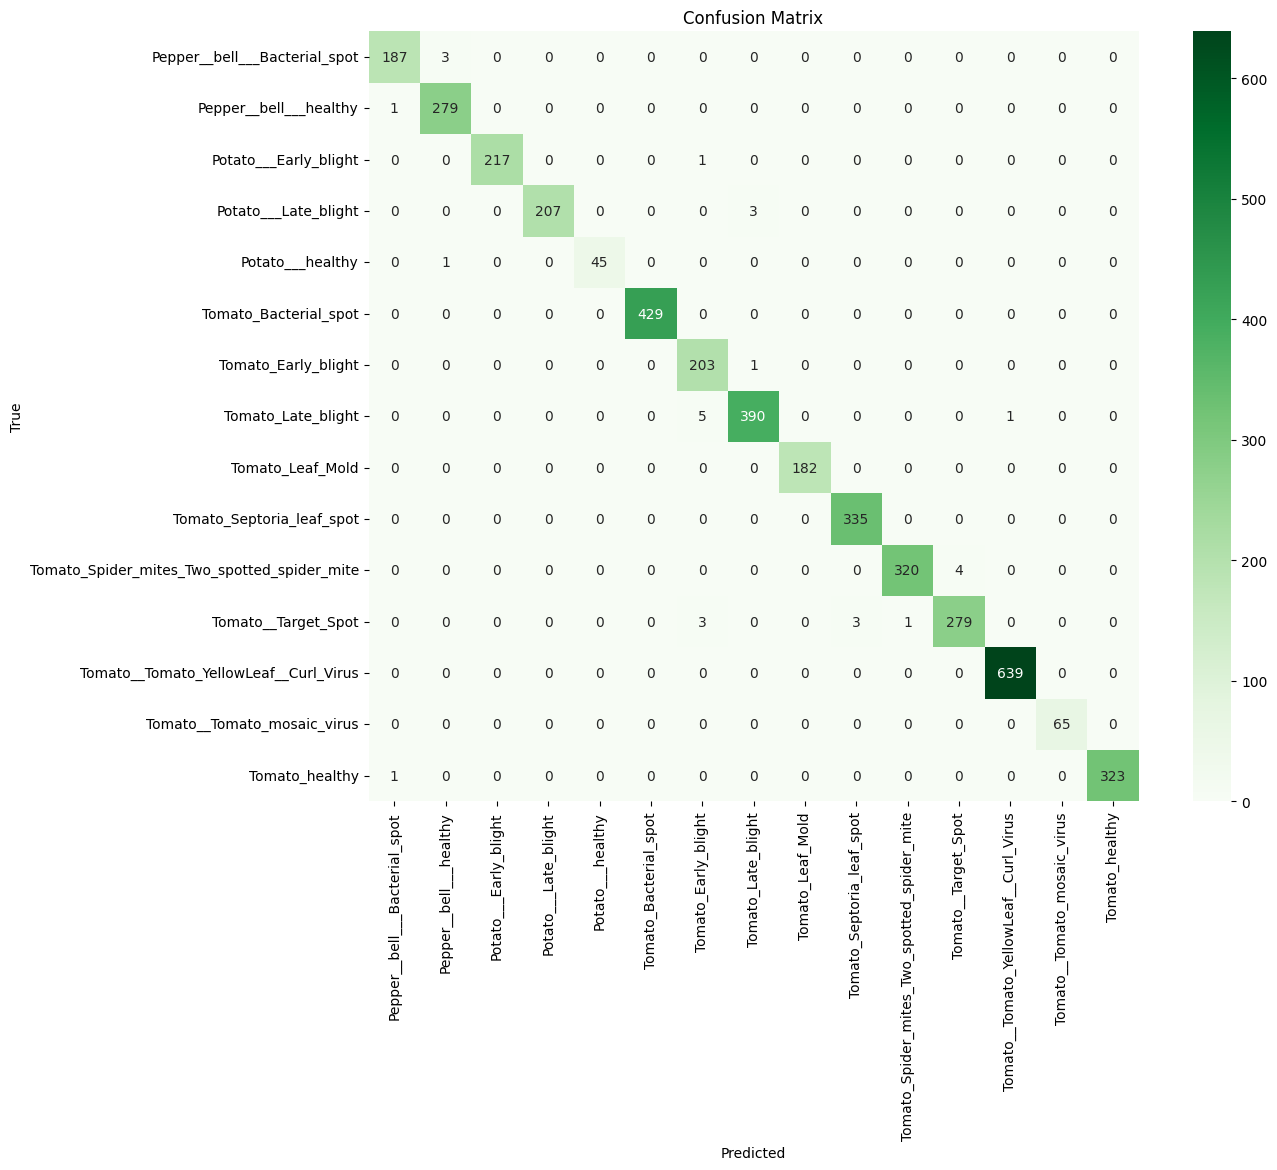

129/129 [==============================] - 8s 60ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.98      0.99       190
                     Pepper__bell___healthy       0.99      1.00      0.99       280
                      Potato___Early_blight       1.00      1.00      1.00       218
                       Potato___Late_blight       1.00      0.99      0.99       210
                           Potato___healthy       1.00      0.98      0.99        46
                      Tomato_Bacterial_spot       1.00      1.00      1.00       429
                        Tomato_Early_blight       0.96      1.00      0.98       204
                         Tomato_Late_blight       0.99      0.98      0.99       396
                           Tomato_Leaf_Mold       1.00      1.00      1.00       182
                  Tomato_Septoria_leaf_spot       0.99      1.00      1.00       335
Tomato_S

In [ ]:
output_checking()

### MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet  # Import MobileNet
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the MobileNet model with pre-trained weights (include_top=False to exclude the final classification layers)
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the MobileNet model
flatten_layer = Flatten()(mobilenet_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both MobileNet and the custom layers
model = Model(inputs=mobilenet_model.input, outputs=output_layer)

# Display the model summary
model.summary()


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/mobile net/5_11_23/MobileNet_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 4.5774 - accuracy: 0.8482
Epoch 1: val_loss improved from inf to 3.05627, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/mobile net/5_11_23/MobileNet_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 65s 124ms/step - loss: 4.5774 - accuracy: 0.8482 - val_loss: 3.0563 - val_accuracy: 0.6468 - lr: 0.0010
Epoch 2/50
258/258 [==============================] - ETA: 0s - loss: 0.6260 - accuracy: 0.9422
Epoch 2: val_loss improved from 3.05627 to 0.48930, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/mobile net/5_11_23/MobileNet_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 29s 111ms/step - loss: 0.6260 - accuracy: 0.9422 - val_loss: 0.4893 - val_accuracy: 0.9271 - lr: 0.0010
Epoch 3/50
258/258 [==============================] - ETA: 0s - loss: 0.2925 - accuracy: 0.9630
Epoch 3: val_loss improved from 0.48930 to

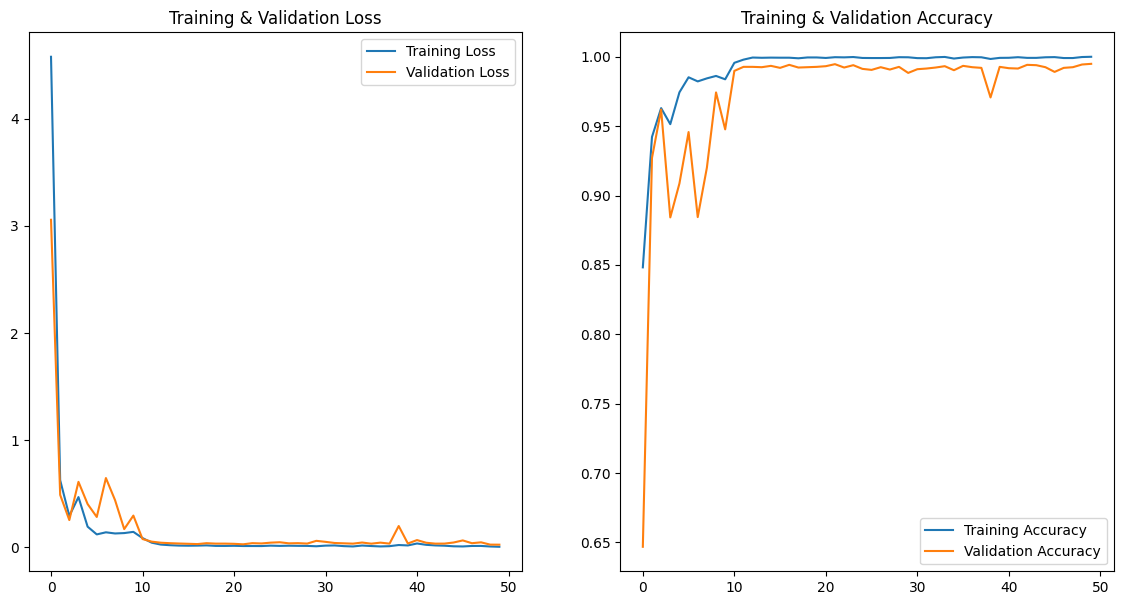

In [ ]:
curve()

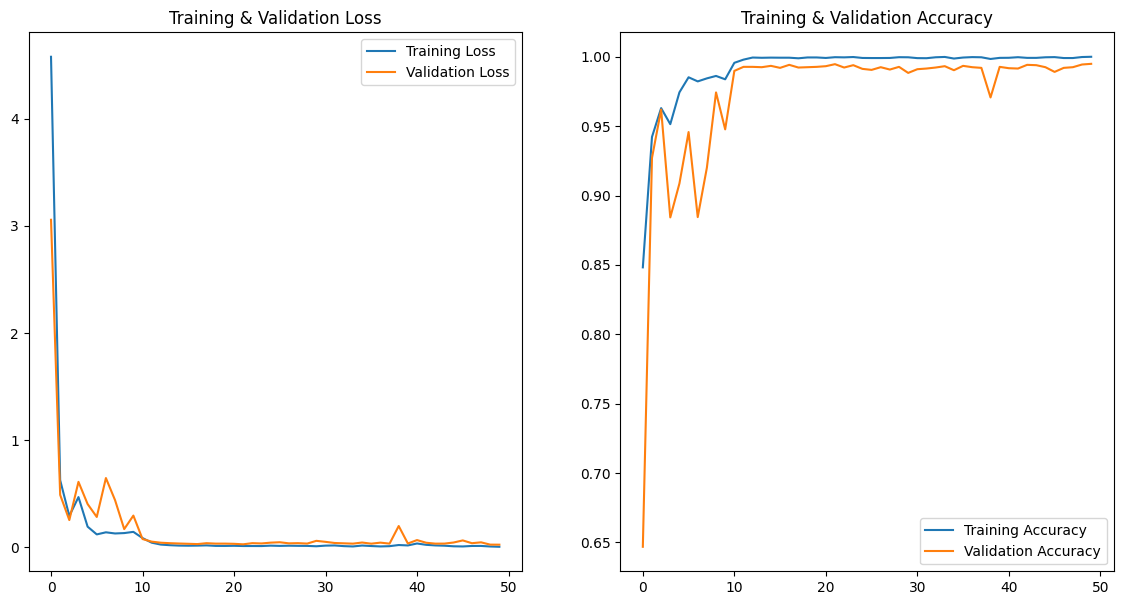

129/129 [==============================] - 2s 15ms/step
Accuracy: 0.9949127906976745
Precision: 0.9949583126305848
Recall: 0.9950490209374577
F1 Score: 0.9949990891410005
129/129 [==============================] - 2s 15ms/step


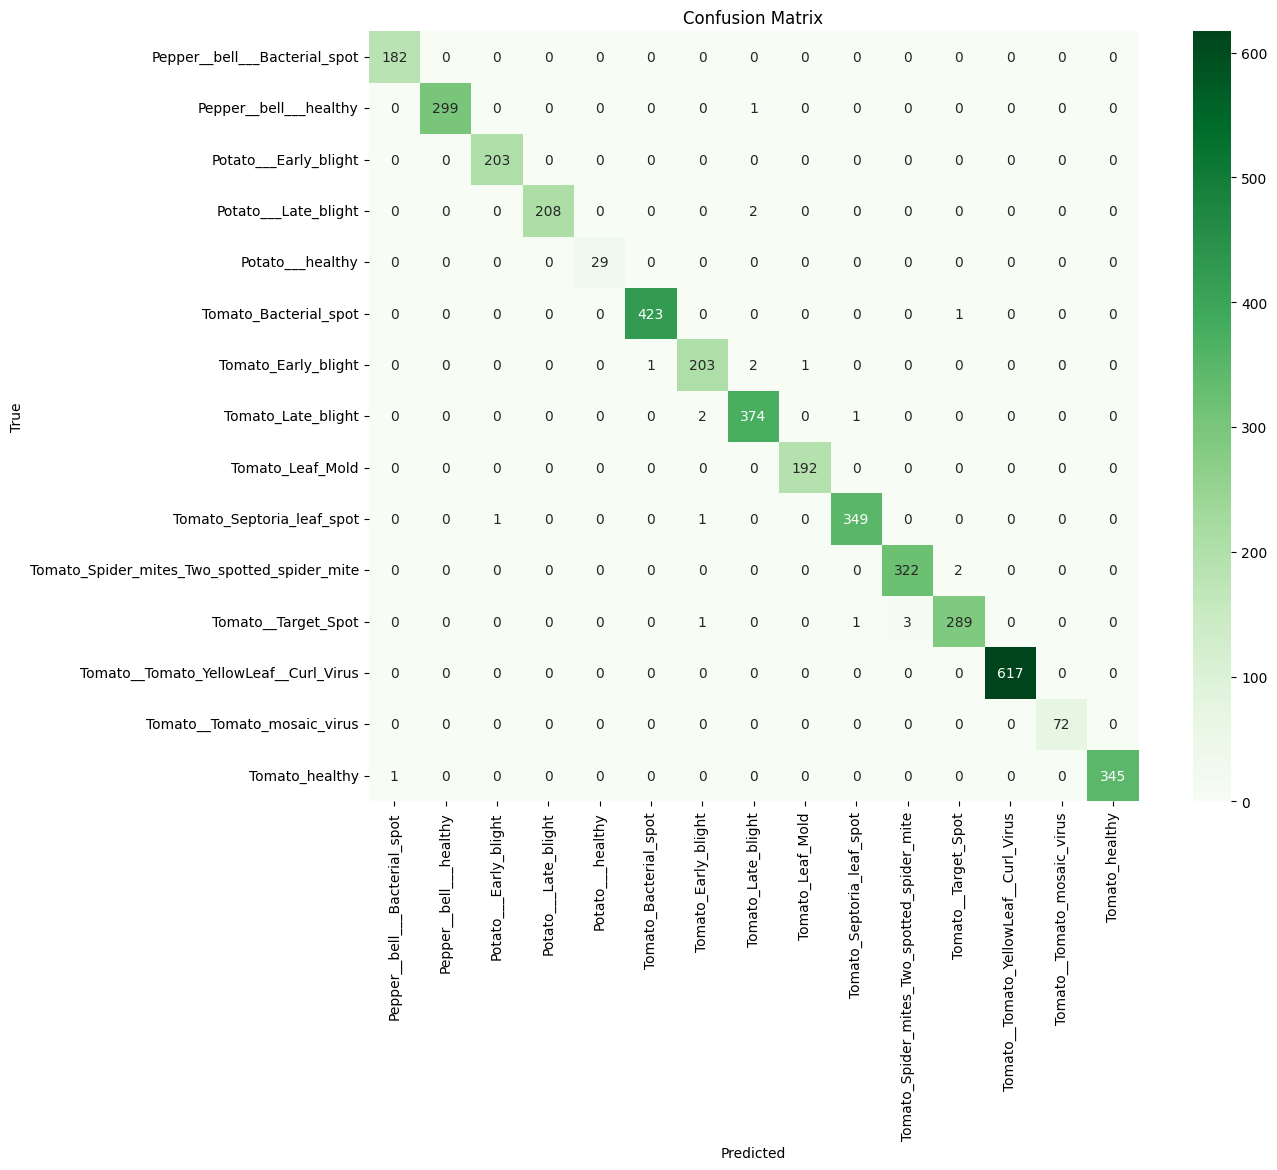

129/129 [==============================] - 2s 14ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      1.00      1.00       182
                     Pepper__bell___healthy       1.00      1.00      1.00       300
                      Potato___Early_blight       1.00      1.00      1.00       203
                       Potato___Late_blight       1.00      0.99      1.00       210
                           Potato___healthy       1.00      1.00      1.00        29
                      Tomato_Bacterial_spot       1.00      1.00      1.00       424
                        Tomato_Early_blight       0.98      0.98      0.98       207
                         Tomato_Late_blight       0.99      0.99      0.99       377
                           Tomato_Leaf_Mold       0.99      1.00      1.00       192
                  Tomato_Septoria_leaf_spot       0.99      0.99      0.99       351
Tomato_S

In [ ]:
output_checking()

129/129 [==============================] - 2s 15ms/step


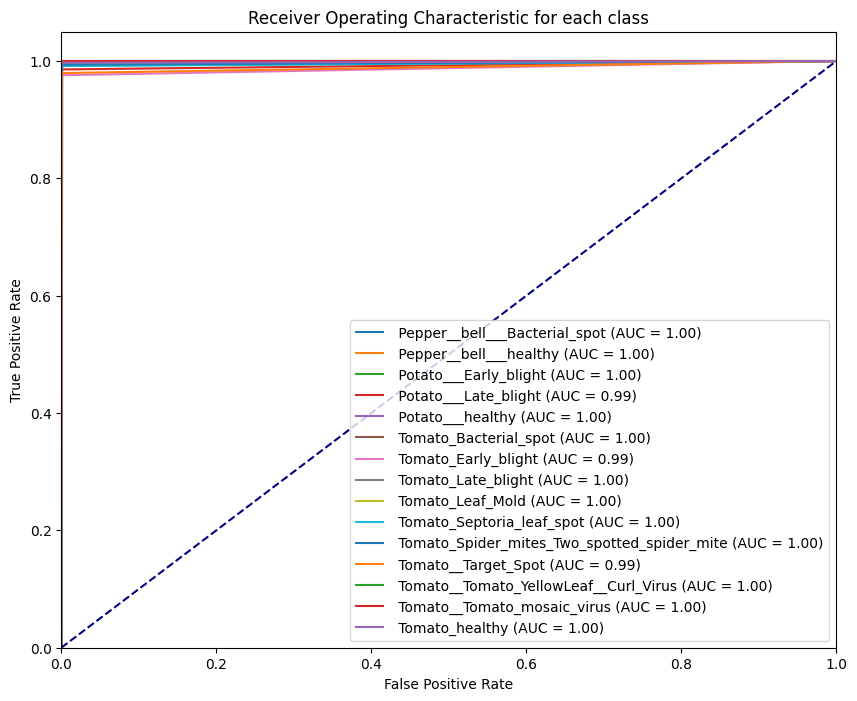

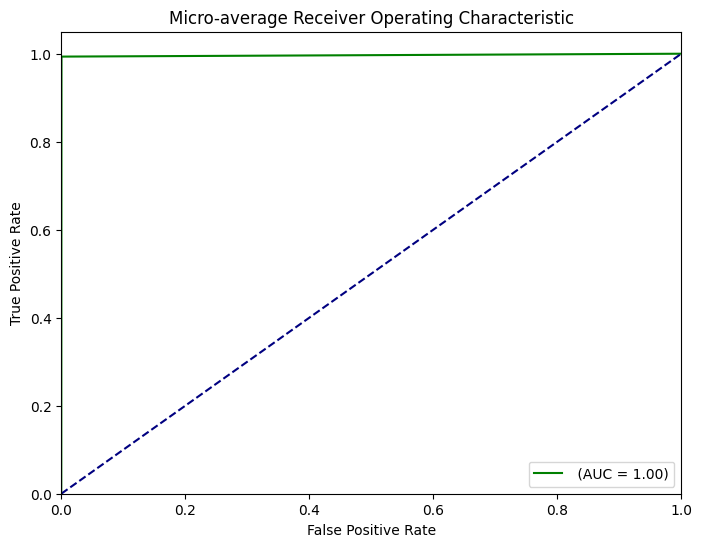

AUC =  0.9965652685492802


In [ ]:
Roc_curve()

### MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the MobileNetV2 model with pre-trained weights (include_top=False to exclude the final classification layers)
mobilenetv2_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the MobileNetV2 model
flatten_layer = Flatten()(mobilenetv2_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both MobileNetV2 and the custom layers
model = Model(inputs=mobilenetv2_model.input, outputs=output_layer)

# Display the model summary
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/MobileNetv2/5_11_23/MObilentv2_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 3.4844 - accuracy: 0.8085
Epoch 1: val_loss improved from inf to 139.30000, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/MobileNetv2/5_11_23/MObilentv2_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 79s 158ms/step - loss: 3.4844 - accuracy: 0.8085 - val_loss: 139.3000 - val_accuracy: 0.1495 - lr: 0.0010
Epoch 2/50
258/258 [==============================] - ETA: 0s - loss: 0.5551 - accuracy: 0.9163
Epoch 2: val_loss improved from 139.30000 to 22.45487, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/MobileNetv2/5_11_23/MObilentv2_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 36s 141ms/step - loss: 0.5551 - accuracy: 0.9163 - val_loss: 22.4549 - val_accuracy: 0.1495 - lr: 0.0010
Epoch 3/50
258/258 [==============================] - ETA: 0s - loss: 0.2357 - accuracy: 0.9557
Epoch 3: val_loss improved fro

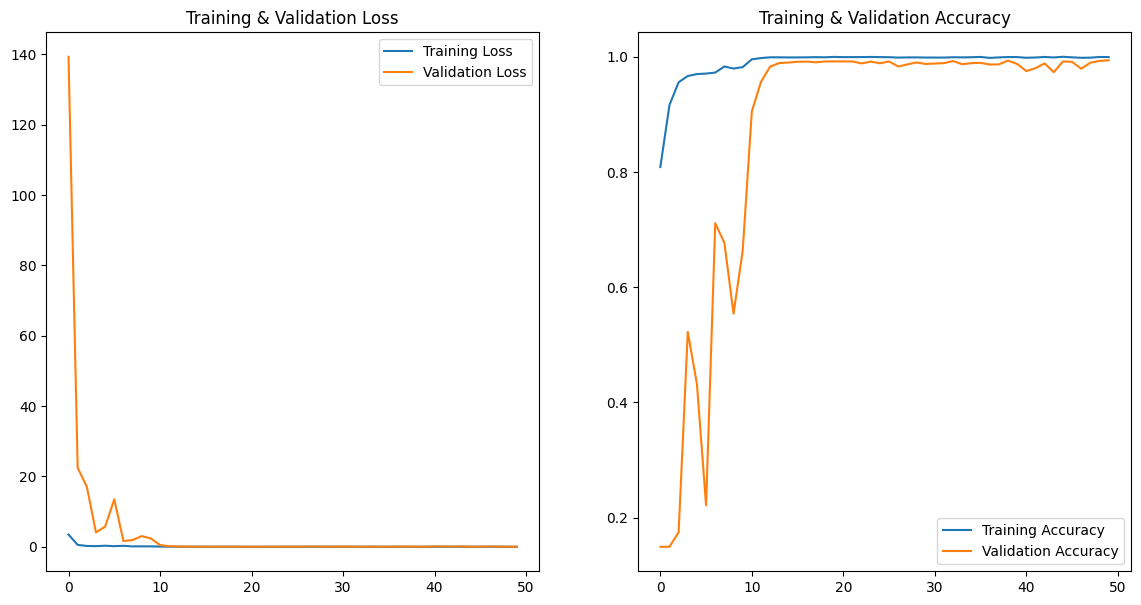

In [ ]:
curve()

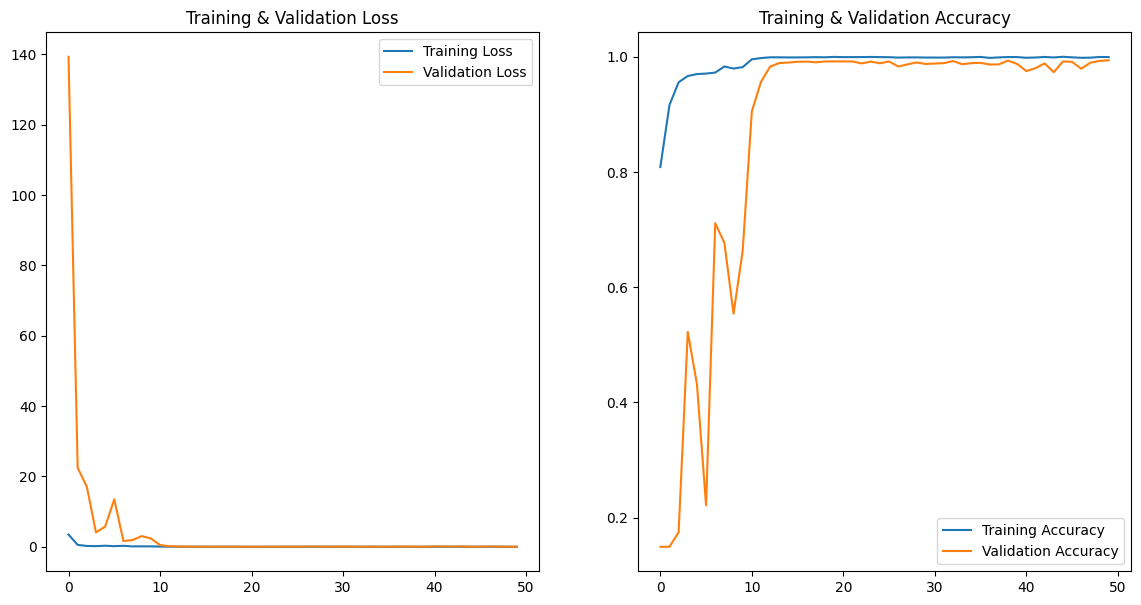

129/129 [==============================] - 3s 19ms/step
Accuracy: 0.9937015503875969
Precision: 0.9903740852909753
Recall: 0.9916301008427942
F1 Score: 0.9909605221040256
129/129 [==============================] - 2s 19ms/step


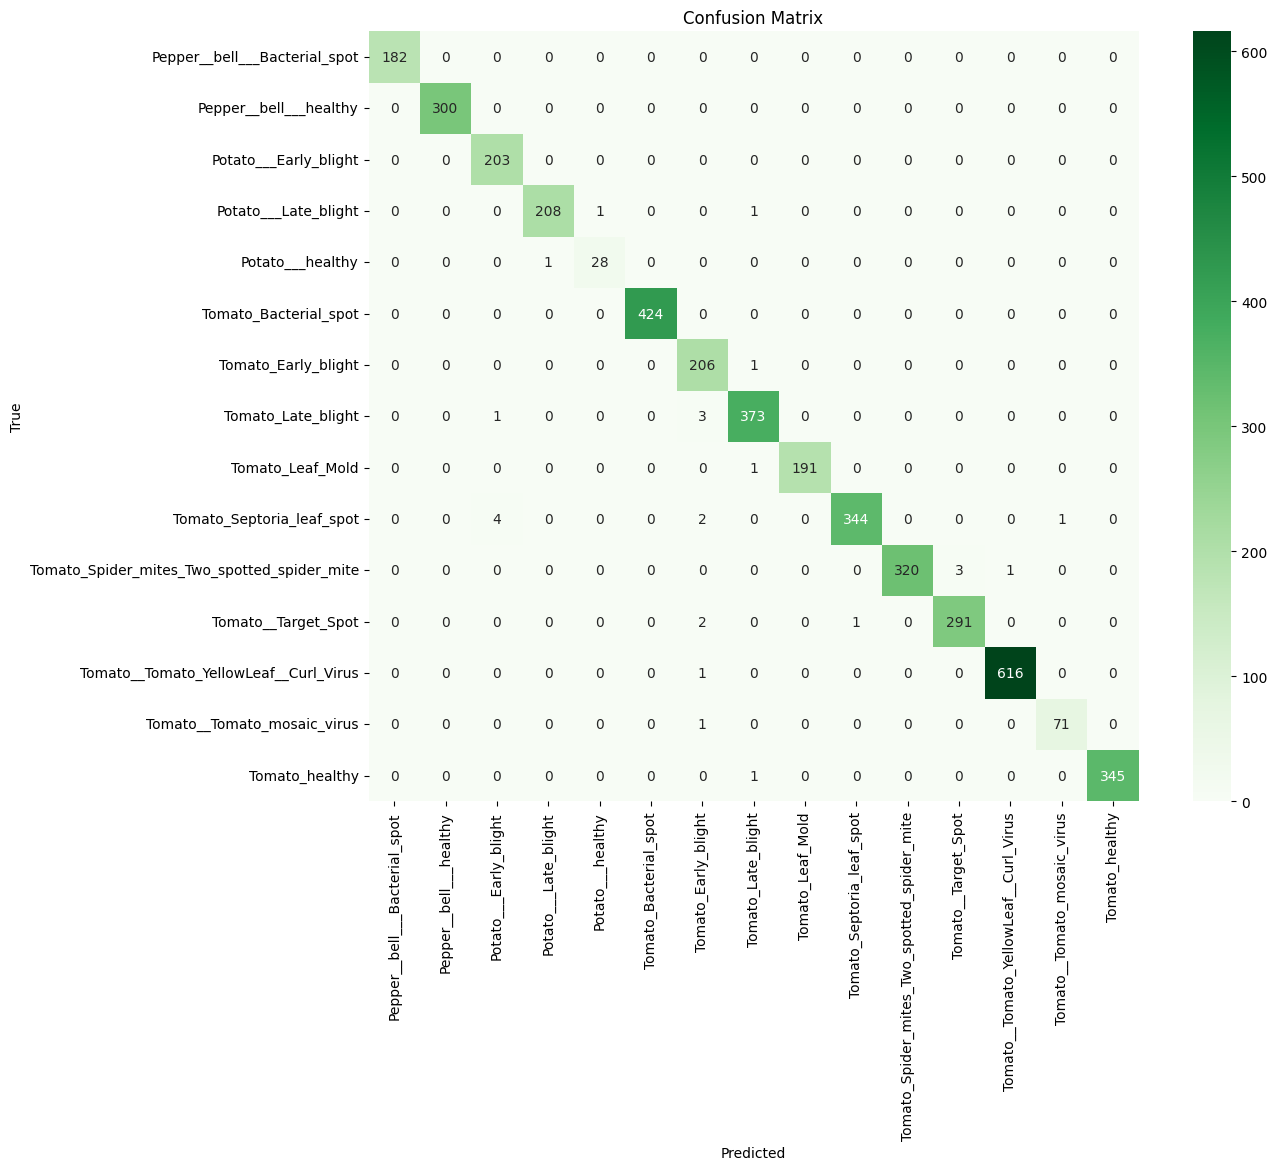

129/129 [==============================] - 2s 18ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      1.00      1.00       182
                     Pepper__bell___healthy       1.00      1.00      1.00       300
                      Potato___Early_blight       0.98      1.00      0.99       203
                       Potato___Late_blight       1.00      0.99      0.99       210
                           Potato___healthy       0.97      0.97      0.97        29
                      Tomato_Bacterial_spot       1.00      1.00      1.00       424
                        Tomato_Early_blight       0.96      1.00      0.98       207
                         Tomato_Late_blight       0.99      0.99      0.99       377
                           Tomato_Leaf_Mold       1.00      0.99      1.00       192
                  Tomato_Septoria_leaf_spot       1.00      0.98      0.99       351
Tomato_S

In [ ]:
output_checking()

129/129 [==============================] - 2s 19ms/step


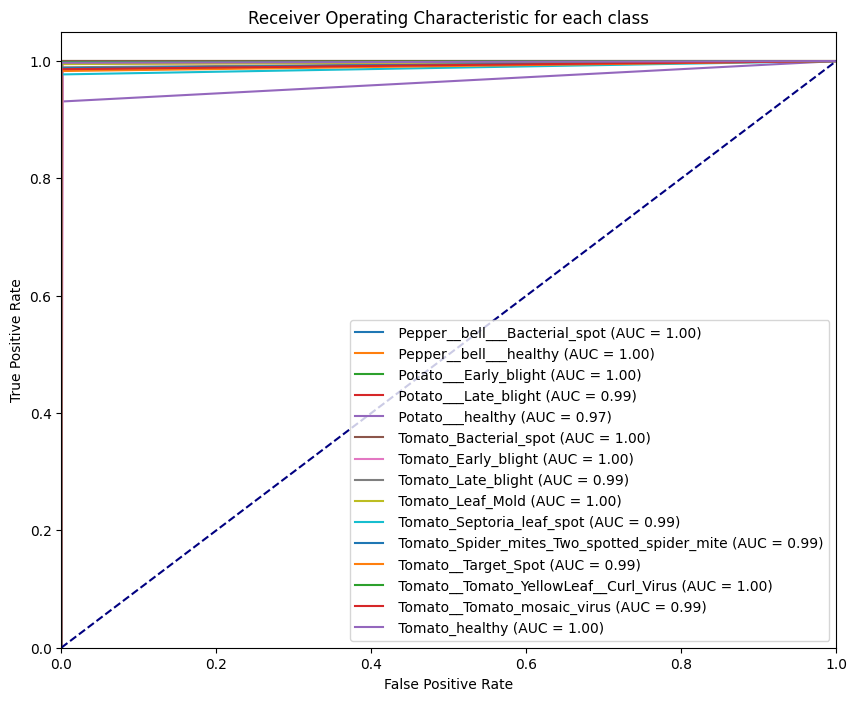

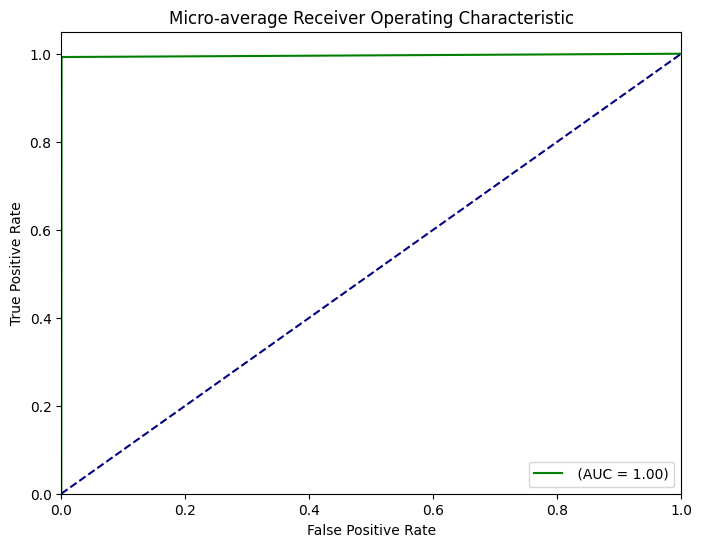

AUC =  0.9960375138427464


In [ ]:
Roc_curve()

### ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50  # Import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model with pre-trained weights (include_top=False to exclude the final classification layers)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the ResNet50 model
flatten_layer = Flatten()(resnet_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both ResNet50 and the custom layers
model = Model(inputs=resnet_model.input, outputs=output_layer)

# Display the model summary
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                         

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/ResNet50/6_11_23/ResNet50_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=20,
    callbacks=[callbacks_instance]
)

Epoch 1/20
258/258 [==============================] - ETA: 0s - loss: 4.6085 - accuracy: 0.7851
Epoch 1: val_loss improved from inf to 13.99605, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/ResNet50/6_11_23/ResNet50_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 146s 403ms/step - loss: 4.6085 - accuracy: 0.7851 - val_loss: 13.9961 - val_accuracy: 0.4857 - lr: 0.0010
Epoch 2/20
258/258 [==============================] - ETA: 0s - loss: 0.5996 - accuracy: 0.9247
Epoch 2: val_loss improved from 13.99605 to 0.58174, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/ResNet50/6_11_23/ResNet50_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 93s 360ms/step - loss: 0.5996 - accuracy: 0.9247 - val_loss: 0.5817 - val_accuracy: 0.8697 - lr: 0.0010
Epoch 3/20
258/258 [==============================] - ETA: 0s - loss: 0.5642 - accuracy: 0.9400
Epoch 3: val_loss did not improve from 0.581

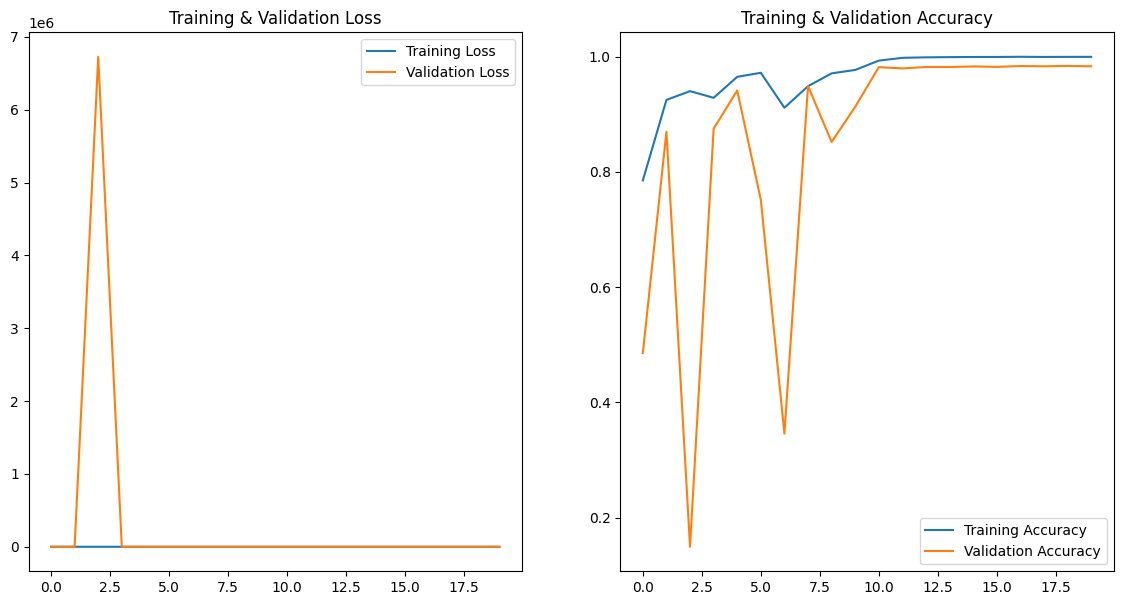

In [ ]:
curve()

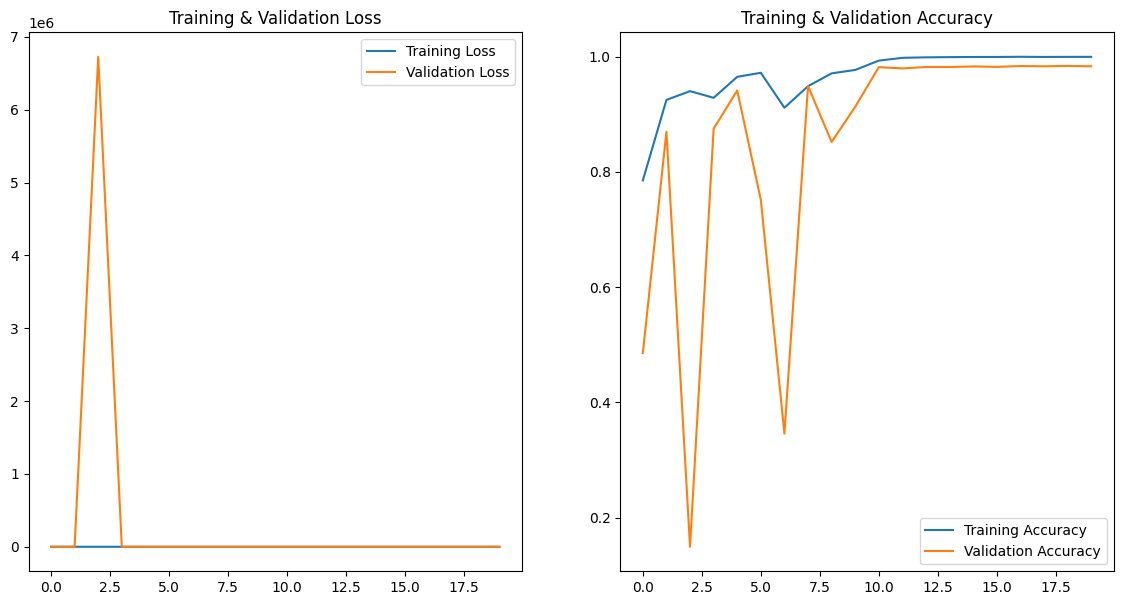

129/129 [==============================] - 7s 48ms/step
Accuracy: 0.9830426356589147
Precision: 0.9807788576291852
Recall: 0.9816385913357509
F1 Score: 0.9810698472278901
129/129 [==============================] - 6s 48ms/step


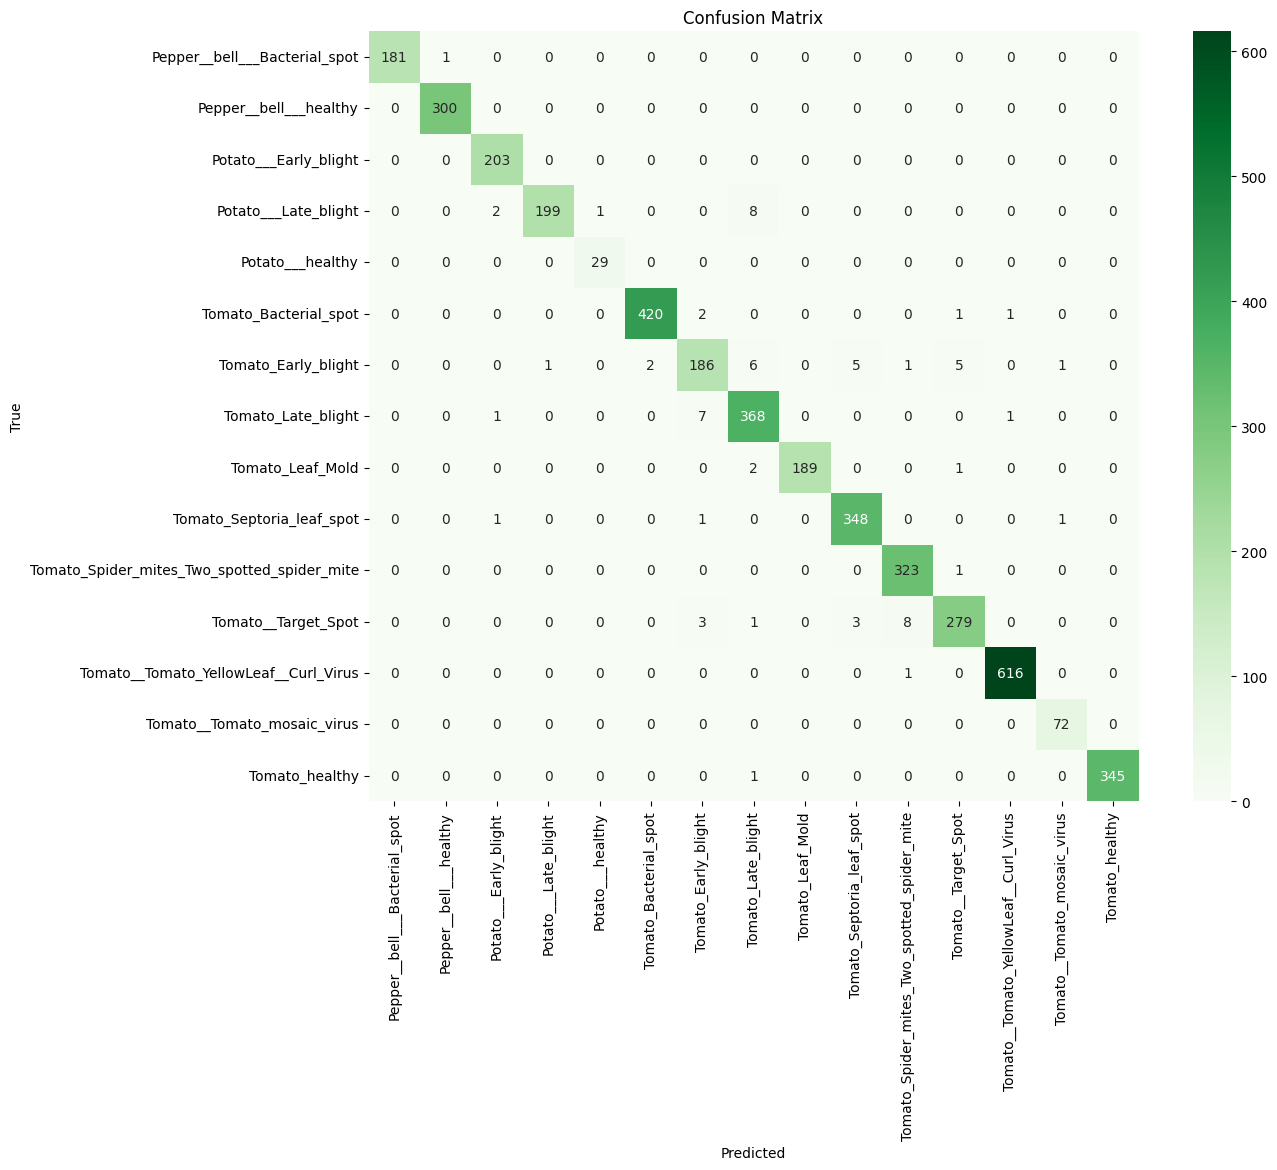

129/129 [==============================] - 6s 48ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.99      1.00       182
                     Pepper__bell___healthy       1.00      1.00      1.00       300
                      Potato___Early_blight       0.98      1.00      0.99       203
                       Potato___Late_blight       0.99      0.95      0.97       210
                           Potato___healthy       0.97      1.00      0.98        29
                      Tomato_Bacterial_spot       1.00      0.99      0.99       424
                        Tomato_Early_blight       0.93      0.90      0.92       207
                         Tomato_Late_blight       0.95      0.98      0.96       377
                           Tomato_Leaf_Mold       1.00      0.98      0.99       192
                  Tomato_Septoria_leaf_spot       0.98      0.99      0.98       351
Tomato_S

In [ ]:
# model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/ResNet50/6_11_23/ResNet50_model_with(high_preprocess)50epoch.h5')
output_checking()

129/129 [==============================] - 6s 47ms/step


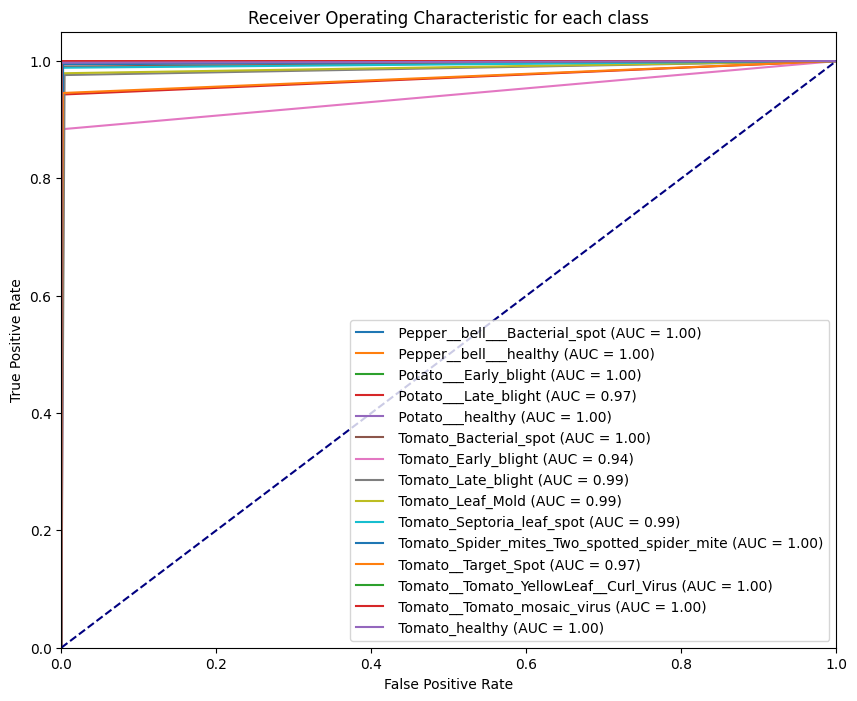

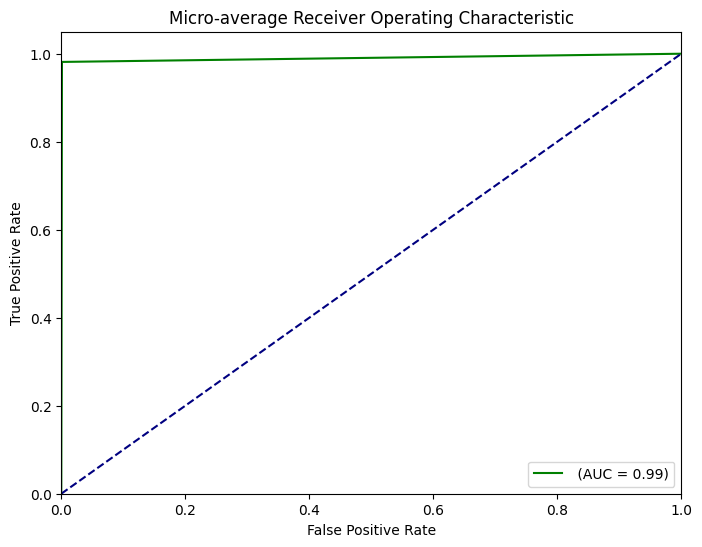

AUC =  0.9901283914728682


In [ ]:
Roc_curve()

### Resnet101

In [ ]:
from tensorflow.keras.applications import ResNet101  # Import ResNet101
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the ResNet101 model with pre-trained weights (include_top=False to exclude the final classification layers)
resnet101_model = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the ResNet101 model
flatten_layer = Flatten()(resnet101_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both ResNet101 and the custom layers
model = Model(inputs=resnet101_model.input, outputs=output_layer)

# Display the model summary
model.summary()


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/ResNet101/5_11_23/Resnet101_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=20,
    callbacks=[callbacks_instance]
)

Epoch 1/20
258/258 [==============================] - ETA: 0s - loss: 7.9176 - accuracy: 0.9085
Epoch 1: val_loss improved from inf to 5.48424, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/ResNet101/5_11_23/Resnet101_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 276s 820ms/step - loss: 7.9176 - accuracy: 0.9085 - val_loss: 5.4842 - val_accuracy: 0.9646
Epoch 2/20
258/258 [==============================] - ETA: 0s - loss: 3.9500 - accuracy: 0.9879
Epoch 2: val_loss improved from 5.48424 to 2.79396, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/ResNet101/5_11_23/Resnet101_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 173s 670ms/step - loss: 3.9500 - accuracy: 0.9879 - val_loss: 2.7940 - val_accuracy: 0.9811
Epoch 3/20
258/258 [==============================] - ETA: 0s - loss: 2.0294 - accuracy: 0.9901
Epoch 3: val_loss improved from 2.79396 to 1.51763, saving model to 

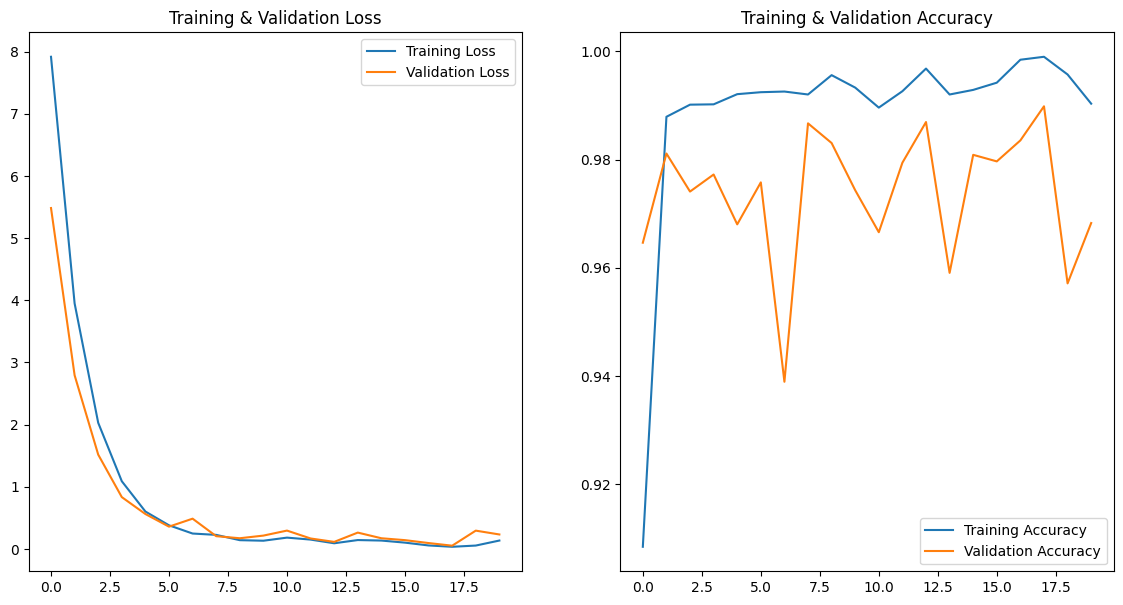

In [ ]:
curve()

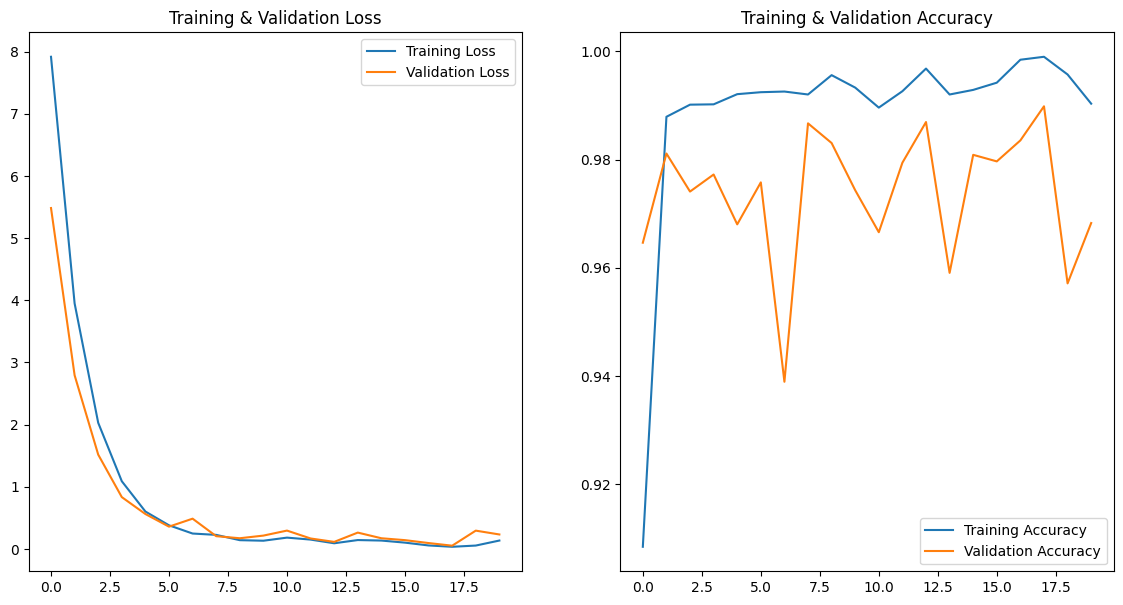

129/129 [==============================] - 13s 84ms/step
Accuracy: 0.968265503875969
Precision: 0.9626592251569003
Recall: 0.9700791321214559
F1 Score: 0.9650826845750657
129/129 [==============================] - 11s 84ms/step


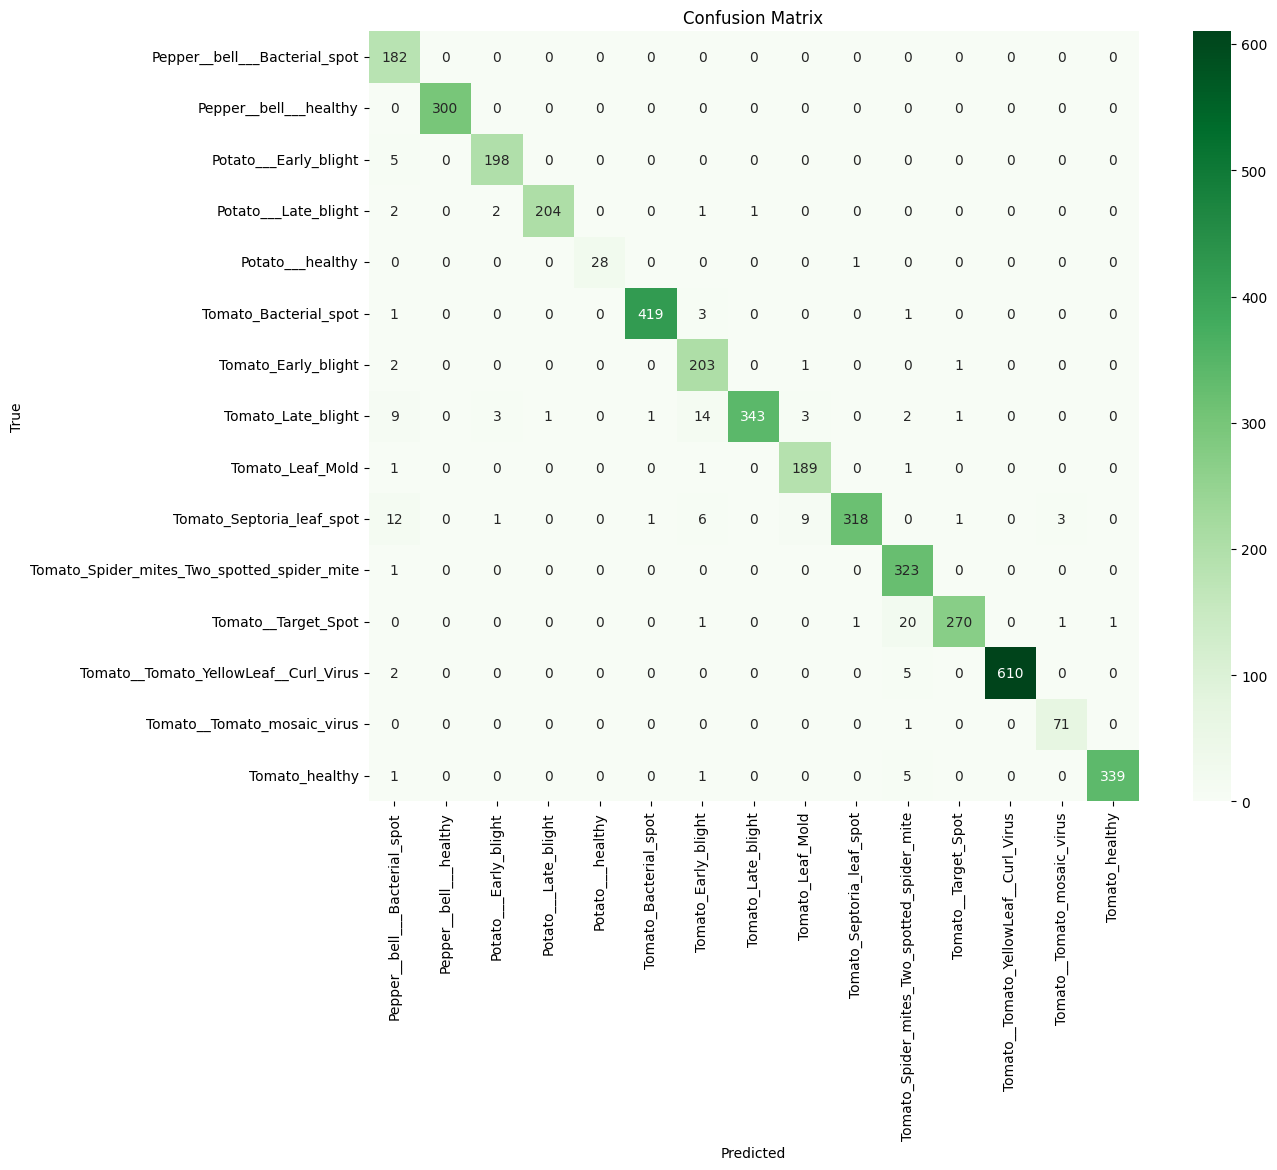

129/129 [==============================] - 11s 85ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.83      1.00      0.91       182
                     Pepper__bell___healthy       1.00      1.00      1.00       300
                      Potato___Early_blight       0.97      0.98      0.97       203
                       Potato___Late_blight       1.00      0.97      0.98       210
                           Potato___healthy       1.00      0.97      0.98        29
                      Tomato_Bacterial_spot       1.00      0.99      0.99       424
                        Tomato_Early_blight       0.88      0.98      0.93       207
                         Tomato_Late_blight       1.00      0.91      0.95       377
                           Tomato_Leaf_Mold       0.94      0.98      0.96       192
                  Tomato_Septoria_leaf_spot       0.99      0.91      0.95       351
Tomato_

In [ ]:
# model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/ResNet101')
output_checking()

129/129 [==============================] - 11s 85ms/step


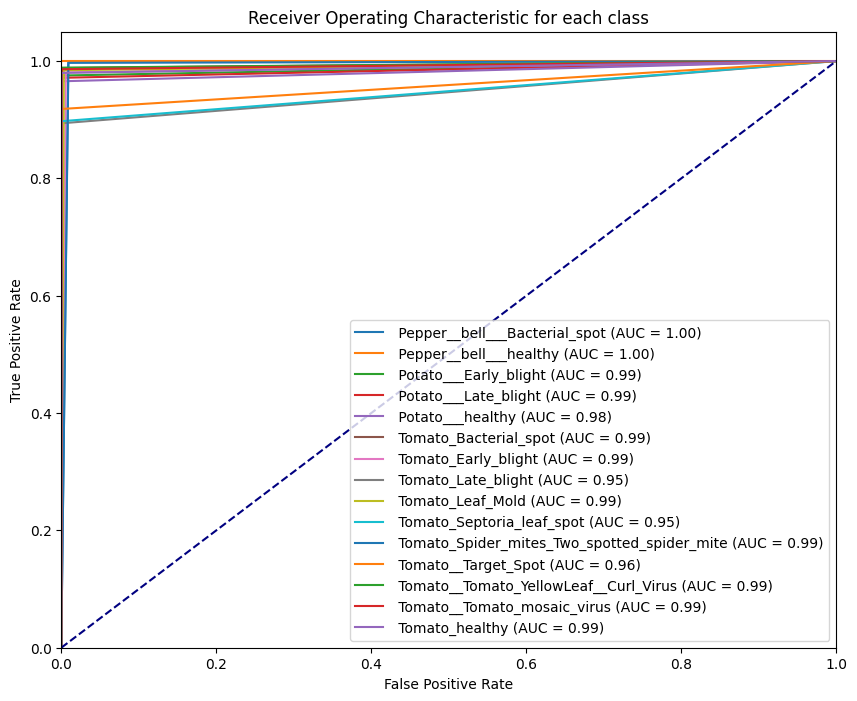

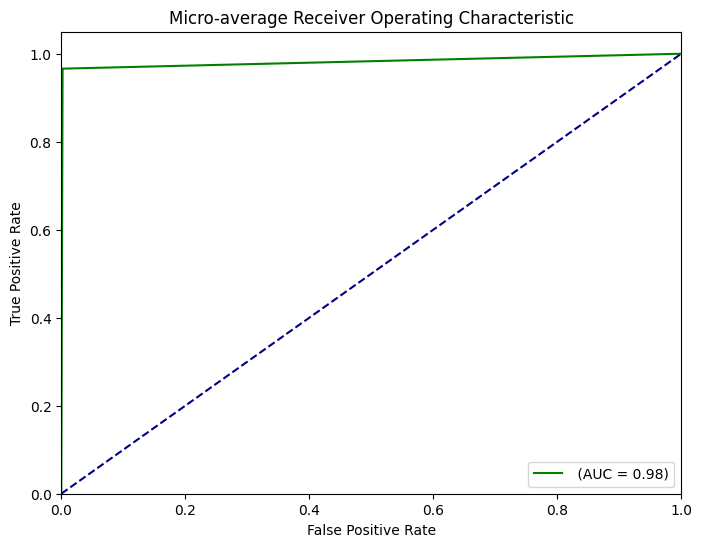

AUC =  0.9819871262458473


In [ ]:
Roc_curve()

In [ ]:
model.save('/content/drive/MyDrive/Deep learning model(Base_paper)/ResNet101/6_11_23/REsent121_98acc.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
# Define the input shape and the number of classes in your dataset
input_shape = (150, 150, 3)  # Adjust to match the input size of your images
num_classes = 15  # Change to match the number of classes in your dataset

# Create a VGG16 base model with pre-trained weights (exclude the top classification layers)
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the VGG16 base model
for layer in vgg16_base.layers:
    layer.trainable = False

# Add custom classification layers on top of the VGG16 base model
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model combining VGG16 and the custom classification layers
model = Model(inputs=vgg16_base.input, outputs=predictions)



In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/vgg16/6_11_23/VGG16_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=64),
    x_train,y_train_encoded,batch_size=80,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
207/207 [==============================] - ETA: 0s - loss: 3.7987 - accuracy: 0.5779
Epoch 1: val_loss improved from inf to 0.87290, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/vgg16/6_11_23/VGG16_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 69s 260ms/step - loss: 3.7987 - accuracy: 0.5779 - val_loss: 0.8729 - val_accuracy: 0.7568 - lr: 0.0010
Epoch 2/50
207/207 [==============================] - ETA: 0s - loss: 0.9788 - accuracy: 0.7117
Epoch 2: val_loss improved from 0.87290 to 0.70412, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/vgg16/6_11_23/VGG16_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 43s 210ms/step - loss: 0.9788 - accuracy: 0.7117 - val_loss: 0.7041 - val_accuracy: 0.7941 - lr: 0.0010
Epoch 3/50
207/207 [==============================] - ETA: 0s - loss: 0.8059 - accuracy: 0.7595
Epoch 3: val_loss improved from 0.70412 to 0.61477, saving m

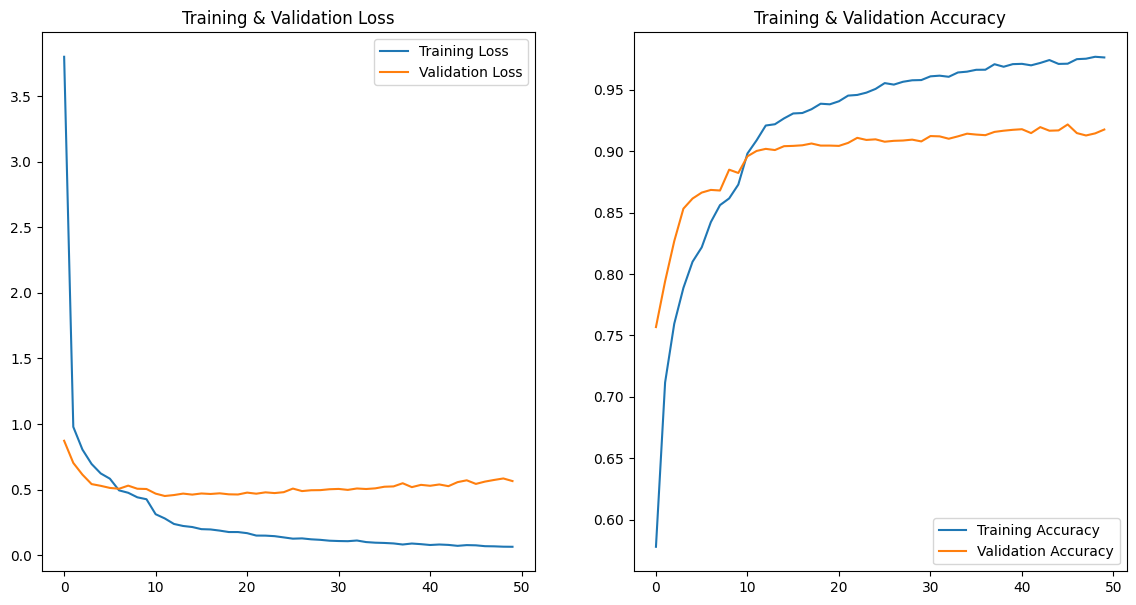

In [ ]:
curve()

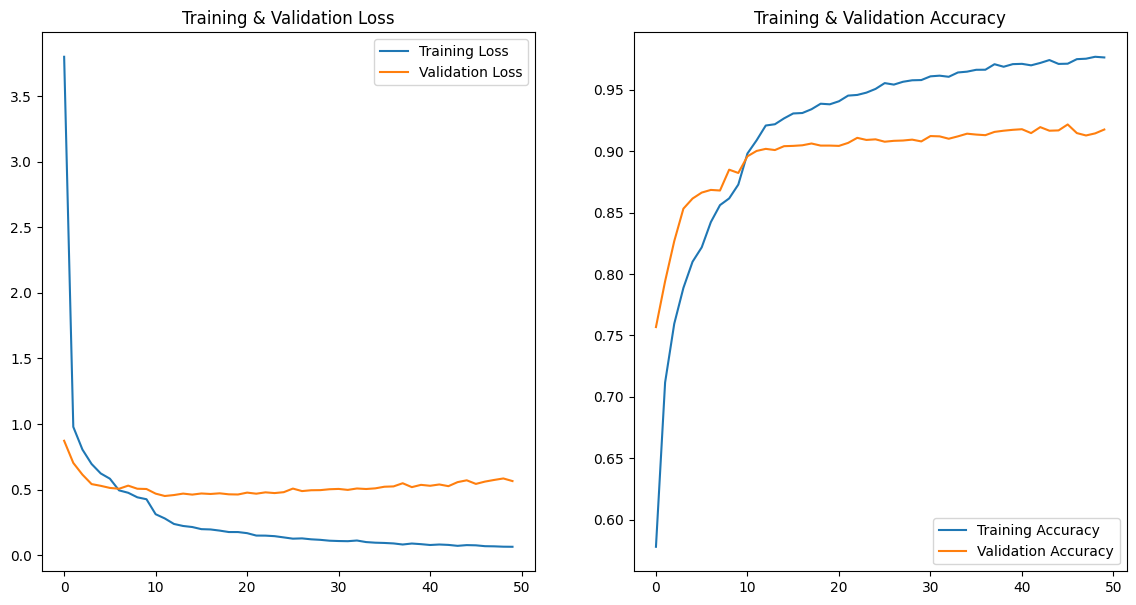

129/129 [==============================] - 11s 62ms/step
Accuracy: 0.9001937984496124
Precision: 0.8872380802815767
Recall: 0.8765488057144086
F1 Score: 0.8810806007716079
129/129 [==============================] - 8s 63ms/step


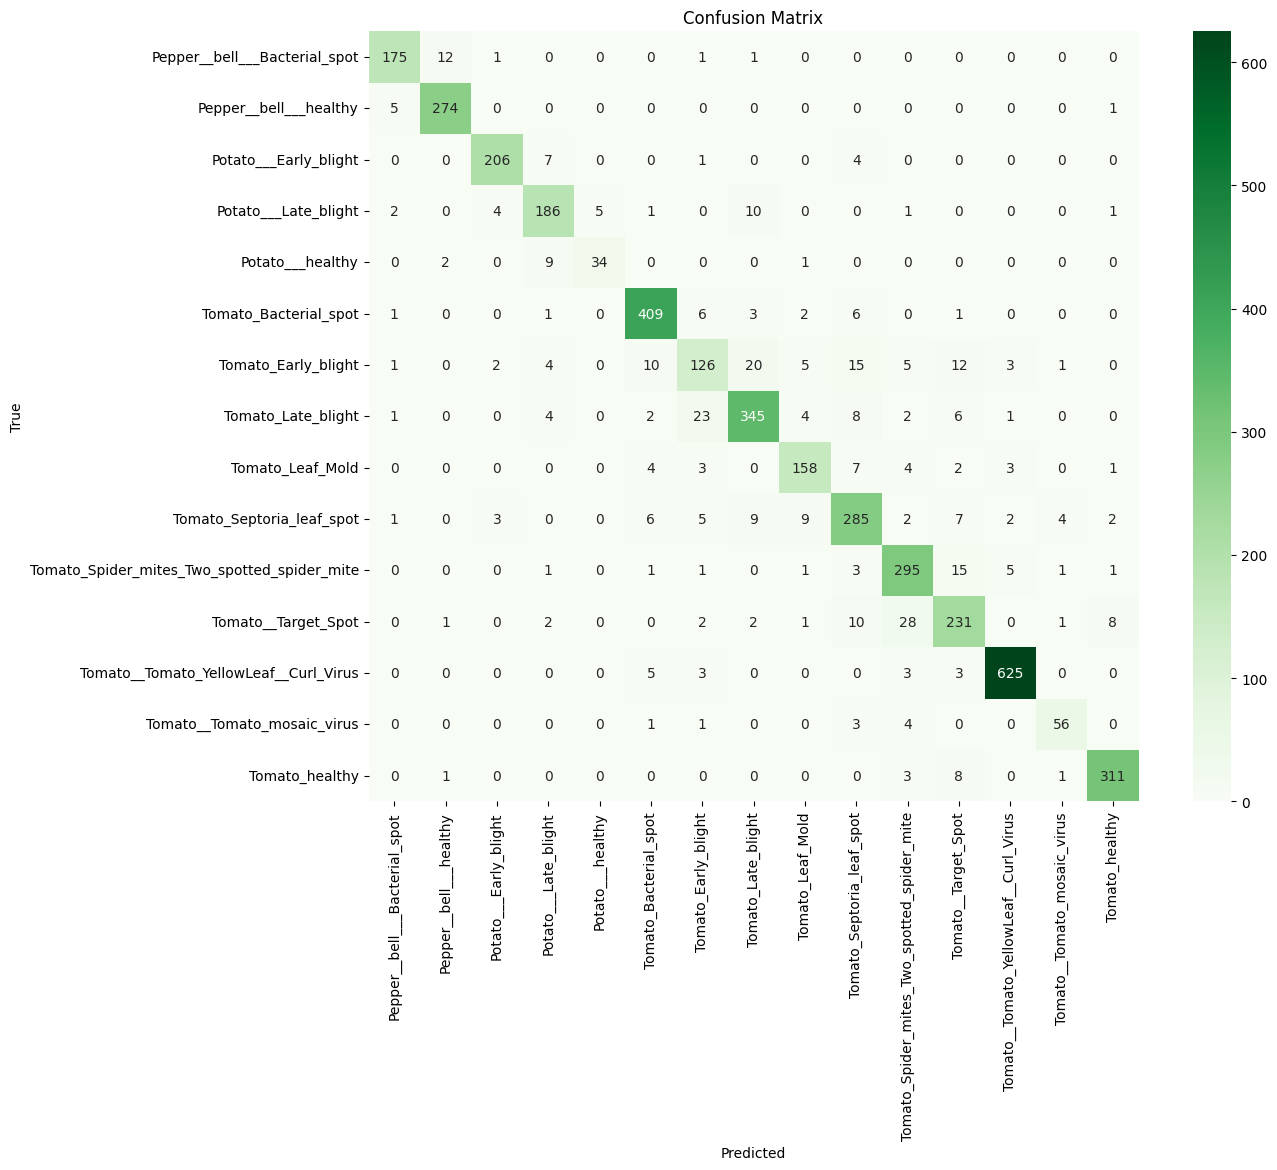

129/129 [==============================] - 8s 63ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.94      0.92      0.93       190
                     Pepper__bell___healthy       0.94      0.98      0.96       280
                      Potato___Early_blight       0.95      0.94      0.95       218
                       Potato___Late_blight       0.87      0.89      0.88       210
                           Potato___healthy       0.87      0.74      0.80        46
                      Tomato_Bacterial_spot       0.93      0.95      0.94       429
                        Tomato_Early_blight       0.73      0.62      0.67       204
                         Tomato_Late_blight       0.88      0.87      0.88       396
                           Tomato_Leaf_Mold       0.87      0.87      0.87       182
                  Tomato_Septoria_leaf_spot       0.84      0.85      0.84       335
Tomato_S

In [ ]:
model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/vgg16/6_11_23/VGG16_model_with(high_preprocess)50epoch.h5')
output_checking()

### vgg19

In [ ]:
from tensorflow.keras.applications import VGG19



# Load the VGG16 model with pre-trained weights
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in vgg_model.layers:
  layer.trainable = False




# # Preprocess the images to match VGG16 input requirements
# x_train_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_train])
# x_val_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_val])

# Preprocess labels
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_val)

# # Create a new model combining VGG19 and the classification layers
flat_layer = Flatten()(vgg_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flat_layer)
dropout_layer = Dropout(0.3)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)
# Create a new model combining VGG16 and the classification layers
model = Model(inputs=vgg_model.input, outputs=output_layer)
model.summary()

# Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/vgg19/6_11_23/VGG19_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=64),
    x_train,y_train_encoded,batch_size=80,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
207/207 [==============================] - ETA: 0s - loss: 8.7250 - accuracy: 0.6317
Epoch 1: val_loss improved from inf to 3.93319, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/vgg19/6_11_23/VGG19_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 49s 230ms/step - loss: 8.7250 - accuracy: 0.6317 - val_loss: 3.9332 - val_accuracy: 0.7885 - lr: 0.0010
Epoch 2/50
207/207 [==============================] - ETA: 0s - loss: 3.1505 - accuracy: 0.7862
Epoch 2: val_loss improved from 3.93319 to 2.49707, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/vgg19/6_11_23/VGG19_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 50s 243ms/step - loss: 3.1505 - accuracy: 0.7862 - val_loss: 2.4971 - val_accuracy: 0.8212 - lr: 0.0010
Epoch 3/50
207/207 [==============================] - ETA: 0s - loss: 2.0940 - accuracy: 0.8240
Epoch 3: val_loss improved from 2.49707 to 1.87410, saving m

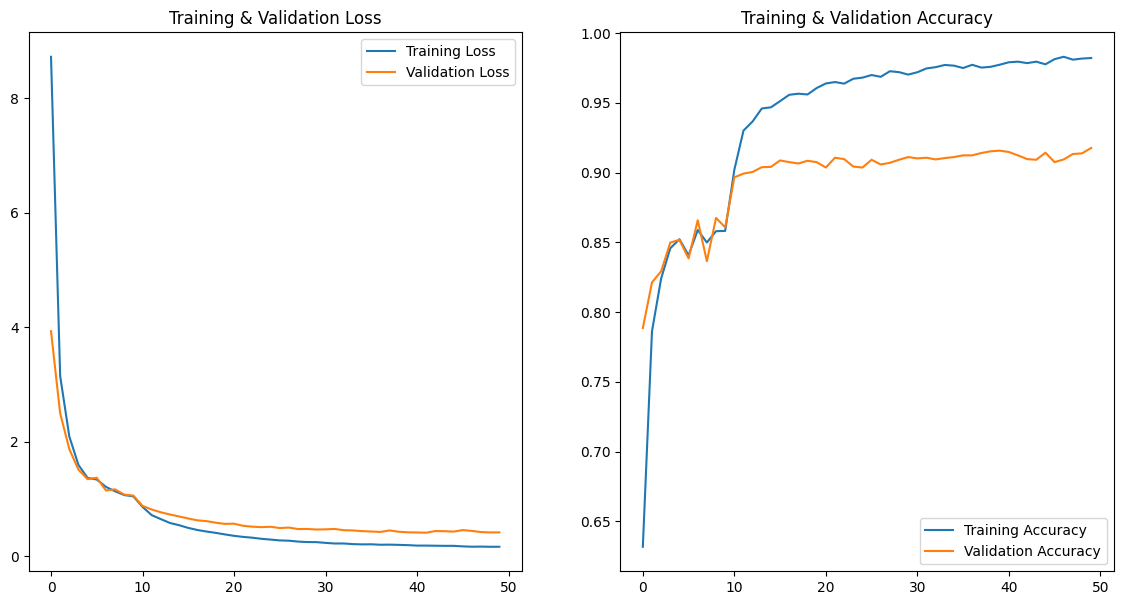

In [ ]:
curve()

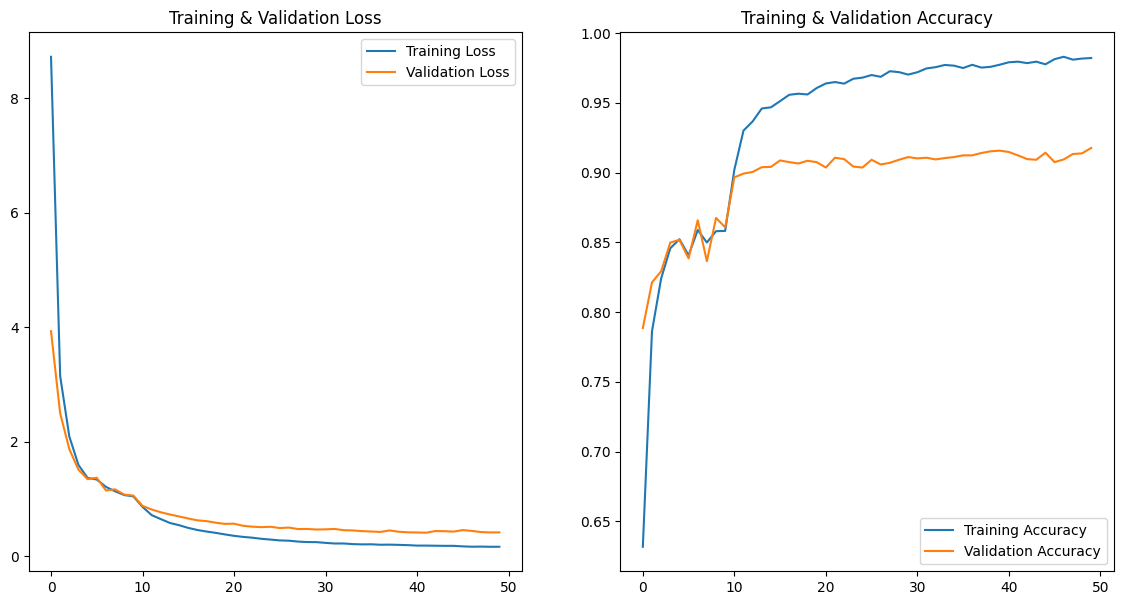

129/129 [==============================] - 10s 79ms/step
Accuracy: 0.9123062015503876
Precision: 0.904684212854088
Recall: 0.9026556863441197
F1 Score: 0.9026936357015963
129/129 [==============================] - 10s 80ms/step


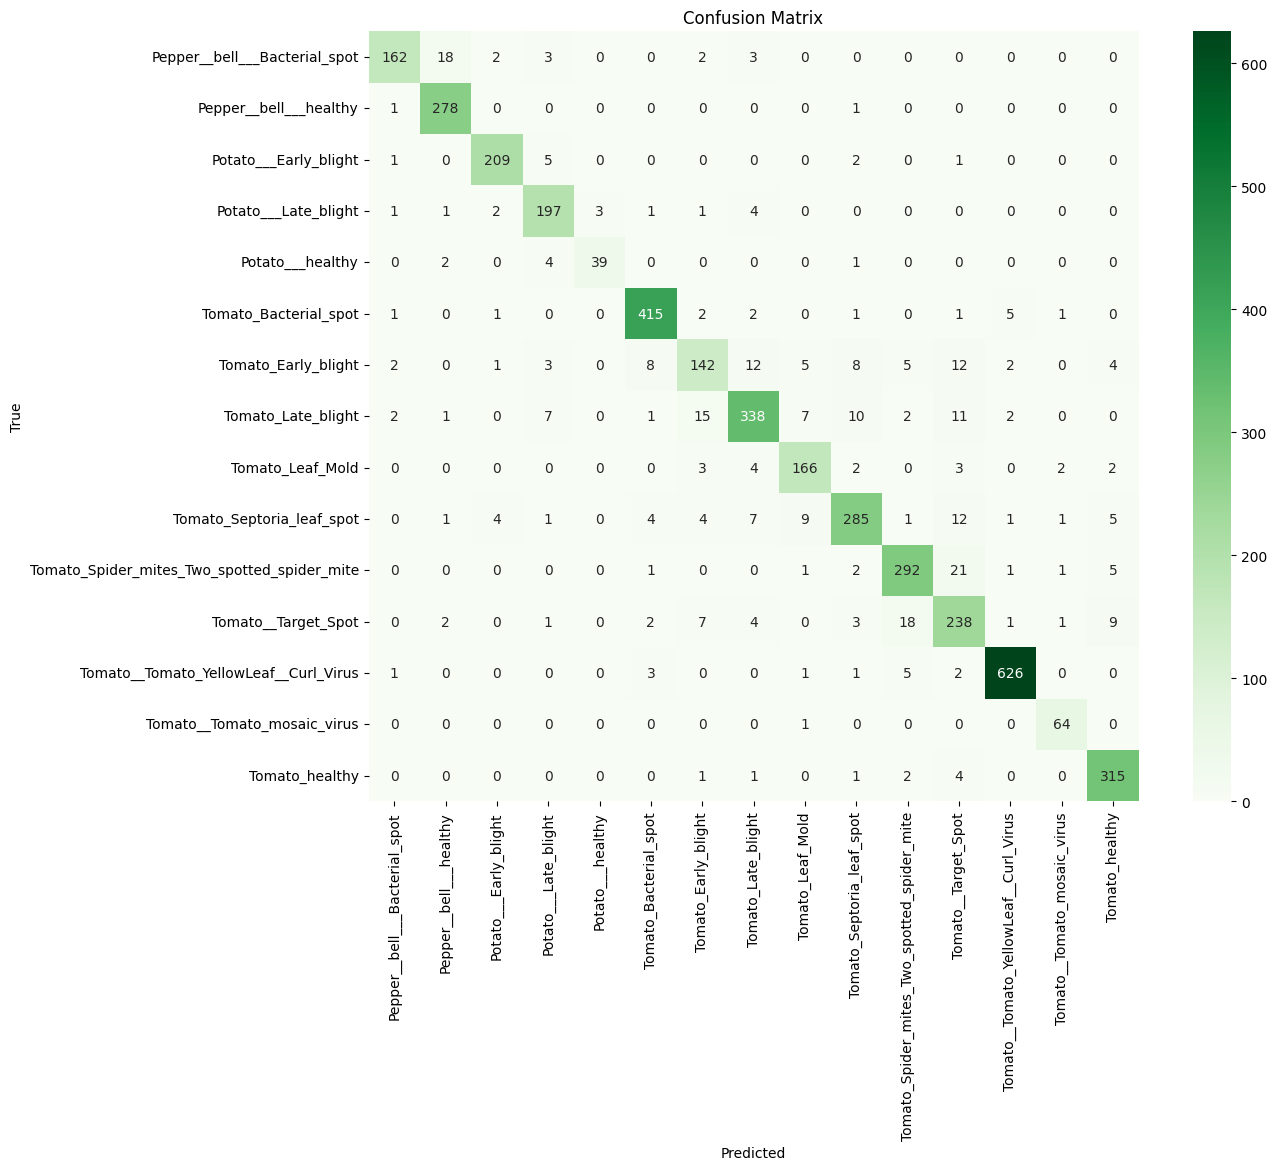

129/129 [==============================] - 10s 81ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.95      0.85      0.90       190
                     Pepper__bell___healthy       0.92      0.99      0.95       280
                      Potato___Early_blight       0.95      0.96      0.96       218
                       Potato___Late_blight       0.89      0.94      0.91       210
                           Potato___healthy       0.93      0.85      0.89        46
                      Tomato_Bacterial_spot       0.95      0.97      0.96       429
                        Tomato_Early_blight       0.80      0.70      0.75       204
                         Tomato_Late_blight       0.90      0.85      0.88       396
                           Tomato_Leaf_Mold       0.87      0.91      0.89       182
                  Tomato_Septoria_leaf_spot       0.90      0.85      0.87       335
Tomato_

In [ ]:
model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/vgg19/6_11_23/VGG19_model_with(high_preprocess)50epoch.h5')
output_checking()

### DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121  # Import DenseNet121
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the DenseNet121 model with pre-trained weights (include_top=False to exclude the final classification layers)
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the DenseNet121 model
flatten_layer = Flatten()(densenet_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both DenseNet121 and the custom layers
model = Model(inputs=densenet_model.input, outputs=output_layer)

# Display the model summary
model.summary()


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/DenseNet121/6_11_23/DensNet121_model_with(high_preprocess)51epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint,lr]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 3.2695 - accuracy: 0.7971
Epoch 1: val_loss improved from inf to 6.01581, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/DenseNet121/6_11_23/DensNet121_model_with(high_preprocess)51epoch.h5
258/258 [==============================] - 190s 409ms/step - loss: 3.2695 - accuracy: 0.7971 - val_loss: 6.0158 - val_accuracy: 0.3803 - lr: 0.0010
Epoch 2/50
258/258 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.9417
Epoch 2: val_loss improved from 6.01581 to 0.45159, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/DenseNet121/6_11_23/DensNet121_model_with(high_preprocess)51epoch.h5
258/258 [==============================] - 103s 400ms/step - loss: 0.4785 - accuracy: 0.9417 - val_loss: 0.4516 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 3/50
258/258 [==============================] - ETA: 0s - loss: 0.2244 - accuracy: 0.9612
Epoch 3: val_loss did not improve fr

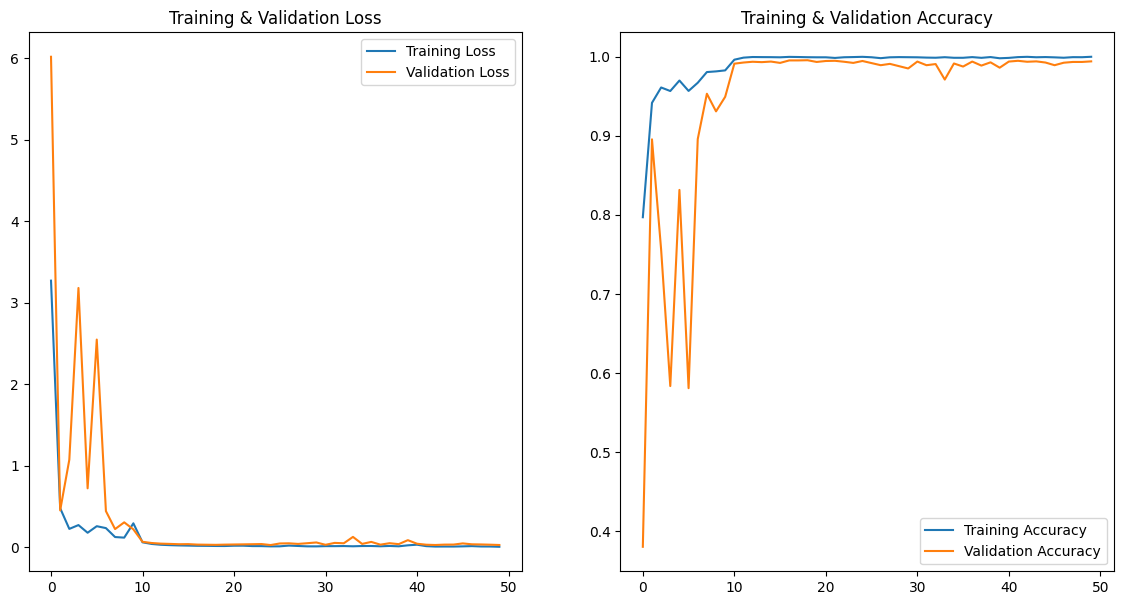

In [ ]:
curve()

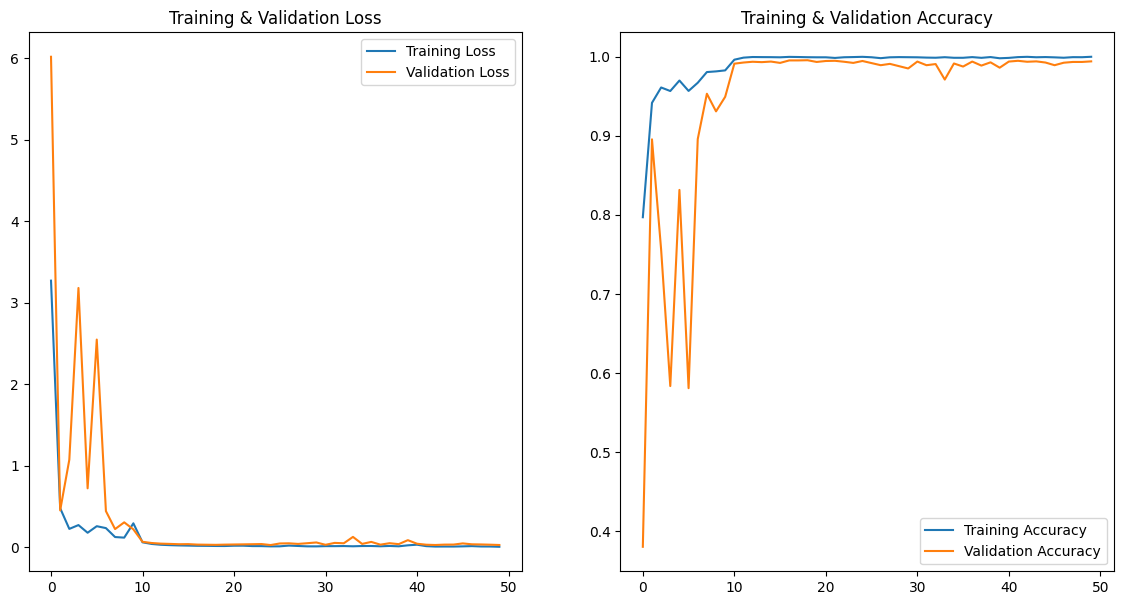

129/129 [==============================] - 10s 45ms/step
Accuracy: 0.9941860465116279
Precision: 0.9938093437107368
Recall: 0.9904309553599102
F1 Score: 0.9920377437977244
129/129 [==============================] - 6s 45ms/step


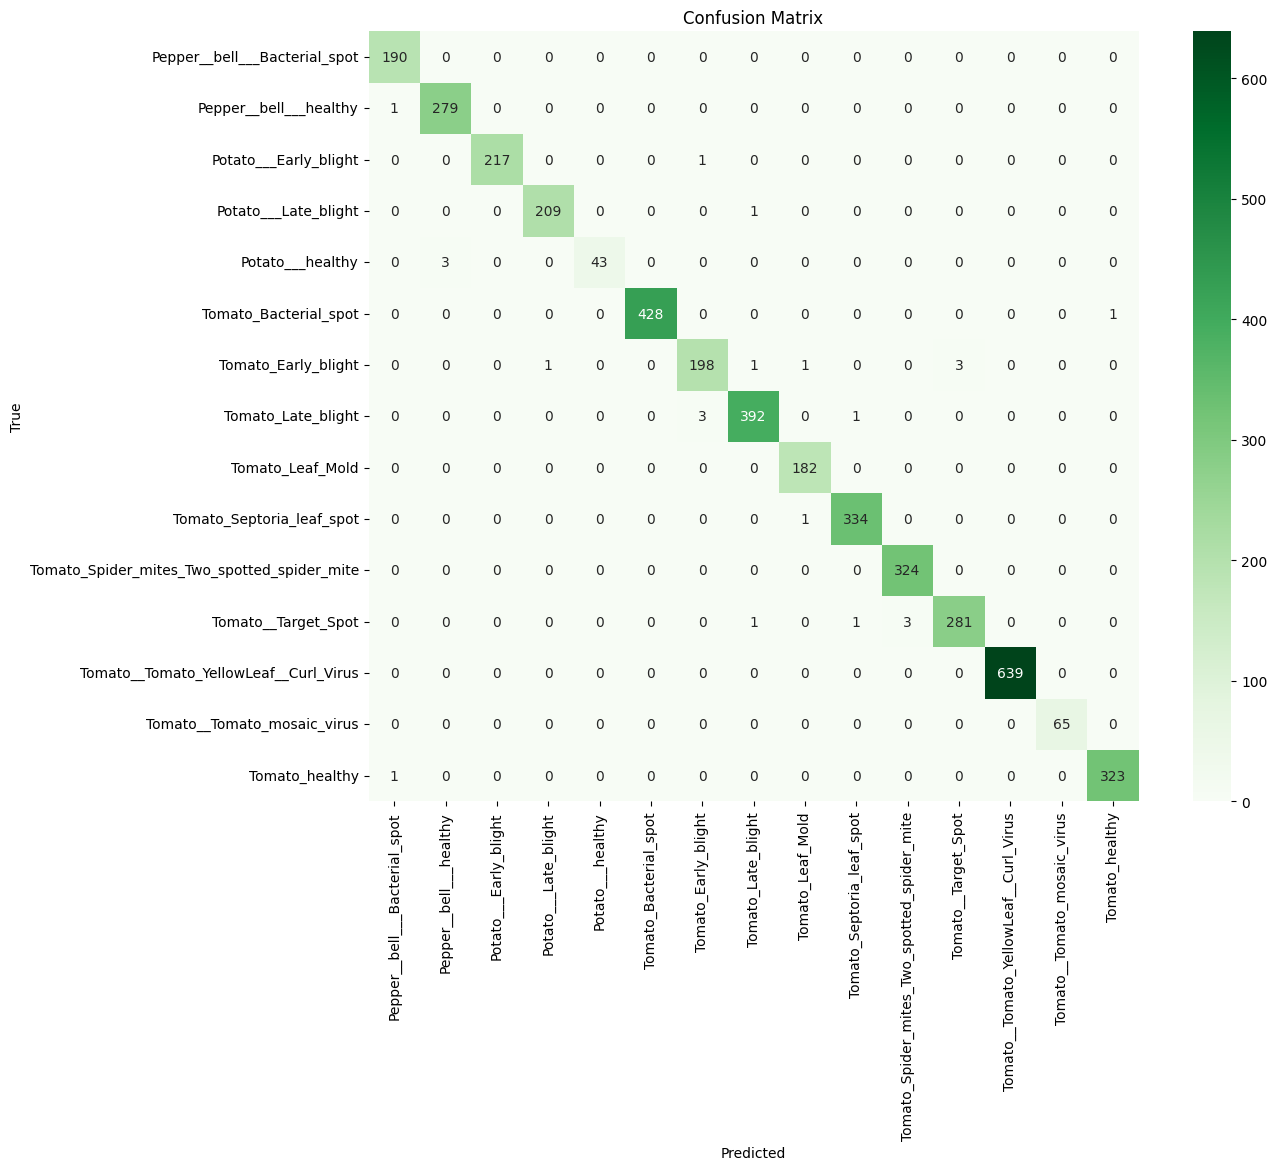

129/129 [==============================] - 6s 46ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      1.00      0.99       190
                     Pepper__bell___healthy       0.99      1.00      0.99       280
                      Potato___Early_blight       1.00      1.00      1.00       218
                       Potato___Late_blight       1.00      1.00      1.00       210
                           Potato___healthy       1.00      0.93      0.97        46
                      Tomato_Bacterial_spot       1.00      1.00      1.00       429
                        Tomato_Early_blight       0.98      0.97      0.98       204
                         Tomato_Late_blight       0.99      0.99      0.99       396
                           Tomato_Leaf_Mold       0.99      1.00      0.99       182
                  Tomato_Septoria_leaf_spot       0.99      1.00      1.00       335
Tomato_S

In [ ]:
output_checking()

### NasNetMobile

In [ ]:
from tensorflow.keras.applications import NASNetMobile  # Import NASNetMobile

# Load the NASNetMobile model with pre-trained weights (include_top=False to exclude the final classification layers)
nasnet_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the NASNetMobile model
flatten_layer = Flatten()(nasnet_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both NASNetMobile and the custom layers
model = Model(inputs=nasnet_model.input, outputs=output_layer)

# Display the model summary
model.summary()


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='multimodal.png')

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/NASNetMobile/7_11_23/NasNetMobile_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=80,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
207/207 [==============================] - ETA: 0s - loss: 7.6912 - accuracy: 0.7856
Epoch 1: val_loss improved from inf to 21.88210, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/NASNetMobile/7_11_23/NasNetMobile_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 224s 443ms/step - loss: 7.6912 - accuracy: 0.7856 - val_loss: 21.8821 - val_accuracy: 0.1618
Epoch 2/50
207/207 [==============================] - ETA: 0s - loss: 3.7757 - accuracy: 0.9632
Epoch 2: val_loss improved from 21.88210 to 7.43163, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/NASNetMobile/7_11_23/NasNetMobile_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 82s 397ms/step - loss: 3.7757 - accuracy: 0.9632 - val_loss: 7.4316 - val_accuracy: 0.1393
Epoch 3/50
207/207 [==============================] - ETA: 0s - loss: 2.1588 - accuracy: 0.9865
Epoch 3: val_loss improved from 7.43163 to 7.00467, sa

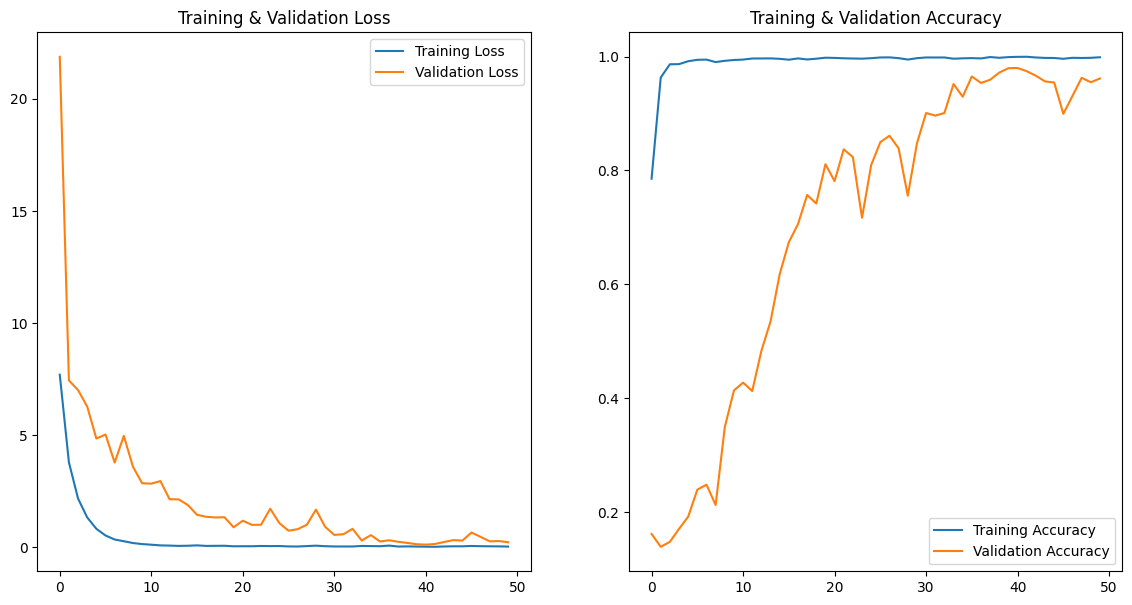

In [ ]:
curve()

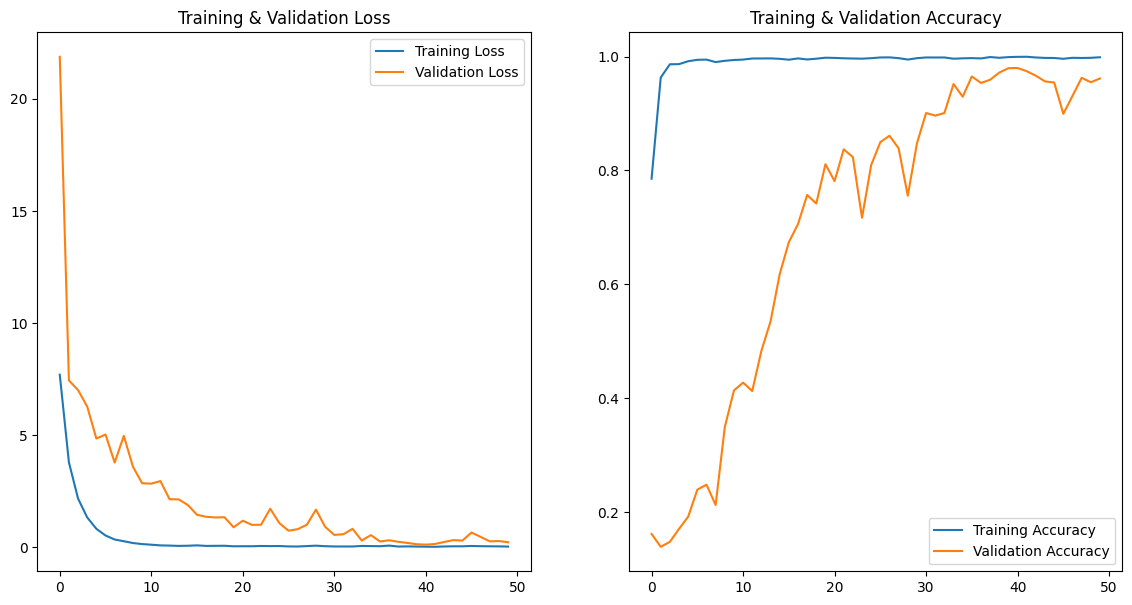

129/129 [==============================] - 10s 41ms/step
Accuracy: 0.9614825581395349
Precision: 0.9633469657591066
Recall: 0.9388954308414631
F1 Score: 0.9469557490863882


In [ ]:
output_checking()

129/129 [==============================] - 15s 32ms/step
Accuracy: 0.9798934108527132
Precision: 0.979820440737533
Recall: 0.9621463083379286
F1 Score: 0.969008417195496
129/129 [==============================] - 4s 32ms/step


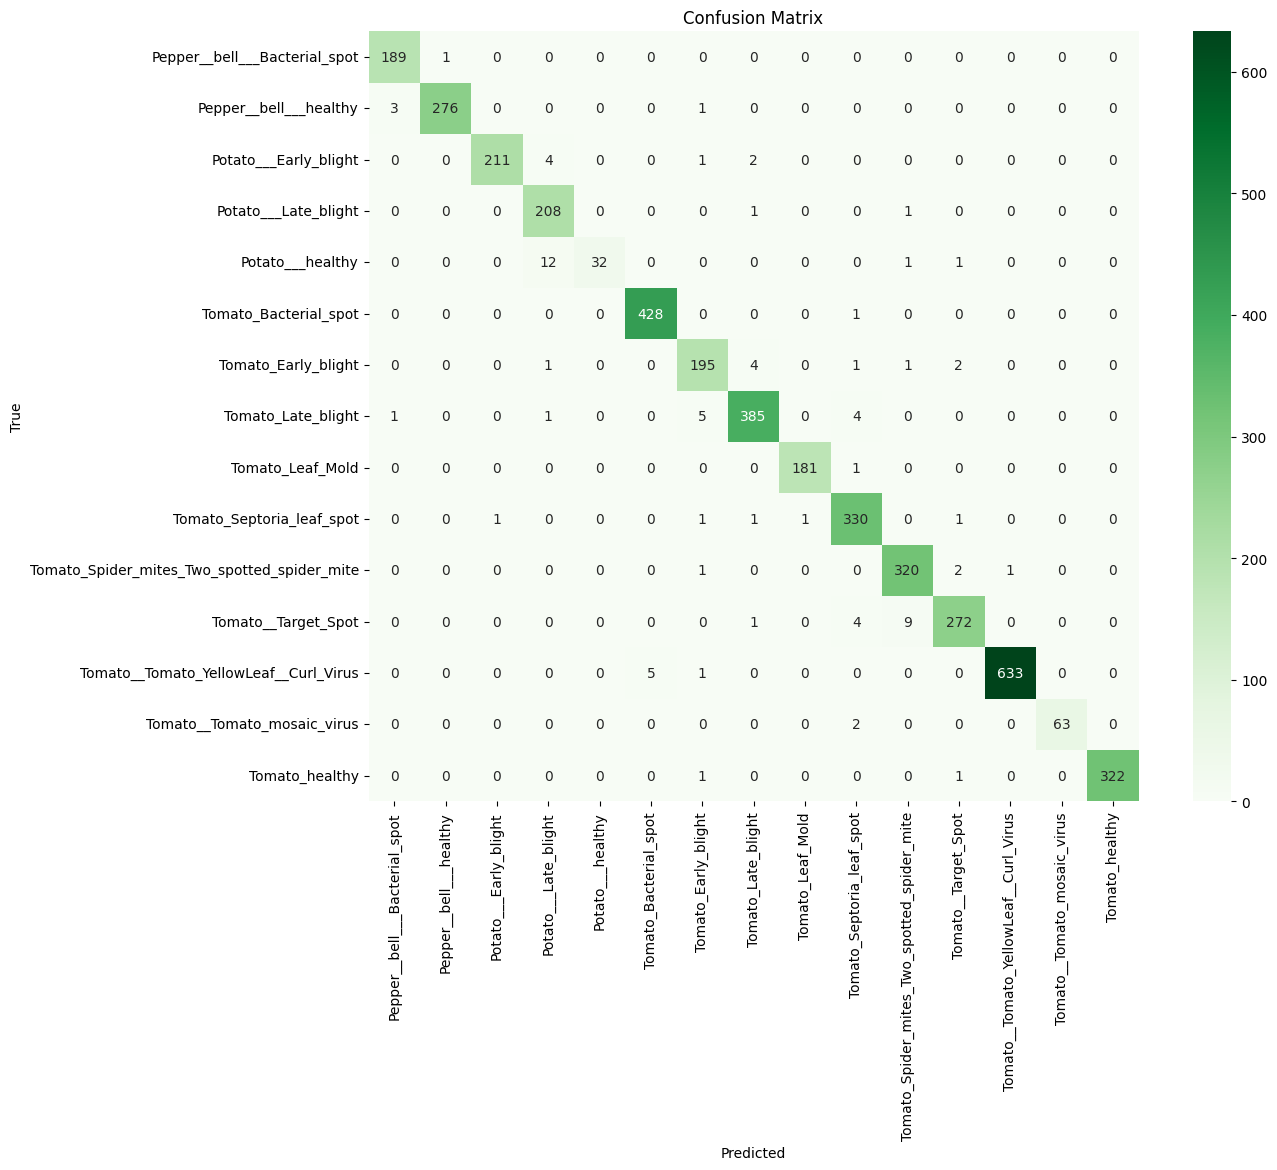

129/129 [==============================] - 5s 39ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.98      0.99      0.99       190
                     Pepper__bell___healthy       1.00      0.99      0.99       280
                      Potato___Early_blight       1.00      0.97      0.98       218
                       Potato___Late_blight       0.92      0.99      0.95       210
                           Potato___healthy       1.00      0.70      0.82        46
                      Tomato_Bacterial_spot       0.99      1.00      0.99       429
                        Tomato_Early_blight       0.95      0.96      0.95       204
                         Tomato_Late_blight       0.98      0.97      0.97       396
                           Tomato_Leaf_Mold       0.99      0.99      0.99       182
                  Tomato_Septoria_leaf_spot       0.96      0.99      0.97       335
Tomato_S

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)
model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/NASNetMobile/7_11_23/NasNetMobile_model_with(high_preprocess)50epoch.h5')
performance_measure()
confusion_matrices()
classification_report_custom()

### EfficientNetB1

In [ ]:
!pip install efficientnet

In [ ]:
from efficientnet.tfkeras import EfficientNetB1  # Import EfficientNetB1 from efficientnet package
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the EfficientNetB1 model with pre-trained weights (include_top=False to exclude the final classification layers)
efficientnet_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top of the EfficientNetB1 model
flatten_layer = Flatten()(efficientnet_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer='l2')(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create a new model that includes both EfficientNetB1 and the custom layers
model = Model(inputs=efficientnet_model.input, outputs=output_layer)

# Display the model summary
model.summary()


27164032/27164032 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 75, 75, 32)           864       ['input_2[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 75, 75, 32)           128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/EfficientNetB1/7_11_23/EfficientNetB1_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=80,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=30,
    callbacks=[callbacks_instance]
)

Epoch 1/30
207/207 [==============================] - ETA: 0s - loss: 8.9201 - accuracy: 0.8260
Epoch 1: val_loss improved from inf to 6.76832, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/EfficientNetB1/7_11_23/EfficientNetB1_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 156s 494ms/step - loss: 8.9201 - accuracy: 0.8260 - val_loss: 6.7683 - val_accuracy: 0.9310
Epoch 2/30
207/207 [==============================] - ETA: 0s - loss: 5.1375 - accuracy: 0.9693
Epoch 2: val_loss improved from 6.76832 to 3.83738, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/EfficientNetB1/7_11_23/EfficientNetB1_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 92s 444ms/step - loss: 5.1375 - accuracy: 0.9693 - val_loss: 3.8374 - val_accuracy: 0.9639
Epoch 3/30
207/207 [==============================] - ETA: 0s - loss: 2.8601 - accuracy: 0.9822
Epoch 3: val_loss improved from 3.83738 to 2.1313

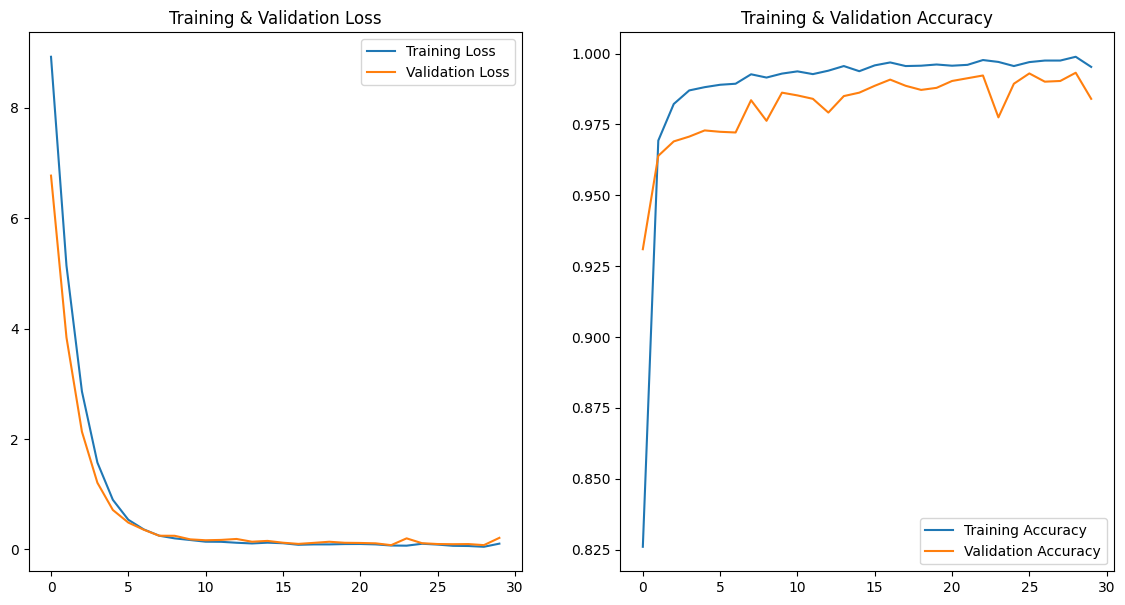

In [ ]:
curve()

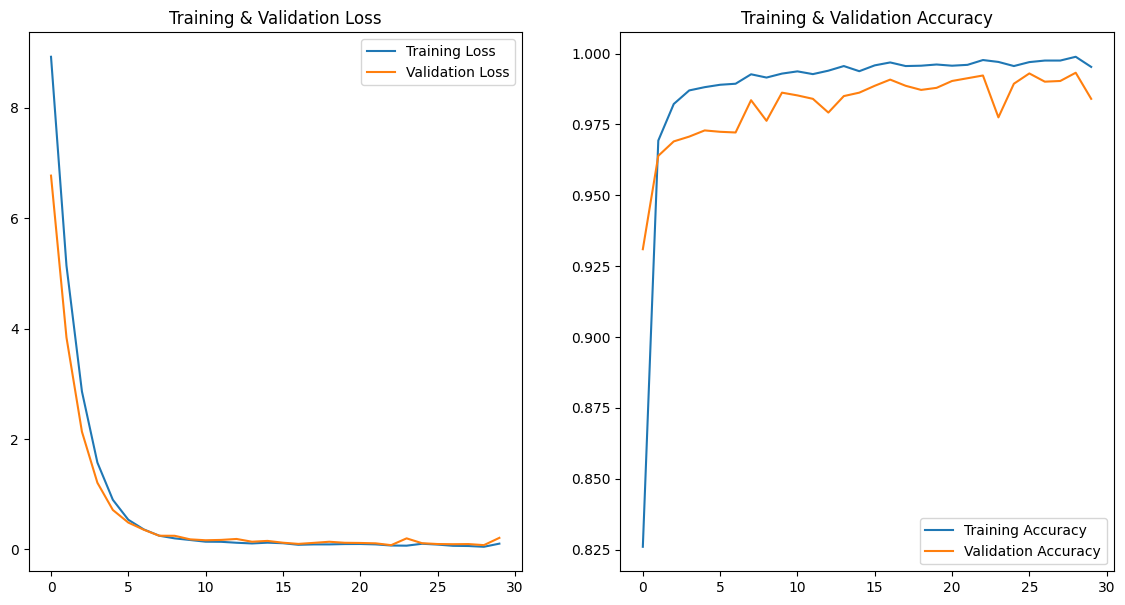

129/129 [==============================] - 8s 37ms/step
Accuracy: 0.9840116279069767
Precision: 0.9835229406790997
Recall: 0.9784451487541922
F1 Score: 0.9804672893554468
129/129 [==============================] - 5s 38ms/step


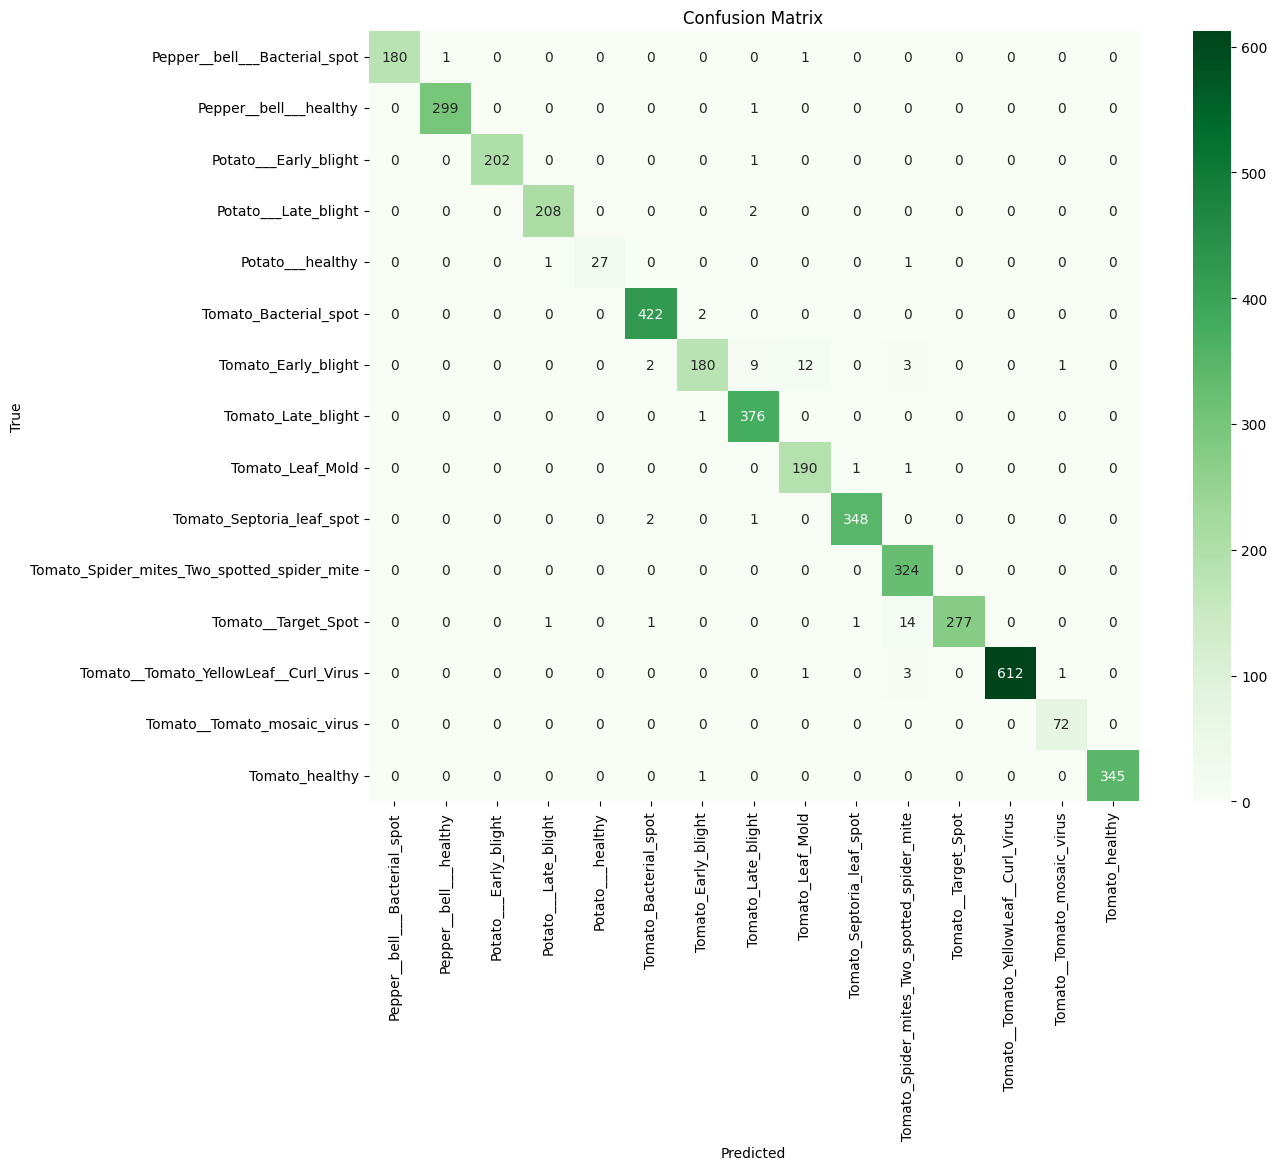

129/129 [==============================] - 5s 37ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.99      0.99       182
                     Pepper__bell___healthy       1.00      1.00      1.00       300
                      Potato___Early_blight       1.00      1.00      1.00       203
                       Potato___Late_blight       0.99      0.99      0.99       210
                           Potato___healthy       1.00      0.93      0.96        29
                      Tomato_Bacterial_spot       0.99      1.00      0.99       424
                        Tomato_Early_blight       0.98      0.87      0.92       207
                         Tomato_Late_blight       0.96      1.00      0.98       377
                           Tomato_Leaf_Mold       0.93      0.99      0.96       192
                  Tomato_Septoria_leaf_spot       0.99      0.99      0.99       351
Tomato_S

In [ ]:
output_checking()

129/129 [==============================] - 5s 38ms/step


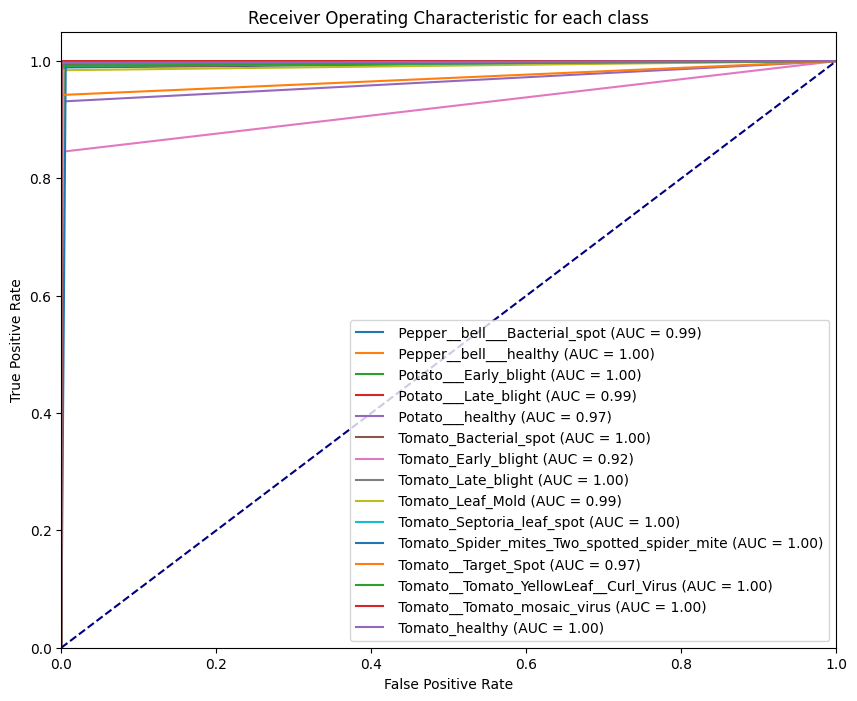

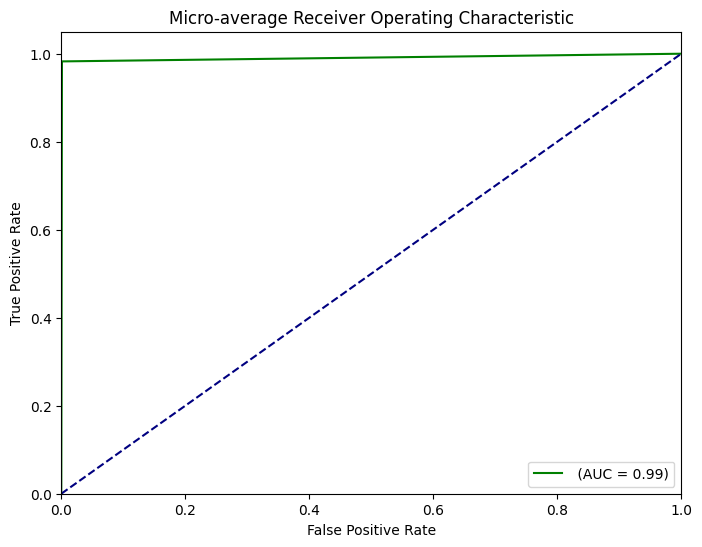

AUC =  0.9907426633444075


In [ ]:
Roc_curve()

### Hybrid(inception+densenet121)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3, DenseNet121

# Create base models
inception_model = InceptionV3(weights='imagenet', include_top=False)
densenet_model = DenseNet121(weights='imagenet', include_top=False)

# # Freeze the layers of the base models
# for layer in inception_model.layers:
#     layer.trainable = False
for layer in densenet_model.layers:
    layer.trainable = False

# Create input layer
input_layer = Input(shape=(150, 150, 3))

# Get the output of each base model
inception_output = inception_model(input_layer)
densenet_output = densenet_model(input_layer)

# Add Global Average Pooling layers to reduce spatial dimensions
inception_output = GlobalAveragePooling2D()(inception_output)
densenet_output = GlobalAveragePooling2D()(densenet_output)

# Concatenate the outputs of the two base models
merged_output = Concatenate()([inception_output, densenet_output])

# Add additional layers for classification (customize this part as needed)
x = Dense(256, activation='relu')(merged_output)
output_layer = Dense(15, activation='softmax')(x)  # num_classes is the number of classes in your classification task

# Create the hybrid model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (customize the optimizer, loss, and metrics as needed)
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
hybrid_model.summary()
model=hybrid_model

29084464/29084464 [==============================] - 2s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 inception_v3 (Functional)   (None, None, None, 2048)     2180278   ['input_4[0][0]']             
                                                          4                                       
                                                                                                  
 densenet121 (Functional)    (None, None, None, 1024)     7037504   ['input_4[0][0]']             
                                                                                                  
 global_average_pooling2d (

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(InceptionV3+DenseNet121)/7_11_23/Hybrid(InceptionV3+DenseNet121)_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=80,
    # validation_data=(x_test, y_train_encoded),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=35,
    callbacks=[callbacks_instance]
)

Epoch 1/35
207/207 [==============================] - ETA: 0s - loss: 1.1019 - accuracy: 0.7369
Epoch 1: val_loss improved from inf to 0.34215, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(InceptionV3+DenseNet121)/7_11_23/Hybrid(InceptionV3+DenseNet121)_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 148s 452ms/step - loss: 1.1019 - accuracy: 0.7369 - val_loss: 0.3421 - val_accuracy: 0.8975
Epoch 2/35
207/207 [==============================] - ETA: 0s - loss: 0.1093 - accuracy: 0.9664
Epoch 2: val_loss improved from 0.34215 to 0.16111, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(InceptionV3+DenseNet121)/7_11_23/Hybrid(InceptionV3+DenseNet121)_model_with(high_preprocess)50epoch.h5
207/207 [==============================] - 84s 404ms/step - loss: 0.1093 - accuracy: 0.9664 - val_loss: 0.1611 - val_accuracy: 0.9540
Epoch 3/35
207/207 [==============================] - ETA: 0s - loss: 0.0348 

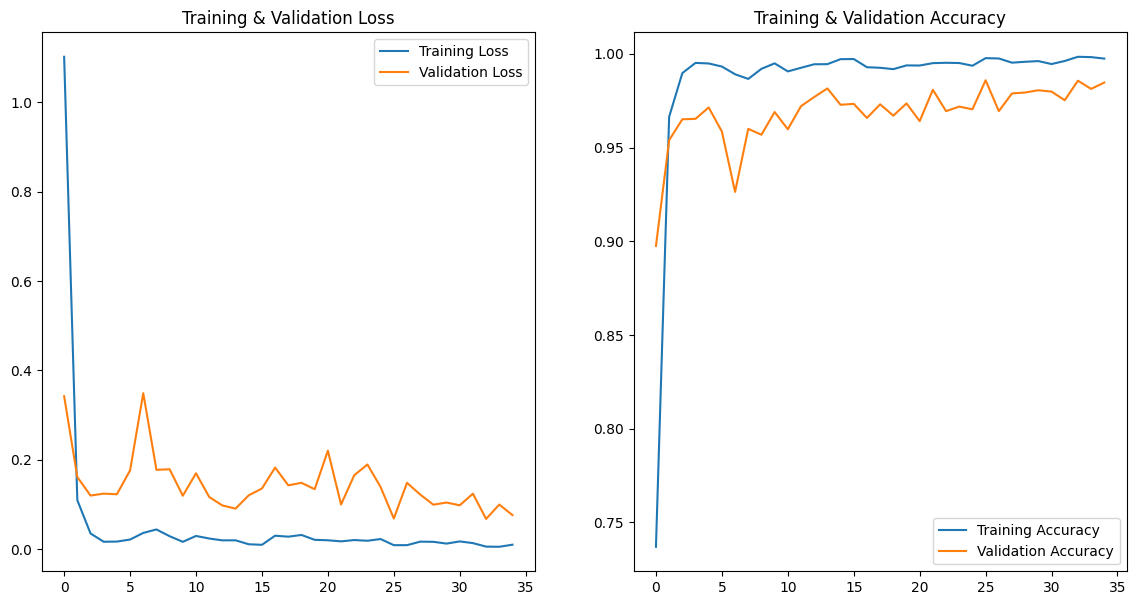

In [ ]:
curve()

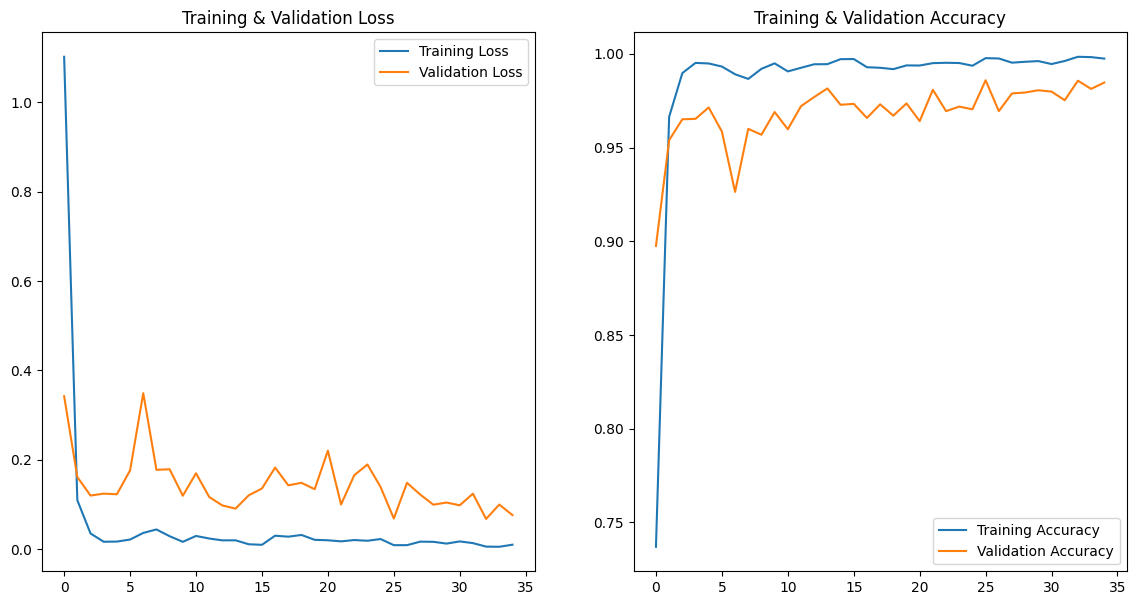

129/129 [==============================] - 17s 70ms/step
Accuracy: 0.9847383720930233
Precision: 0.983540196246652
Recall: 0.982434551545533
F1 Score: 0.9829398594710175
129/129 [==============================] - 9s 69ms/step


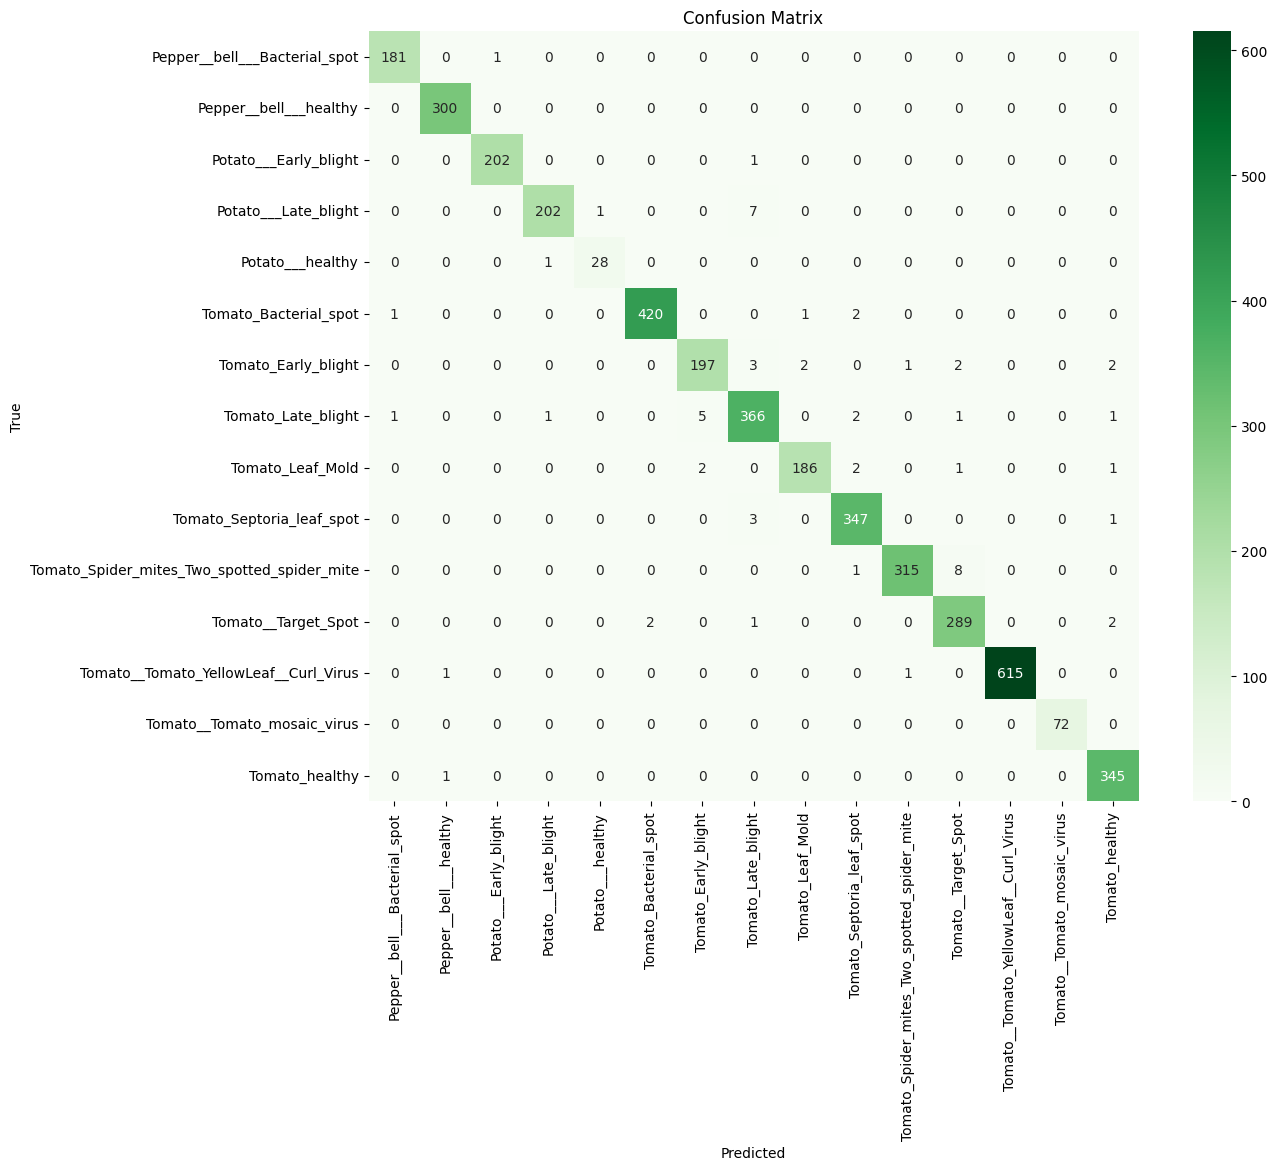

129/129 [==============================] - 9s 70ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.99      0.99       182
                     Pepper__bell___healthy       0.99      1.00      1.00       300
                      Potato___Early_blight       1.00      1.00      1.00       203
                       Potato___Late_blight       0.99      0.96      0.98       210
                           Potato___healthy       0.97      0.97      0.97        29
                      Tomato_Bacterial_spot       1.00      0.99      0.99       424
                        Tomato_Early_blight       0.97      0.95      0.96       207
                         Tomato_Late_blight       0.96      0.97      0.97       377
                           Tomato_Leaf_Mold       0.98      0.97      0.98       192
                  Tomato_Septoria_leaf_spot       0.98      0.99      0.98       351
Tomato_S

In [ ]:
# model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(InceptionV3+DenseNet121)/7_11_23/Hybrid(InceptionV3+DenseNet121)_model_with(high_preprocess)50epoch.h5')
output_checking()

129/129 [==============================] - 9s 70ms/step


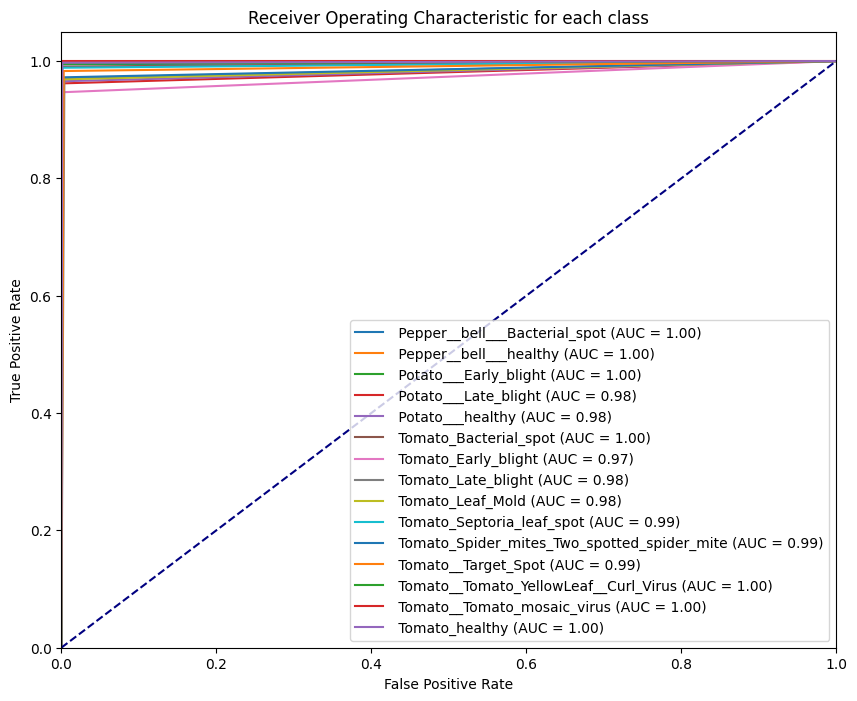

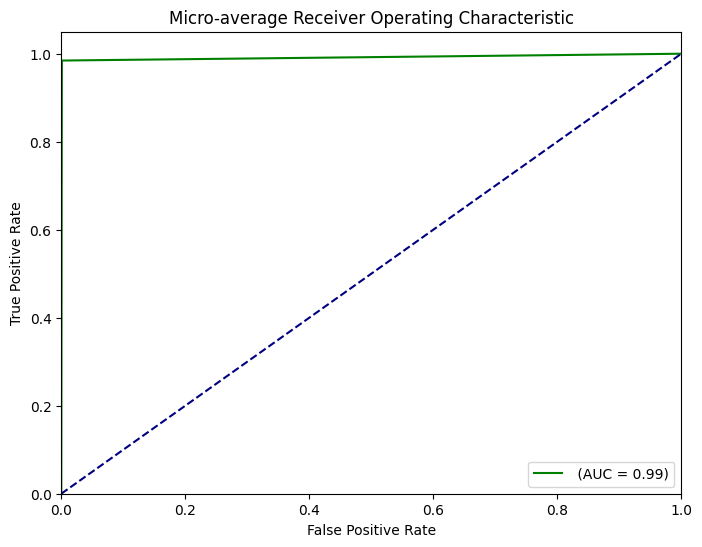

AUC =  0.9917635658914729


In [ ]:



Roc_curve()

### HYbrid(vgg16+vgg19)

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a common input size
input_size = (150, 150, 3)

# Load the pretrained VGG16 and VGG19 models
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=input_size)
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=input_size)

# Freeze the layers of both VGG16 and VGG19 models
for layer in vgg16_model.layers:
    layer.trainable = False
for layer in vgg19_model.layers:
    layer.trainable = False

# # Define a function to preprocess input images to the common size
# def preprocess_image(image_path):
#     img = load_img(image_path, target_size=input_size[:2])
#     img_array = img_to_array(img)
#     img_array = img_array / 255.0  # Normalize the image
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
#     return img_array

# Create an input layer for the ensemble model
input_layer = Input(shape=input_size)

# Extract features from both VGG16 and VGG19 models
vgg16_features = vgg16_model(input_layer)
vgg19_features = vgg19_model(input_layer)

# Flatten the features
vgg16_flat = Flatten()(vgg16_features)
vgg19_flat = Flatten()(vgg19_features)

# Concatenate the flattened features
merged_features = Concatenate()([vgg16_flat, vgg19_flat])

# Add custom classification layers on top of the concatenated features
dense_layer1 = Dense(512, activation='relu')(merged_features)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create the hybrid model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the hybrid model with an appropriate optimizer, loss, and metrics
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
hybrid_model.summary()


80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 4, 4, 512)            1471468   ['input_3[0][0]']             
                                                          8                                       
                                                                                                  
 vgg19 (Functional)          (None, 4, 4, 512)            2002438   ['input_3[0][0]']             
                                                          4                                       
                             

In [ ]:
model = hybrid_model
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        '/content/drive/MyDrive/Deep learning model(Base_paper)/ Hybrid(VGG16+VGG19)/7_11_23/ Hybrid(VGG16+VGG19)_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=32,
    # x_train,y_train,batch_size=32,
    # validation_data=(x_test, y_test),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=50,
    callbacks=[callbacks_instance]
)

Epoch 1/50
516/516 [==============================] - ETA: 0s - loss: 2.8696 - accuracy: 0.7139
Epoch 1: val_loss improved from inf to 0.71312, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/ Hybrid(VGG16+VGG19)/7_11_23/ Hybrid(VGG16+VGG19)_model_with(high_preprocess)50epoch.h5
516/516 [==============================] - 117s 200ms/step - loss: 2.8696 - accuracy: 0.7139 - val_loss: 0.7131 - val_accuracy: 0.8198
Epoch 2/50
516/516 [==============================] - ETA: 0s - loss: 0.4099 - accuracy: 0.8882
Epoch 2: val_loss did not improve from 0.71312
516/516 [==============================] - 101s 196ms/step - loss: 0.4099 - accuracy: 0.8882 - val_loss: 0.7194 - val_accuracy: 0.8590
Epoch 3/50
516/516 [==============================] - ETA: 0s - loss: 0.2170 - accuracy: 0.9388
Epoch 3: val_loss improved from 0.71312 to 0.64703, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/ Hybrid(VGG16+VGG19)/7_11_23/ Hybrid(VGG16+VGG19)_model_with(high

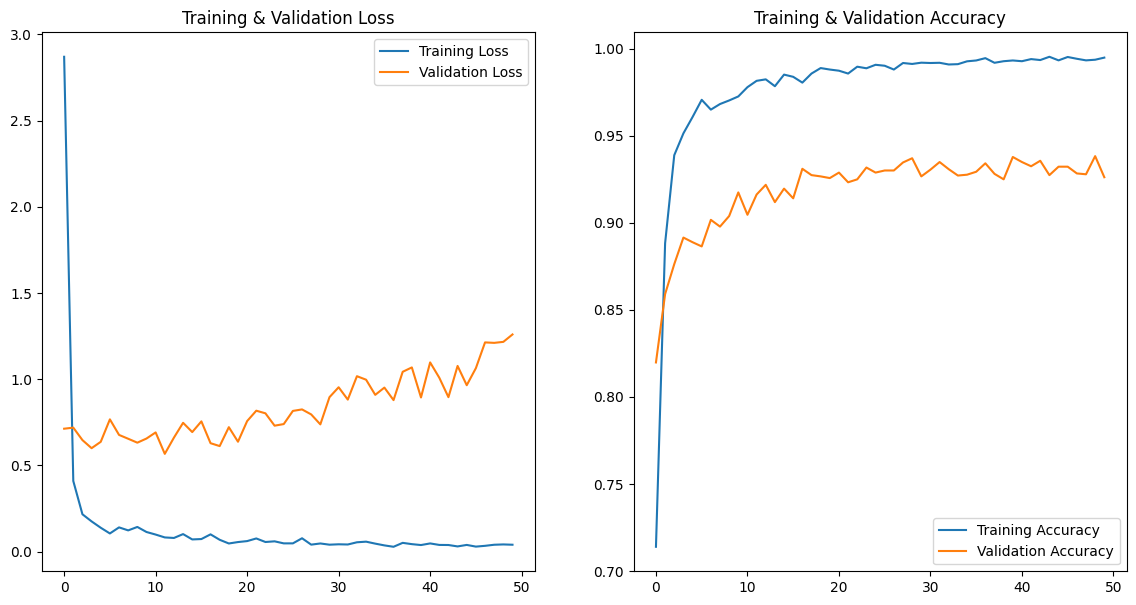

In [ ]:
curve()

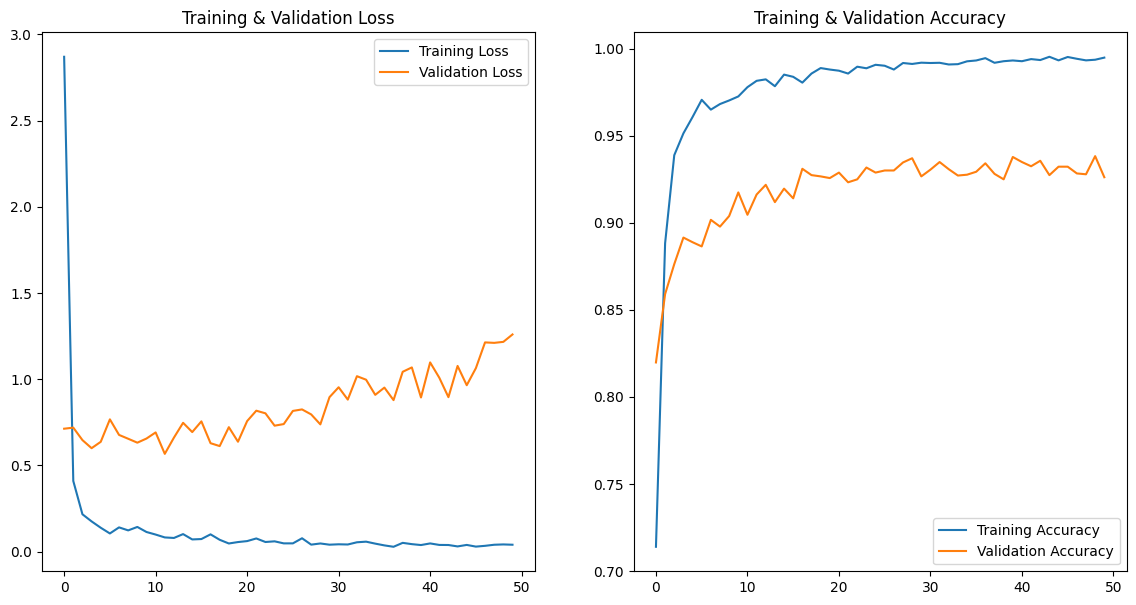

129/129 [==============================] - 20s 154ms/step
Accuracy: 0.9261143410852714
Precision: 0.9220840449507359
Recall: 0.911599041194908
F1 Score: 0.9140340942787035
129/129 [==============================] - 21s 161ms/step


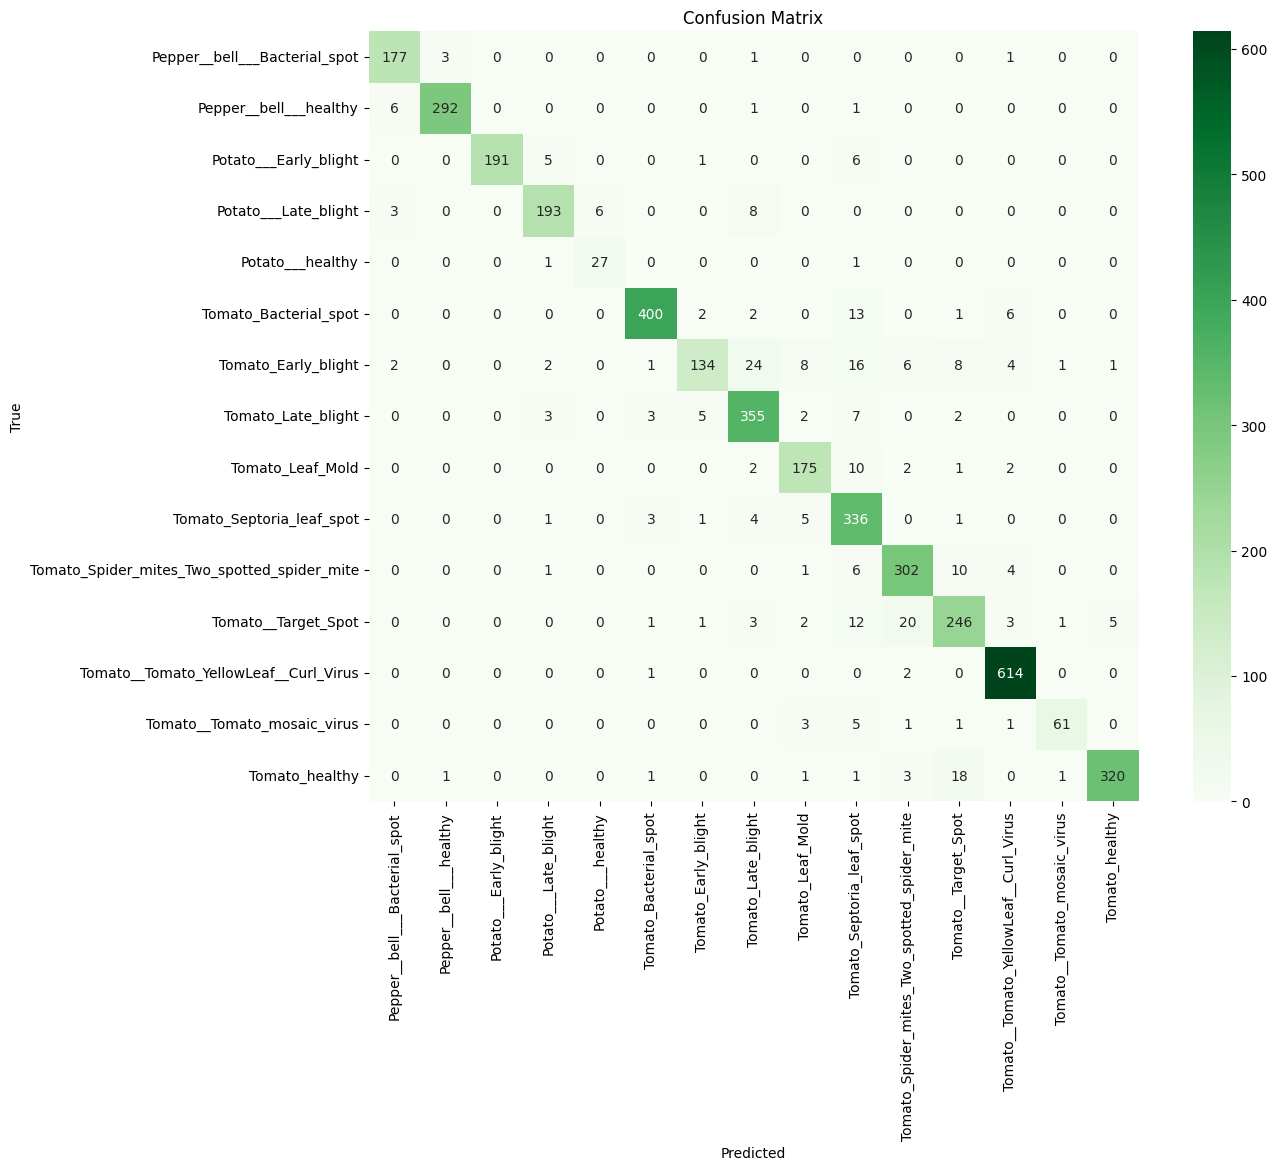

129/129 [==============================] - 19s 151ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.94      0.97      0.96       182
                     Pepper__bell___healthy       0.99      0.97      0.98       300
                      Potato___Early_blight       1.00      0.94      0.97       203
                       Potato___Late_blight       0.94      0.92      0.93       210
                           Potato___healthy       0.82      0.93      0.87        29
                      Tomato_Bacterial_spot       0.98      0.94      0.96       424
                        Tomato_Early_blight       0.93      0.65      0.76       207
                         Tomato_Late_blight       0.89      0.94      0.91       377
                           Tomato_Leaf_Mold       0.89      0.91      0.90       192
                  Tomato_Septoria_leaf_spot       0.81      0.96      0.88       351
Tomato

In [ ]:
# model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/ Hybrid(VGG16+VGG19)/7_11_23/ Hybrid(VGG16+VGG19)_model_with(high_preprocess)50epoch.h5')
output_checking()

129/129 [==============================] - 21s 161ms/step


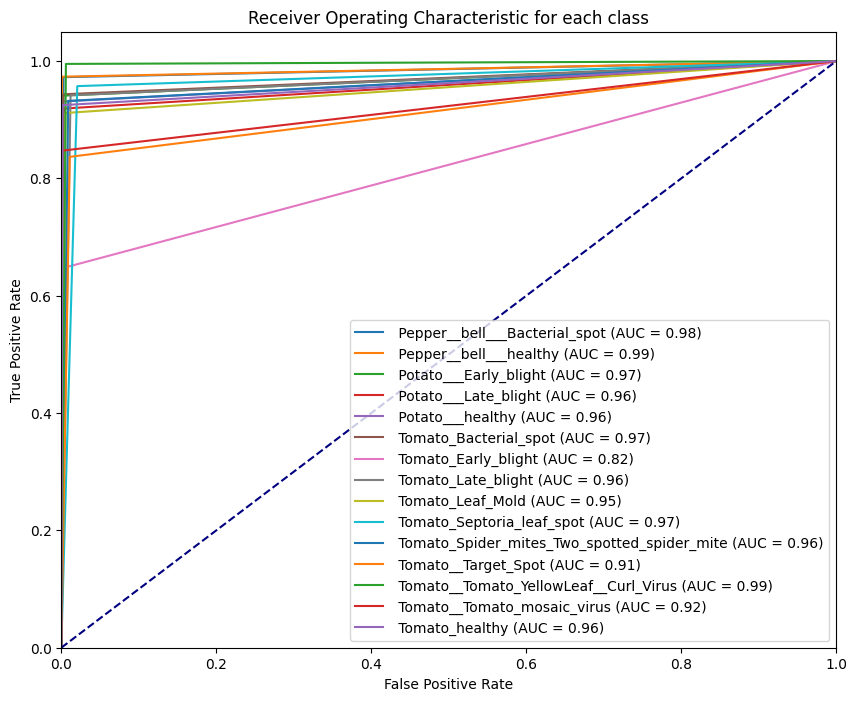

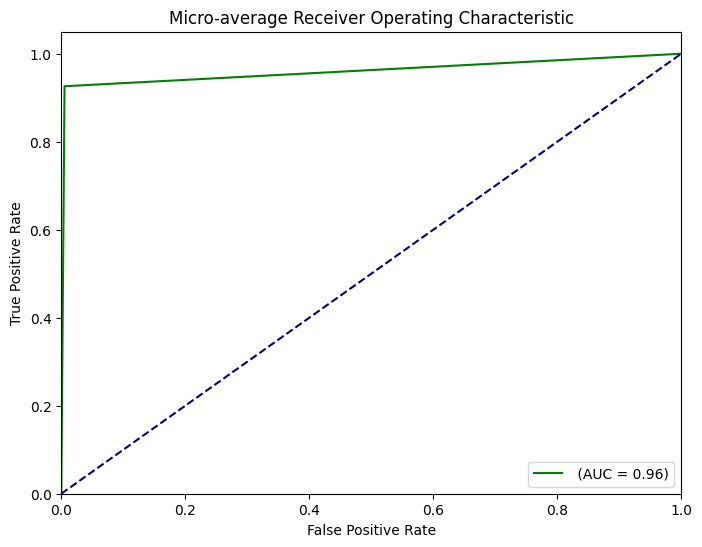

AUC =  0.9604270487264672


In [ ]:
Roc_curve()

### HYbrid with 5 model

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121, MobileNet
from tensorflow.keras.preprocessing.image import load_img, img_to_array


input_size = (150, 150, 3)


vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=input_size)
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=input_size)
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_size)
densenet121_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_size)
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_size)

# Freeze the layers of all models
for model in [vgg16_model, vgg19_model, resnet50_model, densenet121_model, mobilenet_model]:
    for layer in model.layers:
        layer.trainable = False

# Create an input layer for the ensemble model
input_layer = Input(shape=input_size)

# Extract features from all models
vgg16_features = vgg16_model(input_layer)
vgg19_features = vgg19_model(input_layer)
resnet50_features = resnet50_model(input_layer)
densenet121_features = densenet121_model(input_layer)
mobilenet_features = mobilenet_model(input_layer)

# Flatten the features
vgg16_flat = Flatten()(vgg16_features)
vgg19_flat = Flatten()(vgg19_features)
resnet50_flat = Flatten()(resnet50_features)
densenet121_flat = Flatten()(densenet121_features)
mobilenet_flat = Flatten()(mobilenet_features)

# Concatenate the flattened features
merged_features = Concatenate()([vgg16_flat, vgg19_flat, resnet50_flat, densenet121_flat, mobilenet_flat])

# Add custom classification layers on top of the concatenated features
dense_layer1 = Dense(512, activation='relu')(merged_features)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(15, activation='softmax')(dropout_layer)

# Create the hybrid model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the hybrid model with an appropriate optimizer, loss, and metrics
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
hybrid_model.summary()


29084464/29084464 [==============================] - 0s 0us/step


17225924/17225924 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 4, 4, 512)            1471468   ['input_9[0][0]']             
                                                          8                                       
                                                                                                  
 vgg19 (Functional)          (None, 4, 4, 512)            2002438   ['input_9[0][0]']             
                                                          4                                       
                           

In [ ]:
model = hybrid_model
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        '/content/drive/MyDrive/Deep learning model(Base_paper)/hybrid(VGG16+VGG19+ResNet50+DenseNet121+MobileNet)/7_11_23/hybrid(VGG16+VGG19+ResNet50+DenseNet121+MobileNet)_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    # datagen.flow(x_train, y_train_encoded, batch_size=128),
    x_train,y_train_encoded,batch_size=64,
    # x_train,y_train,batch_size=32,
    # validation_data=(x_test, y_test),
    # validation_split =  0.1,
    validation_data=(x_test, y_test_encoded),
    epochs=30,
    callbacks=[callbacks_instance]
)

Epoch 1/30
258/258 [==============================] - ETA: 0s - loss: 1.8123 - accuracy: 0.7740
Epoch 1: val_loss improved from inf to 0.30234, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/hybrid(VGG16+VGG19+ResNet50+DenseNet121+MobileNet)/7_11_23/hybrid(VGG16+VGG19+ResNet50+DenseNet121+MobileNet)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 235s 773ms/step - loss: 1.8123 - accuracy: 0.7740 - val_loss: 0.3023 - val_accuracy: 0.9024
Epoch 2/30
258/258 [==============================] - ETA: 0s - loss: 0.2734 - accuracy: 0.9112
Epoch 2: val_loss improved from 0.30234 to 0.25726, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/hybrid(VGG16+VGG19+ResNet50+DenseNet121+MobileNet)/7_11_23/hybrid(VGG16+VGG19+ResNet50+DenseNet121+MobileNet)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 177s 687ms/step - loss: 0.2734 - accuracy: 0.9112 - val_loss: 0.2573 - val_accuracy: 0.9213


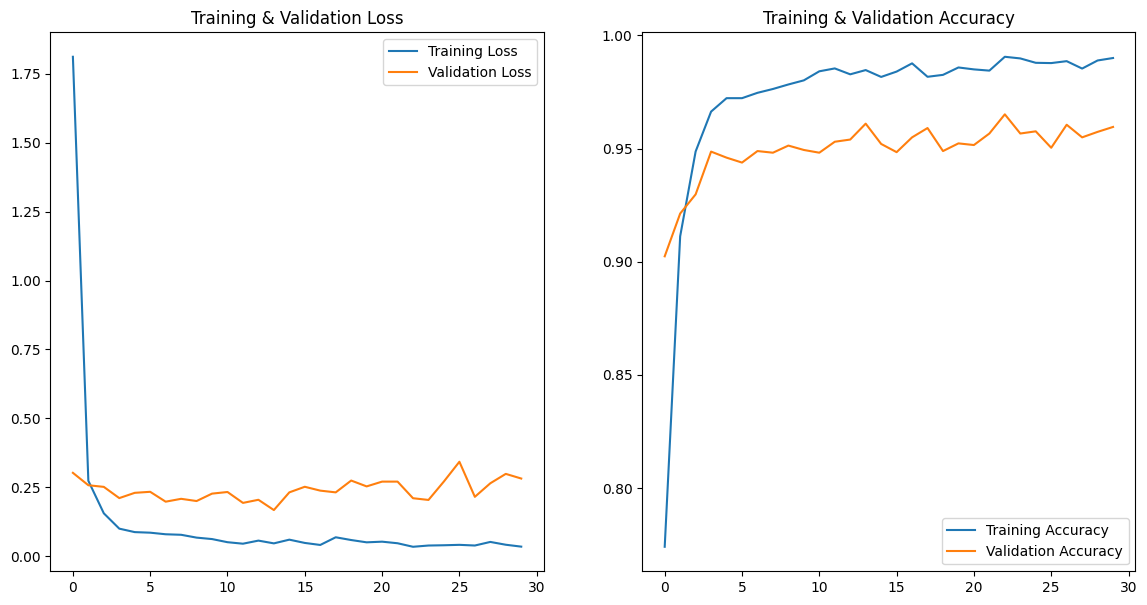

In [ ]:
curve()

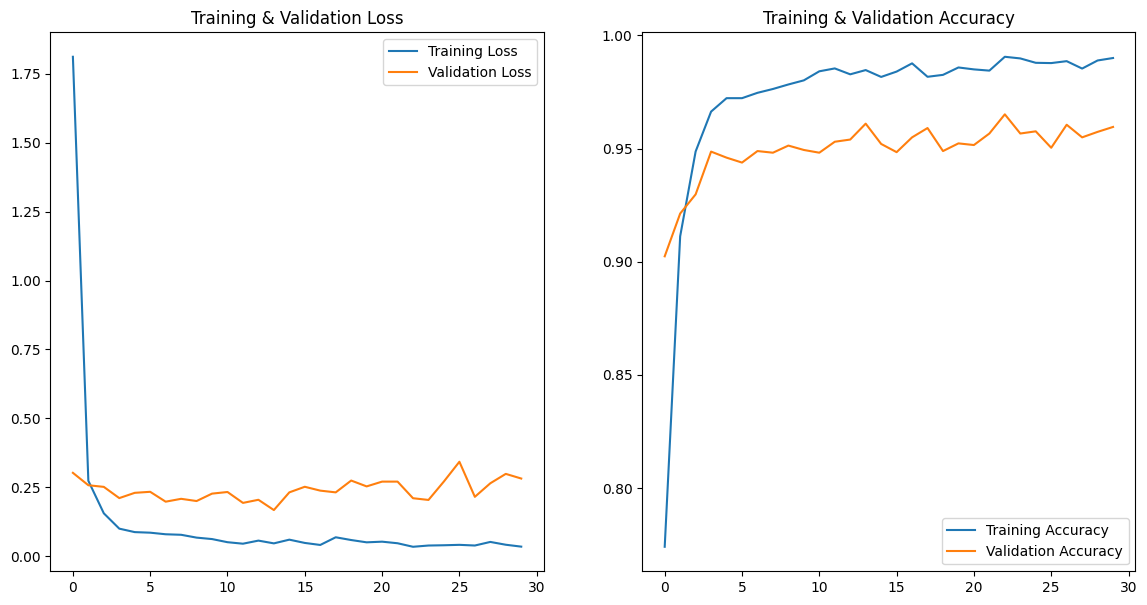

129/129 [==============================] - 38s 266ms/step
Accuracy: 0.9595445736434108
Precision: 0.9593612612573701
Recall: 0.9490991775199433
F1 Score: 0.95350368039329
129/129 [==============================] - 34s 263ms/step


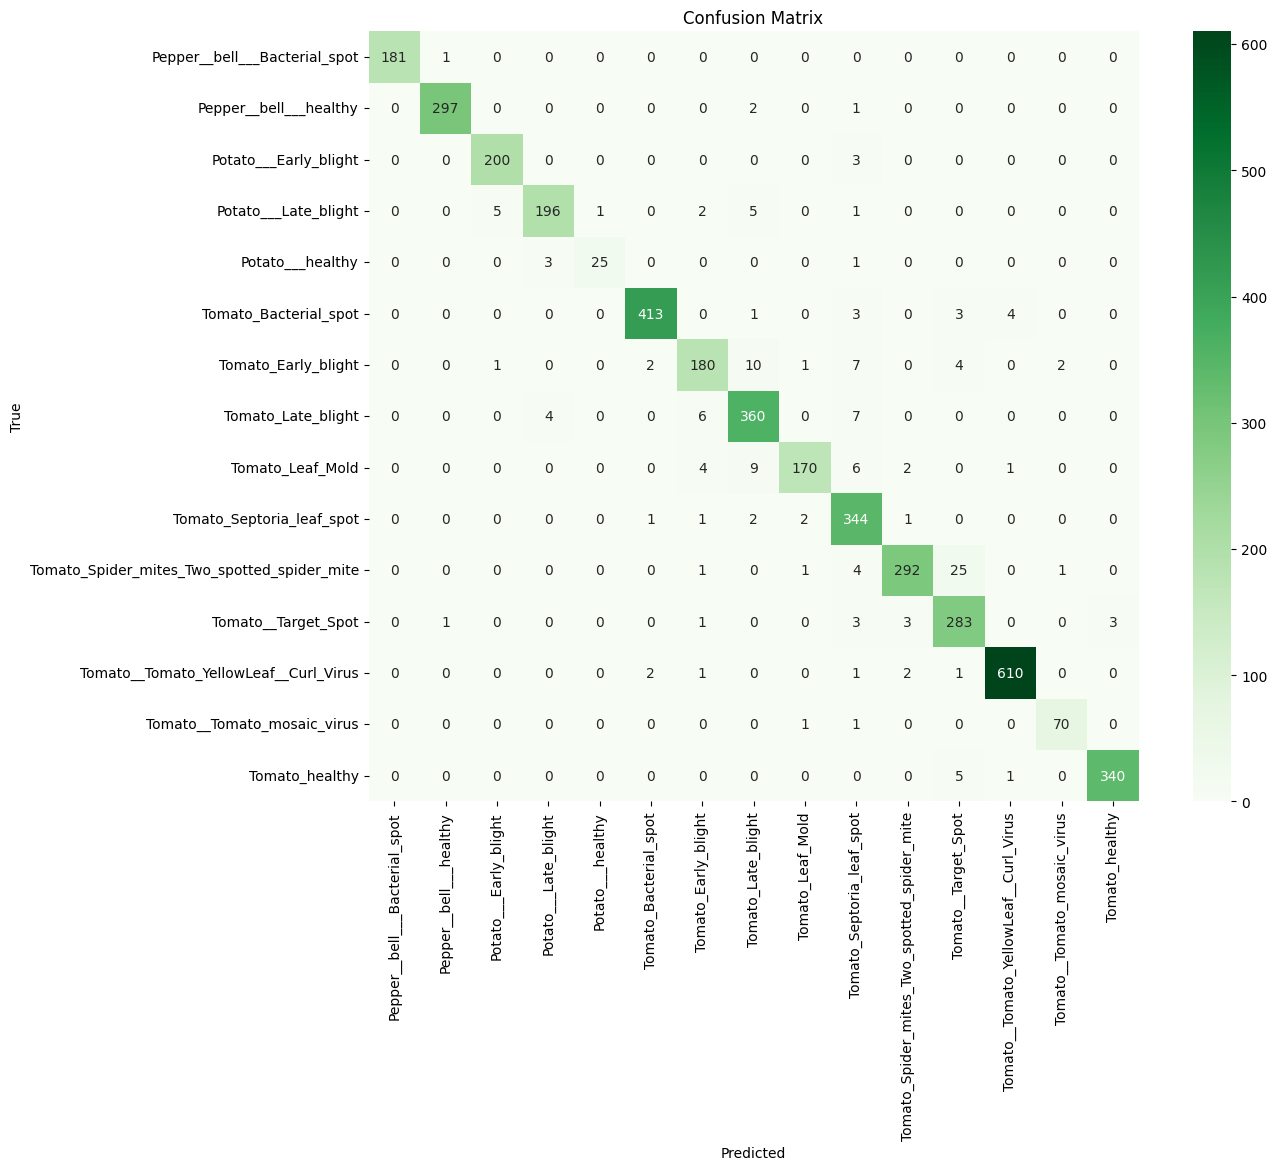

129/129 [==============================] - 34s 261ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.99      1.00       182
                     Pepper__bell___healthy       0.99      0.99      0.99       300
                      Potato___Early_blight       0.97      0.99      0.98       203
                       Potato___Late_blight       0.97      0.93      0.95       210
                           Potato___healthy       0.96      0.86      0.91        29
                      Tomato_Bacterial_spot       0.99      0.97      0.98       424
                        Tomato_Early_blight       0.92      0.87      0.89       207
                         Tomato_Late_blight       0.93      0.95      0.94       377
                           Tomato_Leaf_Mold       0.97      0.89      0.93       192
                  Tomato_Septoria_leaf_spot       0.90      0.98      0.94       351
Tomato

In [ ]:
output_checking()

129/129 [==============================] - 34s 264ms/step


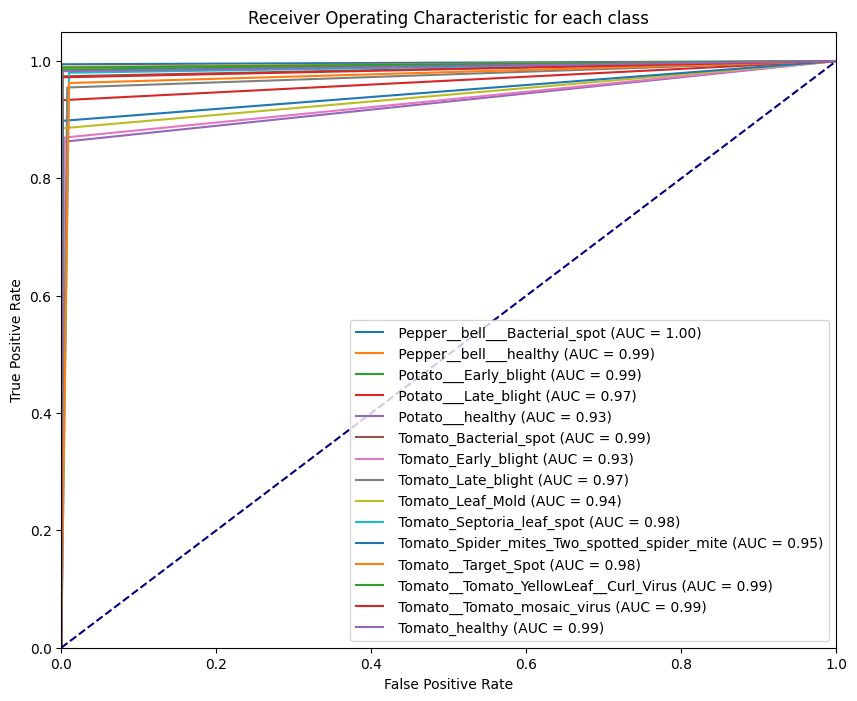

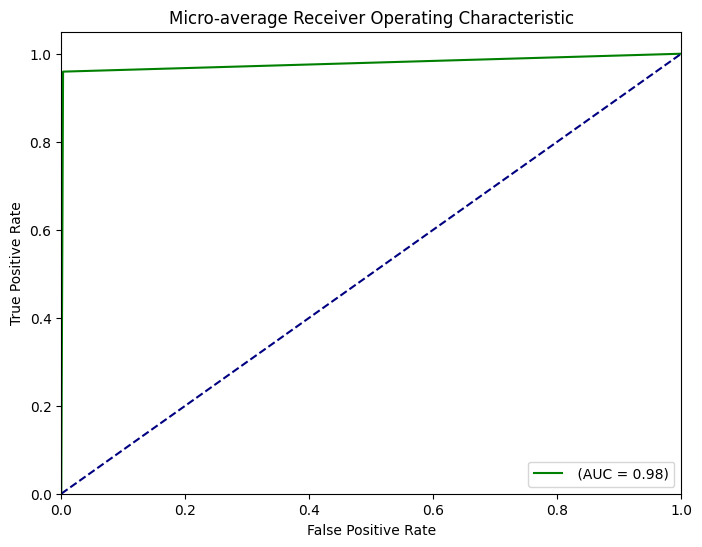

AUC =  0.9782149778516056


In [ ]:
Roc_curve()

### Hybrid CNN + Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate, Input
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Your existing CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu',  padding='same', strides=(1, 1), input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(96, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(512, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(256, (3, 3),  padding='same', strides=(1, 1),activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(22, activation='softmax'))

# Your existing Xception model
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
flatten_layer = Flatten()(xception_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(22, activation='softmax')(dropout_layer)
xception_model = Model(inputs=xception_model.input, outputs=output_layer)

# Extract intermediate layers from both models
cnn_intermediate_layer = cnn_model.layers[-3].output  # Choose the layer before the first dense layer
xception_intermediate_layer = xception_model.layers[-3].output  # Choose the layer before the first dense layer

# Concatenate the outputs from both intermediate layers
merged = Concatenate()([cnn_intermediate_layer, xception_intermediate_layer])

# Add additional layers for fine-tuning
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(merged)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)
output = Dense(15, activation='softmax')(x)

# Create the new hybrid model
hybrid_model = Model(inputs=[cnn_model.input, xception_model.input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
hybrid_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
model = hybrid_model
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.0001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        '/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+Xception)/16_11_23/Hybrid(CNN+Xception)_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    [x_train, x_train],  # Provide the input data for both CNN and Xception models
    y_train_encoded,     # Output labels
    batch_size=64,
    epochs=30,
    validation_data=([x_test, x_test], y_test_encoded),  # Provide the validation data for both CNN and Xception models
    callbacks=[callbacks_instance]
)

Epoch 1/30
258/258 [==============================] - ETA: 0s - loss: 19.6214 - accuracy: 0.7690
Epoch 1: val_loss improved from inf to 14.31276, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+Xception)/16_11_23/Hybrid(CNN+Xception)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 225s 665ms/step - loss: 19.6214 - accuracy: 0.7690 - val_loss: 14.3128 - val_accuracy: 0.9329
Epoch 2/30
258/258 [==============================] - ETA: 0s - loss: 11.7839 - accuracy: 0.9747
Epoch 2: val_loss improved from 14.31276 to 9.83031, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+Xception)/16_11_23/Hybrid(CNN+Xception)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 158s 612ms/step - loss: 11.7839 - accuracy: 0.9747 - val_loss: 9.8303 - val_accuracy: 0.9627
Epoch 3/30
258/258 [==============================] - ETA: 0s - loss: 8.2964 - accuracy: 0.9897
Epoch 3: val_lo

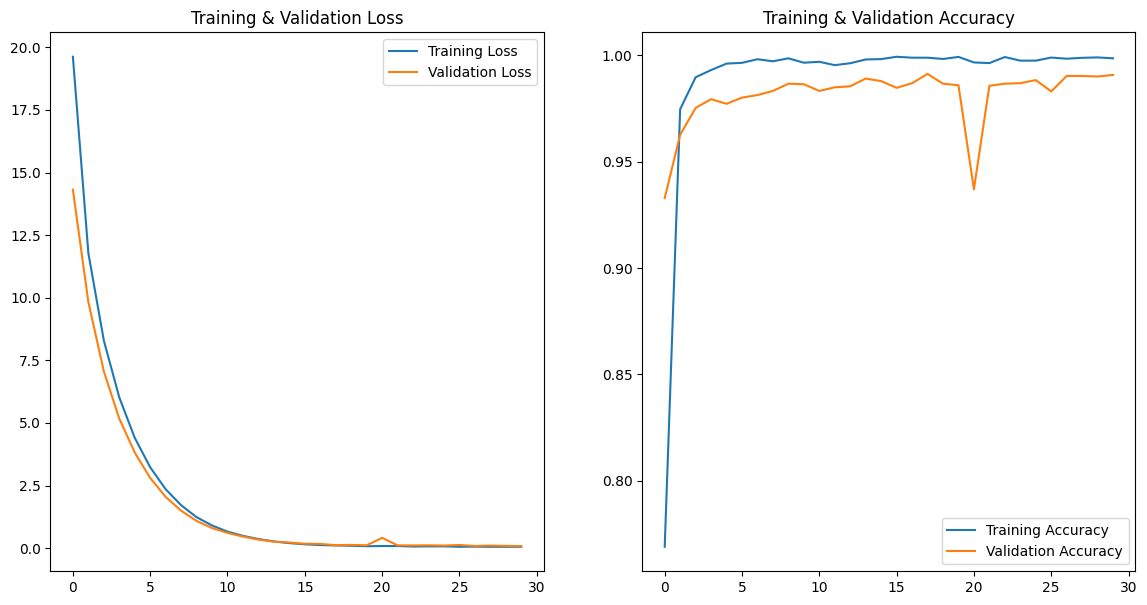

In [ ]:
curve()

In [ ]:
custom_optimizer = Adam(learning_rate=0.001)

model = hybrid_model
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+Xception)/16_11_23/Hybrid(CNN+Xception)_model_with(high_preprocess)50epoch.h5')

In [ ]:
  # Make predictions on the test data
  y_pred = model.predict([x_test, x_test])

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)


loss, accuracy = model.evaluate([x_test, x_test], y_test_encoded)

# Print the accuracy and loss
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')

129/129 [==============================] - 11s 84ms/step
Accuracy: 0.9941860465116279
Precision: 0.9939399529435126
Recall: 0.993891646880016
F1 Score: 0.9939011609067055
129/129 [==============================] - 13s 86ms/step - loss: 0.0619 - accuracy: 0.9942
Test Accuracy: 0.99
Test Loss: 0.06


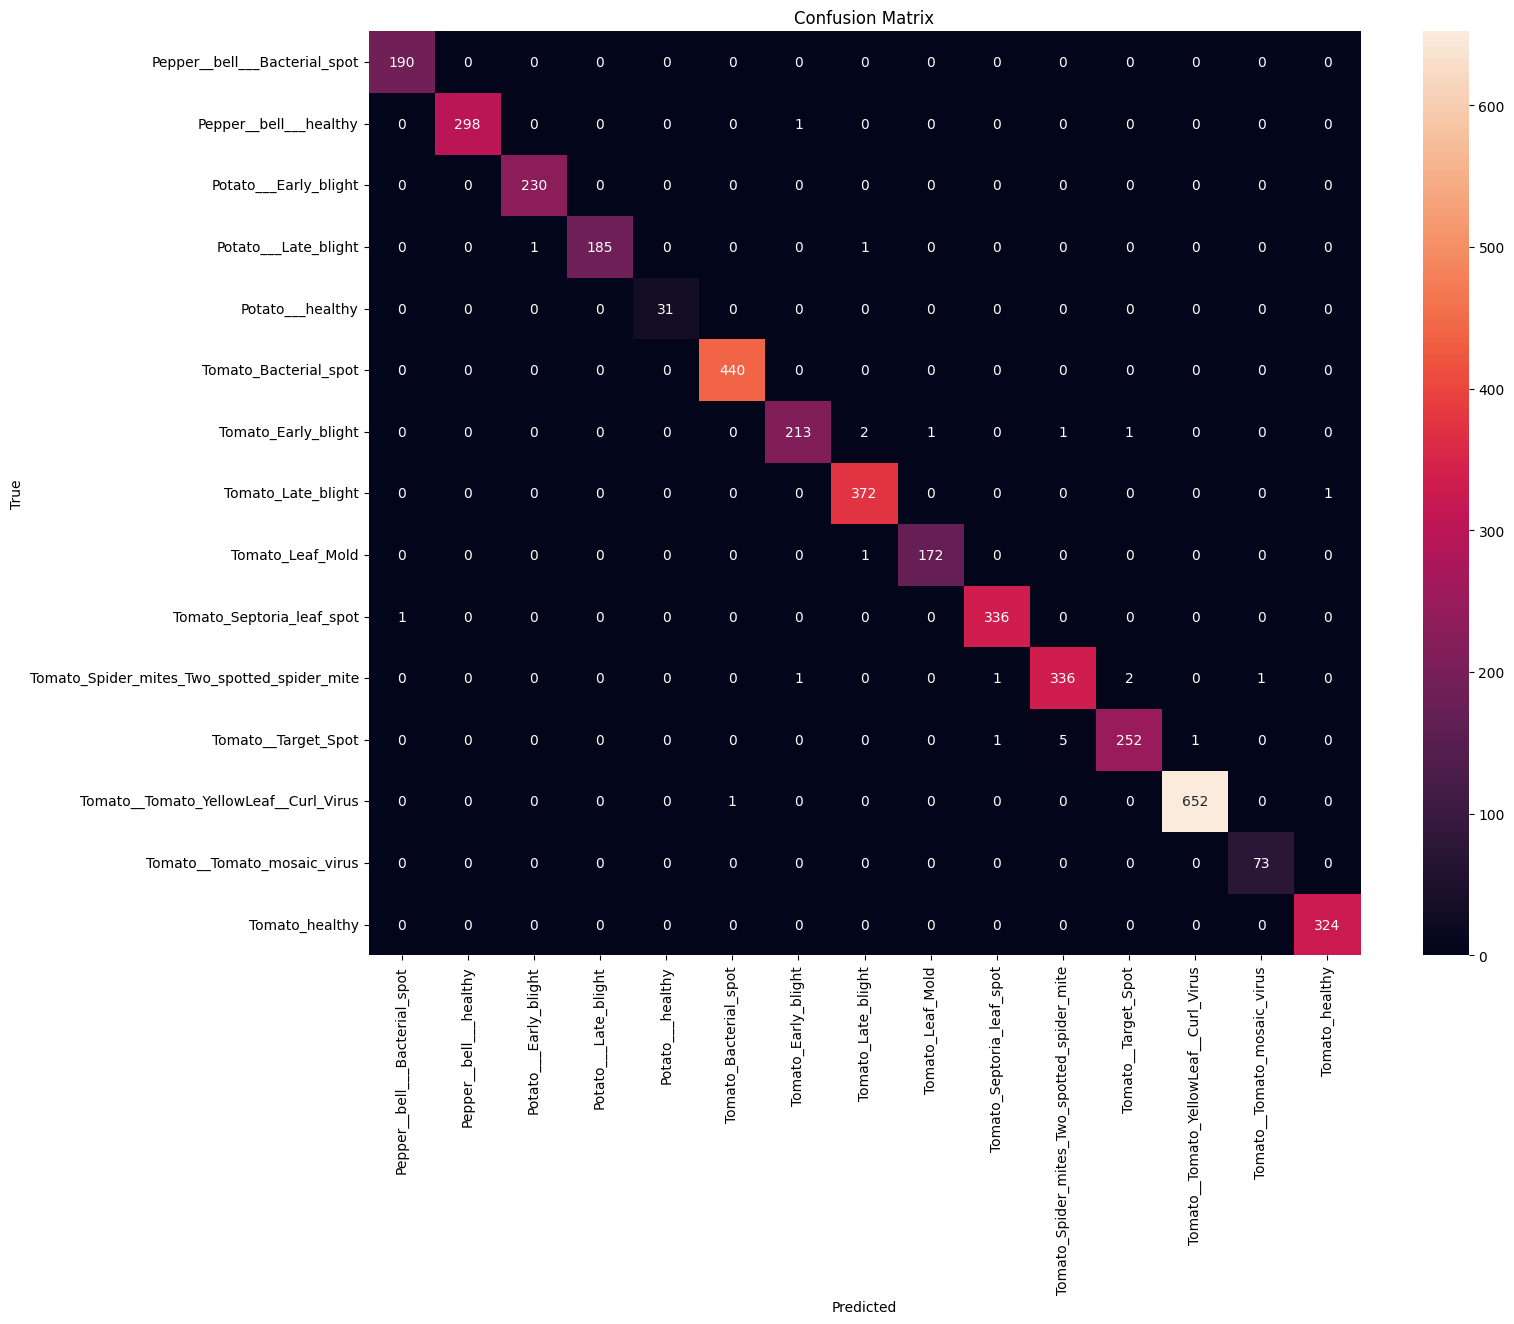

In [ ]:
  from sklearn.metrics import confusion_matrix
  plt.figure(figsize=(16,12))
  y_pred_labels = [np.argmax(label) for label in y_pred]
  cm =confusion_matrix(y_test,y_pred_labels)


# show confusion matrix
  sns.heatmap(cm,annot=True,fmt='d',xticklabels=predicted_Output,yticklabels=predicted_Output)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
# Recall = true_positive/ (true_positive + false_negative)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names = predicted_Output)
print(cr)

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      1.00      1.00       190
                     Pepper__bell___healthy       1.00      1.00      1.00       299
                      Potato___Early_blight       1.00      1.00      1.00       230
                       Potato___Late_blight       1.00      0.99      0.99       187
                           Potato___healthy       1.00      1.00      1.00        31
                      Tomato_Bacterial_spot       1.00      1.00      1.00       440
                        Tomato_Early_blight       0.99      0.98      0.98       218
                         Tomato_Late_blight       0.99      1.00      0.99       373
                           Tomato_Leaf_Mold       0.99      0.99      0.99       173
                  Tomato_Septoria_leaf_spot       0.99      1.00      1.00       337
Tomato_Spider_mites_Two_spotted_spider_mite       0.98      0.99

129/129 [==============================] - 9s 64ms/step


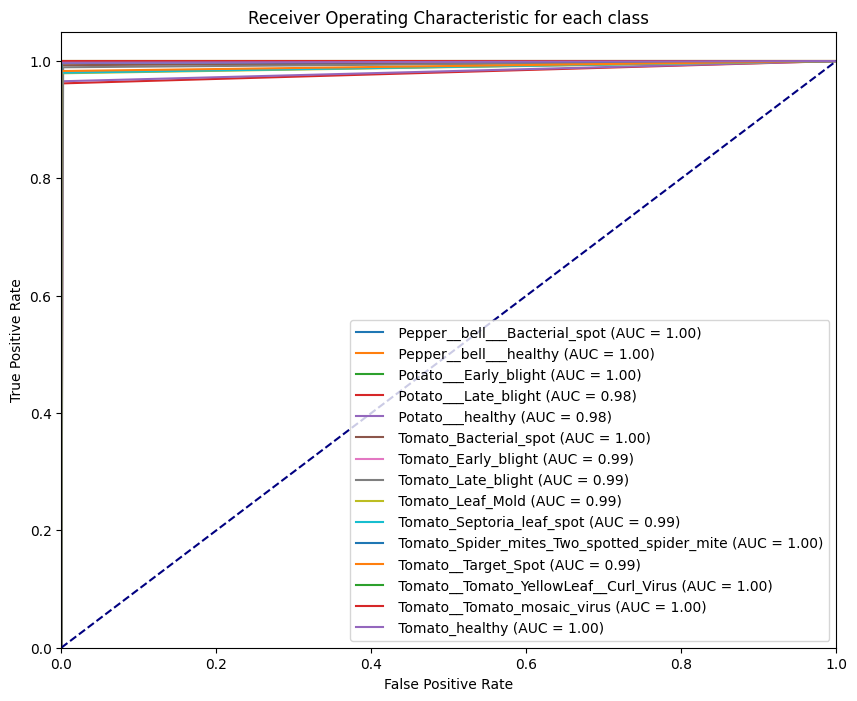

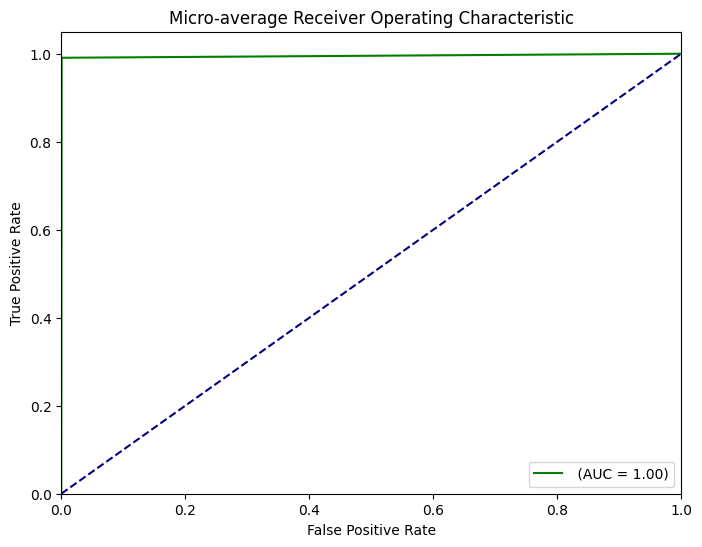

AUC =  0.9951117801771872


In [ ]:
def Roc_curve():
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.multiclass import OneVsRestClassifier
  from sklearn.model_selection import train_test_split
  from keras.utils import to_categorical

# Assuming y_test is your true labels and predictions is your predicted labels
  y_pred = model.predict([x_test,x_test])
  predictions = np.array(list(map(lambda x: np.round(x), y_pred)))
# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  n_classes = len(np.unique(y_test))
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions_bin[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves
  plt.figure(figsize=(10, 8))

  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label=f' {predicted_Output[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic for each class')
  plt.legend(loc="lower right")
  plt.show()


  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.model_selection import train_test_split
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_auc_score


# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute micro-average ROC curve and ROC area
  fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), predictions_bin.ravel())
  roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_micro, tpr_micro, label=f' (AUC = {roc_auc_micro:.2f})', color='Green')

# Plot the diagonal line (random classifier)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Micro-average Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

# Print micro-average AUC score
  print("AUC = ", roc_auc_score(y_test_bin.ravel(), predictions_bin.ravel()))


Roc_curve()

### Hybrid(CNN+MobileNet)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate, Input
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam

# Your existing CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1), input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(96, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(512, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(256, (3, 3), padding='same', strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(22, activation='softmax'))

# Your existing MobileNet model
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
flatten_layer = Flatten()(mobilenet_model.output)
dense_layer1 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(flatten_layer)
dropout_layer = Dropout(0.2)(dense_layer1)
output_layer = Dense(22, activation='softmax')(dropout_layer)
mobilenet_model = Model(inputs=mobilenet_model.input, outputs=output_layer)

# Extract intermediate layers from both models
cnn_intermediate_layer = cnn_model.layers[-3].output  # Choose the layer before the first dense layer
mobilenet_intermediate_layer = mobilenet_model.layers[-3].output  # Choose the layer before the first dense layer

# Concatenate the outputs from both intermediate layers
merged = Concatenate()([cnn_intermediate_layer, mobilenet_intermediate_layer])

# Add additional layers for fine-tuning
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(merged)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)
output = Dense(15, activation='softmax')(x)

# Create the new hybrid model
hybrid_model = Model(inputs=[cnn_model.input, mobilenet_model.input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
hybrid_model.summary()




Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_3[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)           128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['conv1_bn[0][0]']      

In [ ]:
model = hybrid_model
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        '/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+MobileNet)/16_11_23/Hybrid(CNN+MobileNet)_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    [x_train, x_train],  # Provide the input data for both CNN and Xception models
    y_train_encoded,     # Output labels
    batch_size=64,
    epochs=30,
    validation_data=([x_test, x_test], y_test_encoded),  # Provide the validation data for both CNN and Xception models
    callbacks=[callbacks_instance]
)

Epoch 1/30
258/258 [==============================] - ETA: 0s - loss: 11.8074 - accuracy: 0.8297
Epoch 1: val_loss improved from inf to 5.12034, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+MobileNet)/16_11_23/Hybrid(CNN+MobileNet)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 94s 259ms/step - loss: 11.8074 - accuracy: 0.8297 - val_loss: 5.1203 - val_accuracy: 0.8222
Epoch 2/30
258/258 [==============================] - ETA: 0s - loss: 2.9736 - accuracy: 0.9405
Epoch 2: val_loss improved from 5.12034 to 2.38691, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+MobileNet)/16_11_23/Hybrid(CNN+MobileNet)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 59s 229ms/step - loss: 2.9736 - accuracy: 0.9405 - val_loss: 2.3869 - val_accuracy: 0.8278
Epoch 3/30
258/258 [==============================] - ETA: 0s - loss: 1.2790 - accuracy: 0.9631
Epoch 3: val_loss 

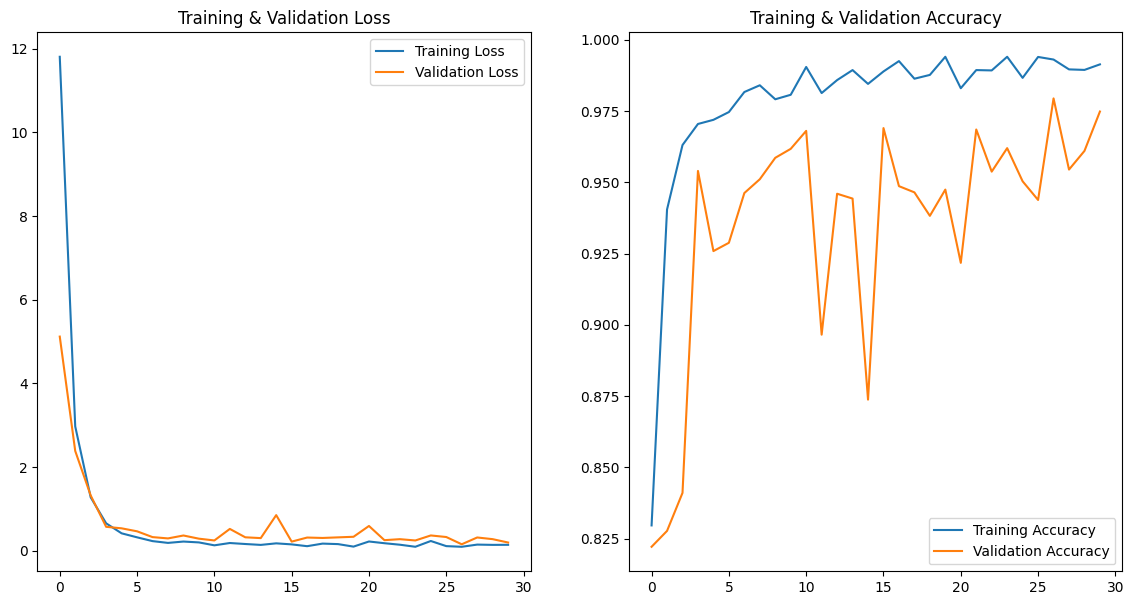

In [ ]:
curve()

In [ ]:
  # Make predictions on the test data
  y_pred = model.predict([x_test, x_test])

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)


loss, accuracy = model.evaluate([x_test, x_test], y_test_encoded)

# Print the accuracy and loss
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')

129/129 [==============================] - 4s 28ms/step
Accuracy: 0.9820736434108527
Precision: 0.9837066294713782
Recall: 0.9764435009211201
F1 Score: 0.9798580717640203
129/129 [==============================] - 4s 29ms/step - loss: 0.1614 - accuracy: 0.9821
Test Accuracy: 0.98
Test Loss: 0.16


In [ ]:
custom_optimizer = Adam(learning_rate=0.001)

model = hybrid_model
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(CNN+MobileNet)/16_11_23/Hybrid(CNN+MobileNet)_model_with(high_preprocess)50epoch.h5')

In [ ]:
  # Make predictions on the test data
  y_pred = model.predict([x_test, x_test])

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)


loss, accuracy = model.evaluate([x_test, x_test], y_test_encoded)

# Print the accuracy and loss
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')

129/129 [==============================] - 4s 28ms/step
Accuracy: 0.9849806201550387
Precision: 0.9851915074571418
Recall: 0.9763195146341644
F1 Score: 0.9804755237079283
129/129 [==============================] - 5s 29ms/step - loss: 0.1428 - accuracy: 0.9850
Test Accuracy: 0.98
Test Loss: 0.14


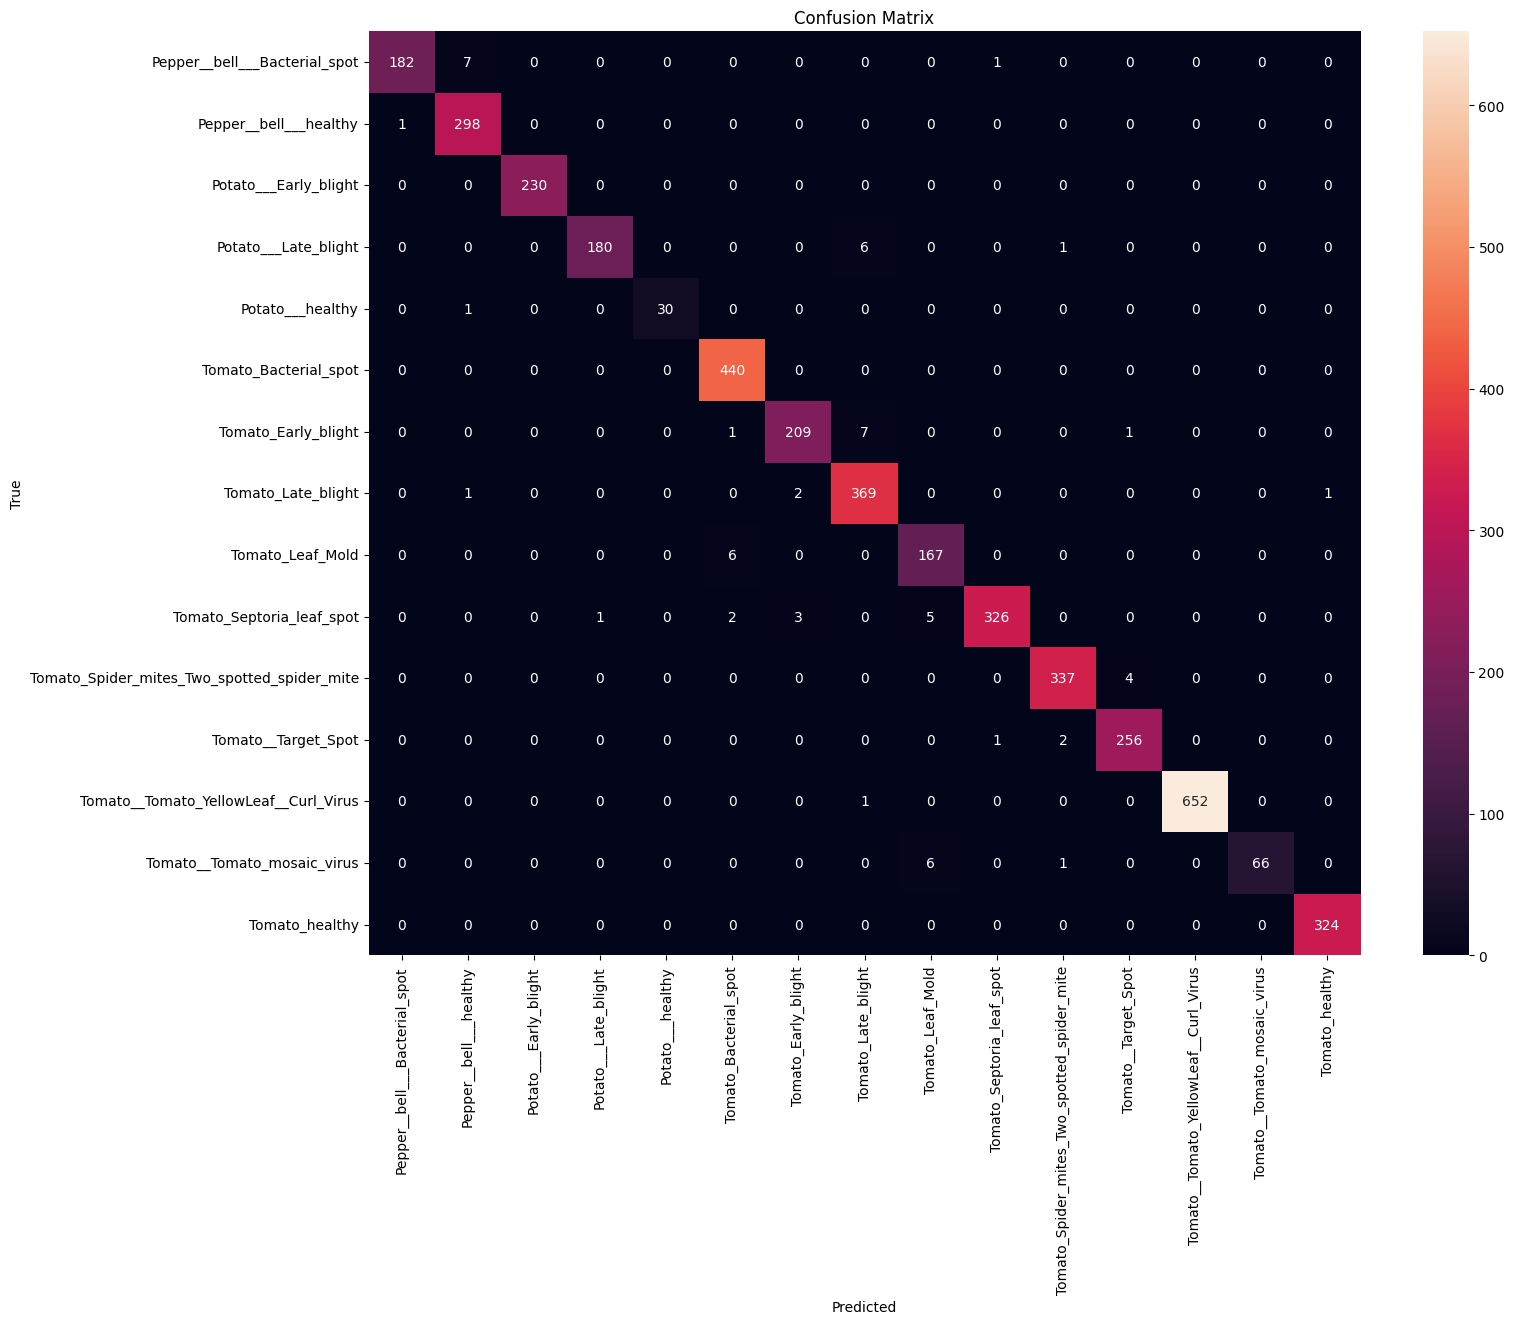

In [ ]:
  from sklearn.metrics import confusion_matrix
  plt.figure(figsize=(16,12))
  y_pred_labels = [np.argmax(label) for label in y_pred]
  cm =confusion_matrix(y_test,y_pred_labels)


# show confusion matrix
  sns.heatmap(cm,annot=True,fmt='d',xticklabels=predicted_Output,yticklabels=predicted_Output)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
# Recall = true_positive/ (true_positive + false_negative)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names = predicted_Output)
print(cr)

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.96      0.98       190
                     Pepper__bell___healthy       0.97      1.00      0.98       299
                      Potato___Early_blight       1.00      1.00      1.00       230
                       Potato___Late_blight       0.99      0.96      0.98       187
                           Potato___healthy       1.00      0.97      0.98        31
                      Tomato_Bacterial_spot       0.98      1.00      0.99       440
                        Tomato_Early_blight       0.98      0.96      0.97       218
                         Tomato_Late_blight       0.96      0.99      0.98       373
                           Tomato_Leaf_Mold       0.94      0.97      0.95       173
                  Tomato_Septoria_leaf_spot       0.99      0.97      0.98       337
Tomato_Spider_mites_Two_spotted_spider_mite       0.99      0.99

129/129 [==============================] - 4s 24ms/step


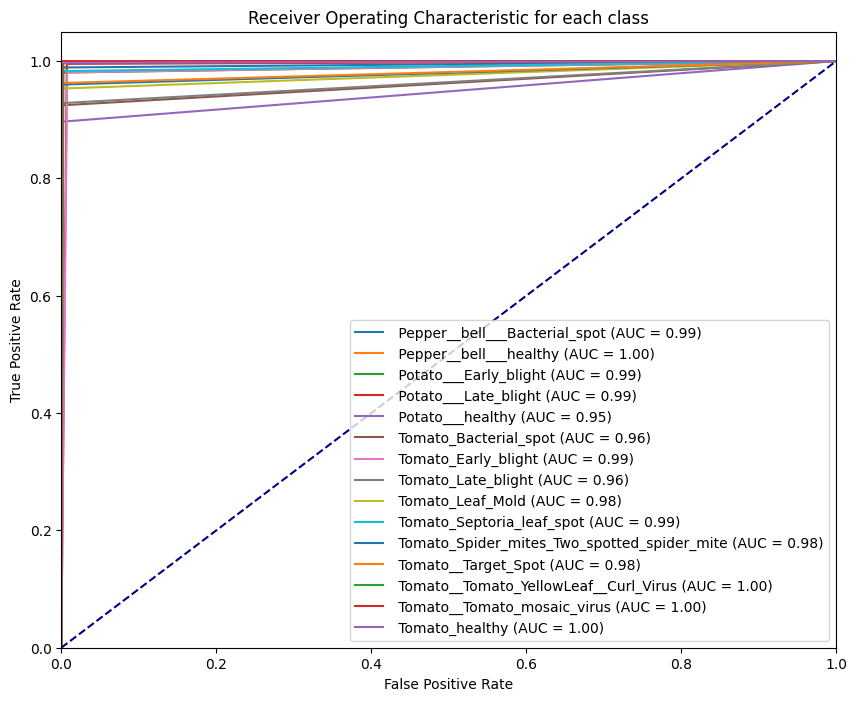

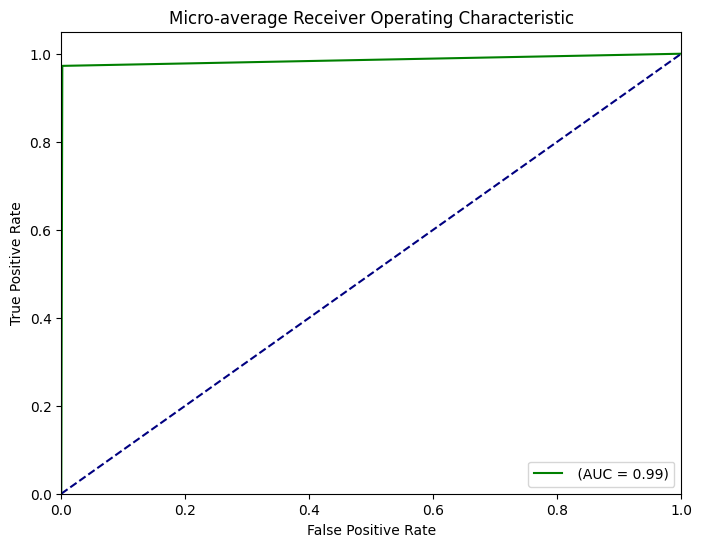

AUC =  0.9853612956810632


In [ ]:
def Roc_curve():
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.multiclass import OneVsRestClassifier
  from sklearn.model_selection import train_test_split
  from keras.utils import to_categorical

# Assuming y_test is your true labels and predictions is your predicted labels
  y_pred = model.predict([x_test,x_test])
  predictions = np.array(list(map(lambda x: np.round(x), y_pred)))
# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  n_classes = len(np.unique(y_test))
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions_bin[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves
  plt.figure(figsize=(10, 8))

  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label=f' {predicted_Output[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic for each class')
  plt.legend(loc="lower right")
  plt.show()


  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.model_selection import train_test_split
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_auc_score


# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute micro-average ROC curve and ROC area
  fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), predictions_bin.ravel())
  roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_micro, tpr_micro, label=f' (AUC = {roc_auc_micro:.2f})', color='Green')

# Plot the diagonal line (random classifier)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Micro-average Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

# Print micro-average AUC score
  print("AUC = ", roc_auc_score(y_test_bin.ravel(), predictions_bin.ravel()))


Roc_curve()

###  Hybrid(MobileNet + MobileNetV2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Concatenate, Input
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Your existing MobileNet model
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
flatten_layer_mobilenet = Flatten()(mobilenet_model.output)
dense_layer1_mobilenet = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(flatten_layer_mobilenet)
dropout_layer_mobilenet = Dropout(0.2)(dense_layer1_mobilenet)
output_layer_mobilenet = Dense(22, activation='softmax')(dropout_layer_mobilenet)
mobilenet_model = Model(inputs=mobilenet_model.input, outputs=output_layer_mobilenet)

# Your existing MobileNetV2 model
mobilenetv2_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
flatten_layer_mobilenetv2 = Flatten()(mobilenetv2_model.output)
dense_layer1_mobilenetv2 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(flatten_layer_mobilenetv2)
dropout_layer_mobilenetv2 = Dropout(0.2)(dense_layer1_mobilenetv2)
output_layer_mobilenetv2 = Dense(22, activation='softmax')(dropout_layer_mobilenetv2)
mobilenetv2_model = Model(inputs=mobilenetv2_model.input, outputs=output_layer_mobilenetv2)

# Extract intermediate layers from both models
mobilenet_intermediate_layer = mobilenet_model.layers[-3].output  # Choose the layer before the first dense layer
mobilenetv2_intermediate_layer = mobilenetv2_model.layers[-3].output  # Choose the layer before the first dense layer

# Concatenate the outputs from both intermediate layers
merged = Concatenate()([mobilenet_intermediate_layer, mobilenetv2_intermediate_layer])

# Add additional layers for fine-tuning
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(merged)
x = Dropout(0.2)(x)
output = Dense(15, activation='softmax')(x)

# Create the new hybrid model
hybrid_model = Model(inputs=[mobilenet_model.input, mobilenetv2_model.input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
hybrid_model.summary()




Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['bn_Conv1[0][0]']      

In [ ]:
model = hybrid_model
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
    """Learning rate schedule function."""
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

custom_optimizer = Adam(learning_rate=0.001)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Usage in your callbacks function:
def callbacks():
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        '/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(MobileNet+MobileNetV2))/17_11_23/Hybrid(MobileNet+MobileNetV2)_model_with(high_preprocess)50epoch.h5',
                                                    monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    # early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, min_delta=0.001)
    # lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)  # Using the scheduler function here
    callbacks_list = [checkpoint]
    return callbacks_list
callbacks_instance = callbacks()
history = model.fit(
    [x_train, x_train],  # Provide the input data for both CNN and Xception models
    y_train_encoded,     # Output labels
    batch_size=64,
    epochs=30,
    validation_data=([x_test, x_test], y_test_encoded),  # Provide the validation data for both CNN and Xception models
    callbacks=[callbacks_instance]
)

Epoch 1/30
258/258 [==============================] - ETA: 0s - loss: 8.1976 - accuracy: 0.8351
Epoch 1: val_loss improved from inf to 3.58899, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(MobileNet+MobileNetV2))/17_11_23/Hybrid(MobileNet+MobileNetV2)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 120s 299ms/step - loss: 8.1976 - accuracy: 0.8351 - val_loss: 3.5890 - val_accuracy: 0.6814
Epoch 2/30
258/258 [==============================] - ETA: 0s - loss: 1.2273 - accuracy: 0.9472
Epoch 2: val_loss improved from 3.58899 to 1.30539, saving model to /content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(MobileNet+MobileNetV2))/17_11_23/Hybrid(MobileNet+MobileNetV2)_model_with(high_preprocess)50epoch.h5
258/258 [==============================] - 69s 268ms/step - loss: 1.2273 - accuracy: 0.9472 - val_loss: 1.3054 - val_accuracy: 0.8530
Epoch 3/30
258/258 [==============================] - ETA: 0s - loss: 0.6398 - ac

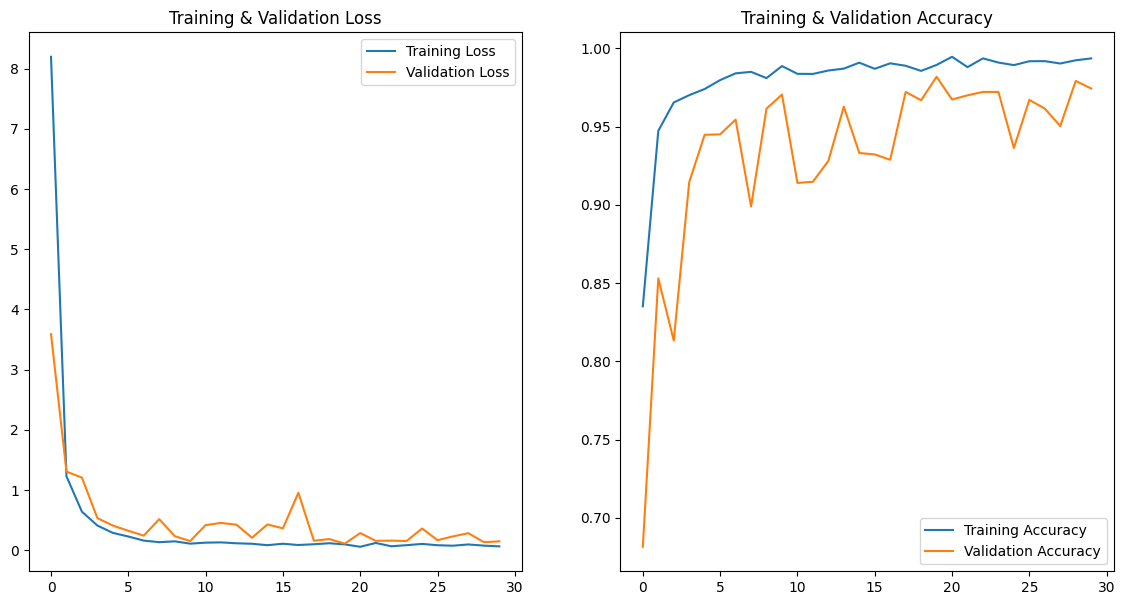

In [ ]:
curve()

In [ ]:
  # Make predictions on the test data
  y_pred = model.predict([x_test, x_test])

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)


loss, accuracy = model.evaluate([x_test, x_test], y_test_encoded)

# Print the accuracy and loss
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')

In [ ]:
custom_optimizer = Adam(learning_rate=0.001)

model = hybrid_model
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/Deep learning model(Base_paper)/Hybrid(MobileNet+MobileNetV2))/17_11_23/Hybrid(MobileNet+MobileNetV2)_model_with(high_preprocess)50epoch.h5')

In [ ]:
  # Make predictions on the test data
  y_pred = model.predict([x_test, x_test])

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)


loss, accuracy = model.evaluate([x_test, x_test], y_test_encoded)

# Print the accuracy and loss
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')

129/129 [==============================] - 9s 31ms/step
Accuracy: 0.9818313953488372
Precision: 0.9808281083959657
Recall: 0.9793684621575133
F1 Score: 0.9796506882707166
129/129 [==============================] - 9s 42ms/step - loss: 0.1087 - accuracy: 0.9818
Test Accuracy: 0.98
Test Loss: 0.11


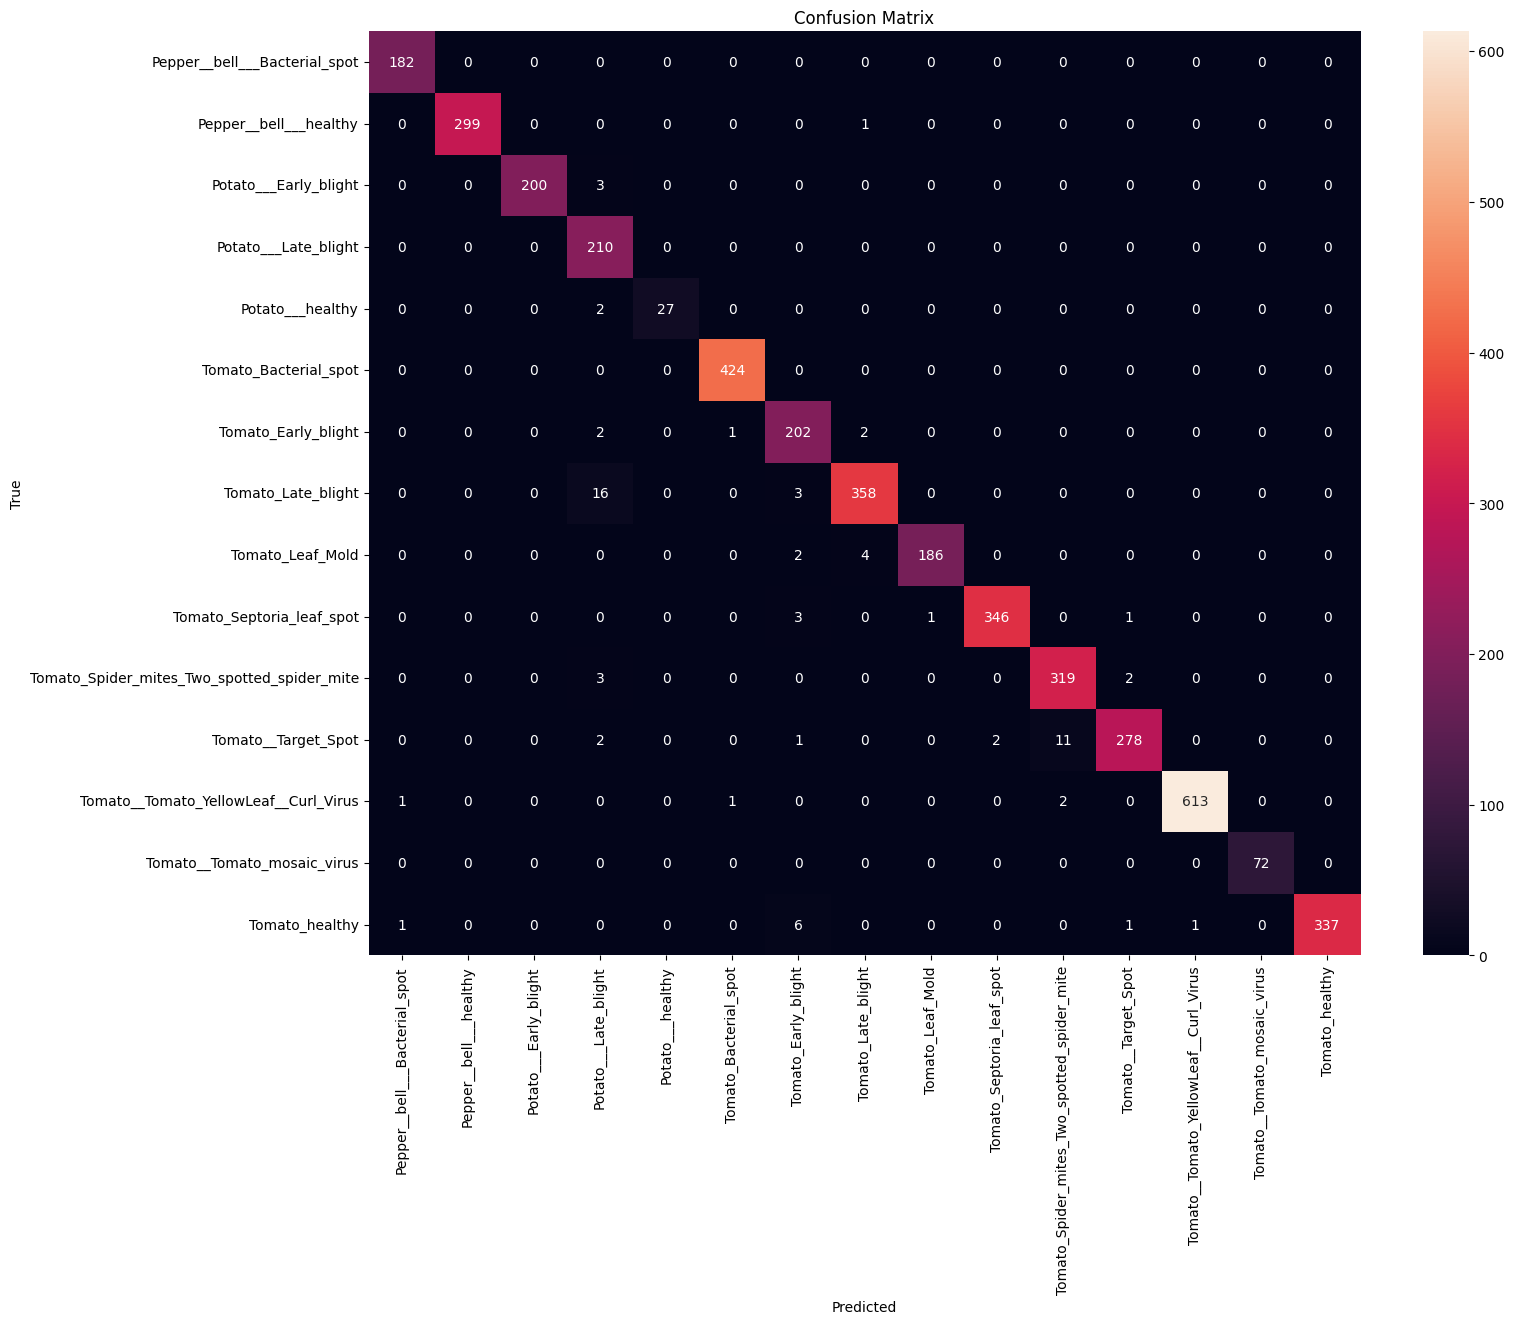

In [ ]:
  from sklearn.metrics import confusion_matrix
  plt.figure(figsize=(16,12))
  y_pred_labels = [np.argmax(label) for label in y_pred]
  cm =confusion_matrix(y_test,y_pred_labels)


# show confusion matrix
  sns.heatmap(cm,annot=True,fmt='d',xticklabels=predicted_Output,yticklabels=predicted_Output)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
# Recall = true_positive/ (true_positive + false_negative)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names = predicted_Output)
print(cr)

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      1.00      0.99       182
                     Pepper__bell___healthy       1.00      1.00      1.00       300
                      Potato___Early_blight       1.00      0.99      0.99       203
                       Potato___Late_blight       0.88      1.00      0.94       210
                           Potato___healthy       1.00      0.93      0.96        29
                      Tomato_Bacterial_spot       1.00      1.00      1.00       424
                        Tomato_Early_blight       0.93      0.98      0.95       207
                         Tomato_Late_blight       0.98      0.95      0.96       377
                           Tomato_Leaf_Mold       0.99      0.97      0.98       192
                  Tomato_Septoria_leaf_spot       0.99      0.99      0.99       351
Tomato_Spider_mites_Two_spotted_spider_mite       0.96      0.98

129/129 [==============================] - 5s 35ms/step


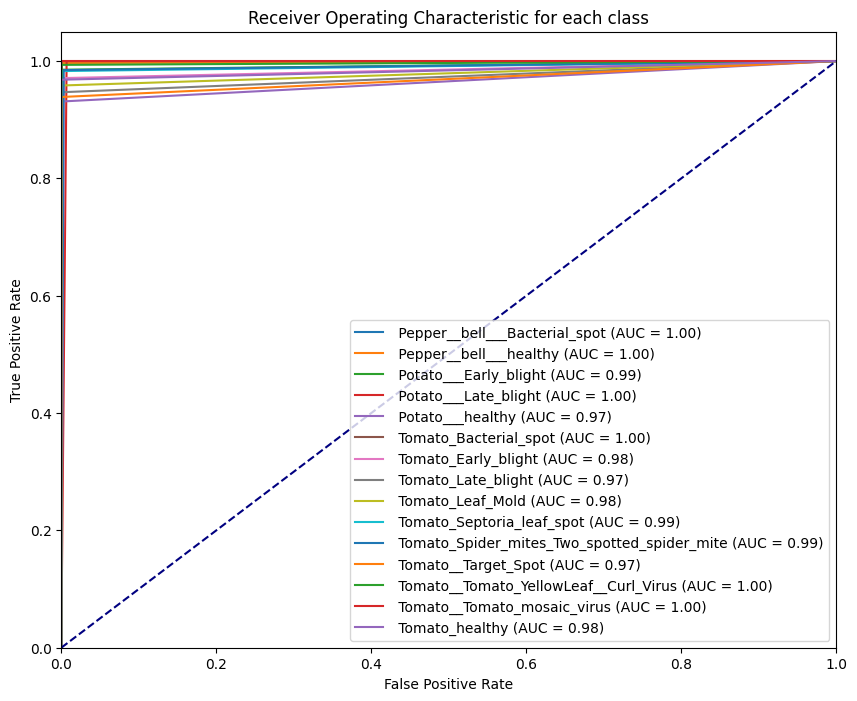

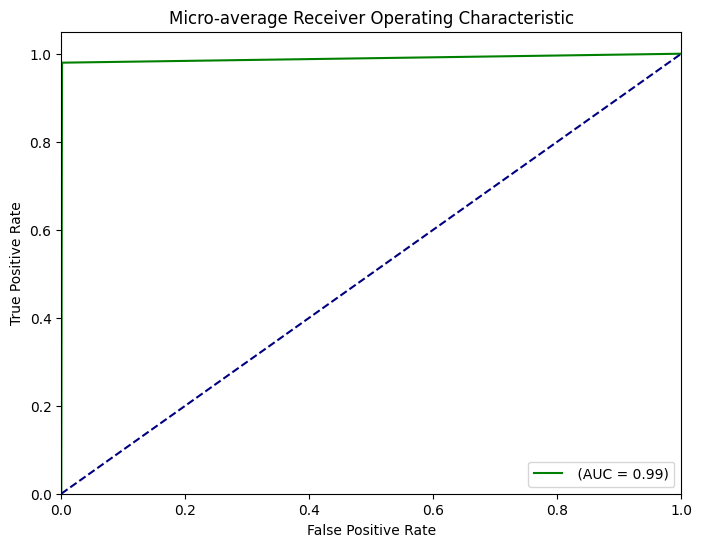

AUC =  0.9892199612403101


In [ ]:
def Roc_curve():
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.multiclass import OneVsRestClassifier
  from sklearn.model_selection import train_test_split
  from keras.utils import to_categorical

# Assuming y_test is your true labels and predictions is your predicted labels
  y_pred = model.predict([x_test,x_test])
  predictions = np.array(list(map(lambda x: np.round(x), y_pred)))
# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  n_classes = len(np.unique(y_test))
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions_bin[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves
  plt.figure(figsize=(10, 8))

  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label=f' {predicted_Output[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic for each class')
  plt.legend(loc="lower right")
  plt.show()


  from sklearn.metrics import roc_curve, auc
  from sklearn.preprocessing import label_binarize
  from sklearn.model_selection import train_test_split
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_auc_score


# Binarize the output
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

# Compute micro-average ROC curve and ROC area
  fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), predictions_bin.ravel())
  roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_micro, tpr_micro, label=f' (AUC = {roc_auc_micro:.2f})', color='Green')

# Plot the diagonal line (random classifier)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Micro-average Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

# Print micro-average AUC score
  print("AUC = ", roc_auc_score(y_test_bin.ravel(), predictions_bin.ravel()))


Roc_curve()